Used Libraries

In [1]:
from scipy import optimize as sopt
import math
import numpy as np
import matplotlib.pyplot as plt
def exp(x):
    try:
        ans = np.exp(x)
    except OverflowError:
        ans = 0 
    return ans
def cos(x):
    try:
        ans = np.cos(x)
    except OverflowError:
        ans = 1
    return ans
def sin(x):
    try:
        ans = np.sin(x)
    except OverflowError:
        ans = 0
    return ans

Functions

In [2]:
def g1(X):
    return 3*X[0]-cos(X[1]*X[2])-0.5
def g2(X):
    return X[0]**2 - 81*((X[1] + 0.1)**2)+ sin(X[2]) + 1.06
def g3(X):
    return exp(-1*X[0]*X[1]) + 20*X[2] + (10*math.pi - 3)/3 
def f(X):
    return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)
def mag(x):
    return np.linalg.norm(x)

1st Derivatives 

In [3]:
def g1x1(X):
    return 3
def g1x2(X):
    return X[2]*sin(X[1]*X[2])
def g1x3(X):
    return X[1]*sin(X[1]*X[2])
def g2x1(X):
    return 2*X[0]
def g2x2(X):
    return -1*162*(X[1]+0.1)
def g2x3(X):
    return cos(X[2])
def g3x1(X):
    return -1*X[1]*exp(-1 * X[0] * X[1])
def g3x2(X):
    return -1*X[0]*exp(-1 * X[0] * X[1])
def g3x3(X):
    return 20
def f_diff(X):
    return np.array([
        g1x1(X)*g1(X)+g2x1(X)*g2(X)+g3x1(X)*g3(X),
        g1x2(X)*g1(X)+g2x2(X)*g2(X)+g3x2(X)*g3(X),
        g1x3(X)*g1(X)+g2x3(X)*g2(X)+g3x3(X)*g3(X)
    ])


2nd Derivatives

In [4]:
def fx1x1(X):
    return   g1x1(X)**2\
            +g2x1(X)**2\
            +g2(X)*(2)\
            +g3(X)*(-1*X[1]*g3x1(X))\
            +g3x1(X)**2
def fx1x2(X):
    return   g1x1(X)*g1x2(X)\
            +g2x1(X)*g2x2(X)\
            +g3(X)*(X[0]*X[1]-1)*exp(-1*X[0]*X[1])\
            +g3x1(X)*g3x2(X)
def fx1x3(X):
    return   g1x1(X)*g1x3(X)\
            +g2x1(X)*g2x3(X)\
            +g3x1(X)*g3x3(X)
def fx2x2(X):
    return  (g1x2(X))**2\
            +g1(X)*(X[2]**2)*cos(X[1]*X[2])\
            +(g2x2(X))**2\
            +g2(X)*(-162)\
            +(g3x2(X))**2\
            +g3(X)*(-1*X[0]*g3x2(X))
def fx2x3(X):
    return  (g1x2(X))*g1x3(X)\
            +g1(X)*(X[1]*X[2]*sin(X[1]*X[2])+X[2]*cos(X[1]*X[2]))\
            +(g2x2(X))*g2x3(X)\
            +(g3x2(X))*g3x3(X)
def fx3x3(X):
    return  (g1x3(X))**2\
            +g1(X)*(X[1]**2)*cos(X[1]*X[2])\
            +(g2x3(X))**2\
            +g2(X)*(-1*sin(X[2]))\
            +g3x3(X)**2
def H(x):
    return np.array([[fx1x1(x),fx1x2(x),fx1x3(x)],
                    [fx1x2(x),fx2x2(x),fx2x3(x)],
                    [fx1x3(x),fx2x3(x),fx3x3(x)]
                    ])

Conventional gradient descent

In [19]:
def optimize(X0,e):
    X=np.array(X0)
    ddata=np.array([mag(f_diff(X))])
    fdata=np.array([f(X)])
    s=-f_diff(X)
    while(mag(s)>e):
        s=-f_diff(X)
        def f1d(alpha):
            #print(X + alpha*s)
            return f(X + alpha*s)
        u=sopt.golden(f1d)
        X=X+u*s
        #print(s)
        #print(f_diff(X))
        ddata=np.append(ddata,[mag(f_diff(X))], axis=0)
        fdata=np.append(fdata,[f(X)], axis=0)
    print('Soulution: ')
    print(X)
    plt.style.use('_mpl-gallery')
    plt.figure(figsize=(8, 6), dpi=80)
    x = np.arange(ddata.shape[0])
    plt.plot(x, ddata)
    plt.ylabel('1st Deravitive')
    plt.xlabel('Iteration')
    plt.show()
    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(x, fdata)
    plt.ylabel('Value')
    plt.xlabel('Iteration')
    plt.show()
    return(X)
        

Soulution: 
[ 0.49822741 -0.19961098 -0.52882314]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


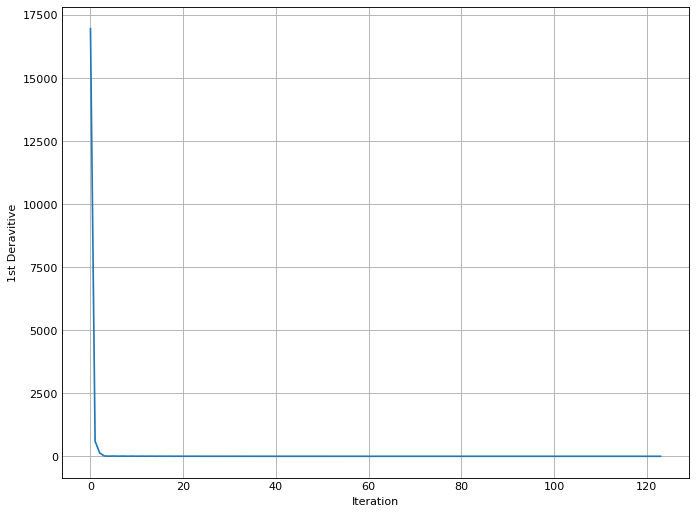

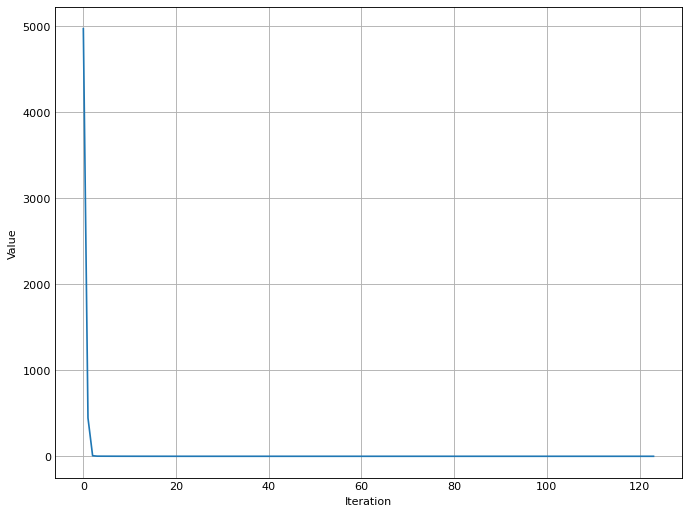

In [20]:
sol =np.array([optimize([1,1,1],0.001)])


Soulution is (0.49822741 -0.19961098 -0.52882314)

Soulution: 
[ 5.00084665e-01  5.91066085e-06 -5.23601505e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


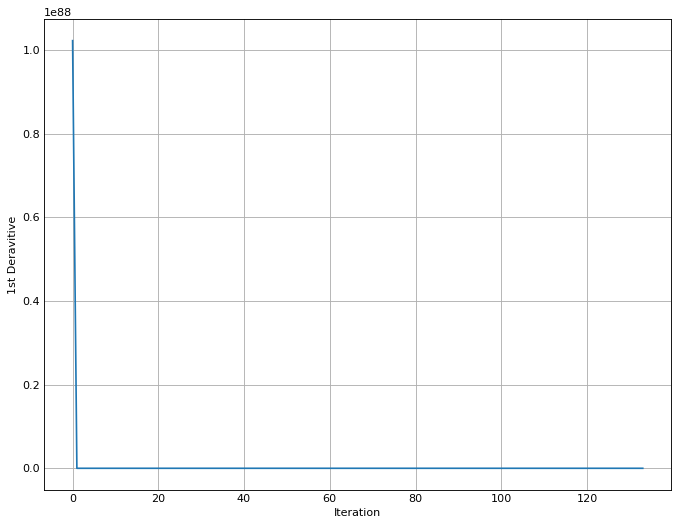

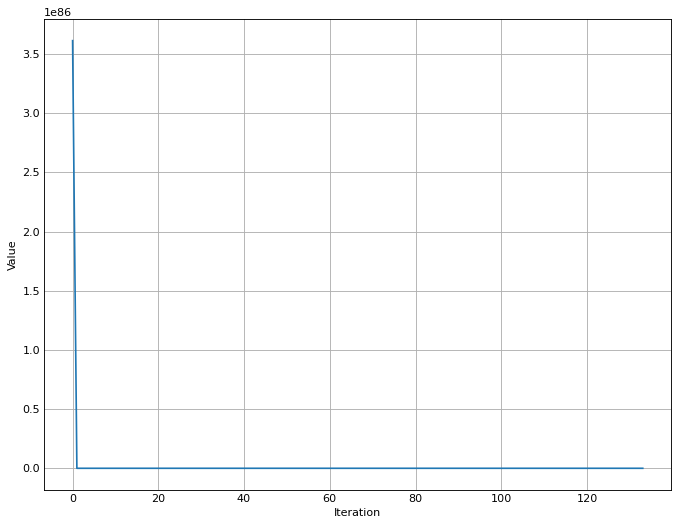

Soulution: 
[ 5.00080893e-01  5.59504159e-06 -5.23601078e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


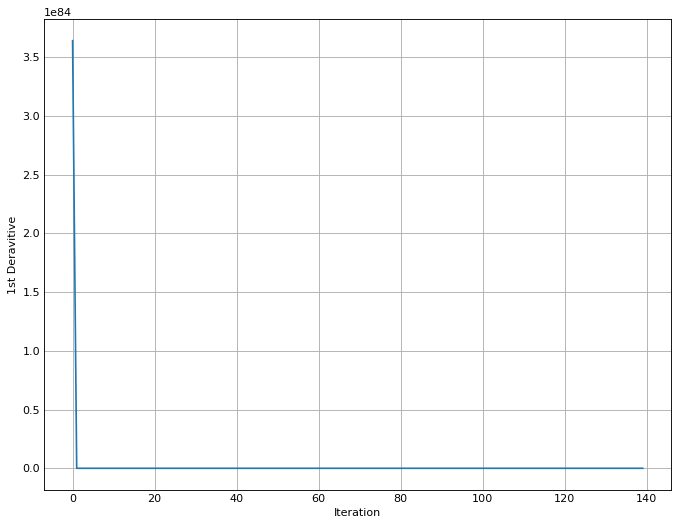

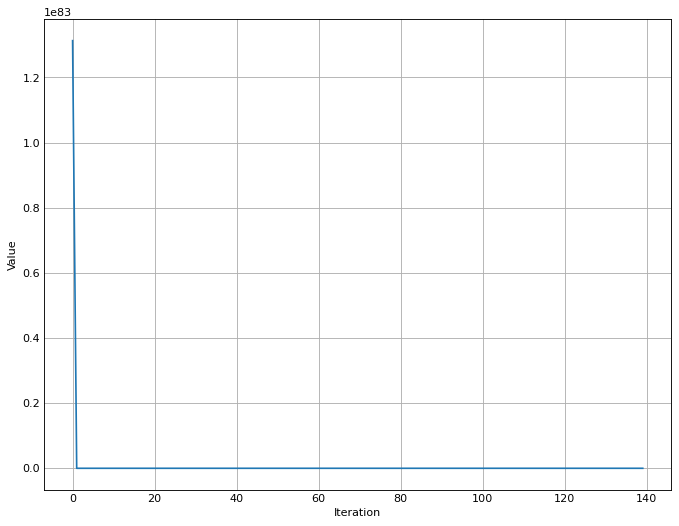

Soulution: 
[ 5.00072652e-01  4.95934169e-06 -5.23600458e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


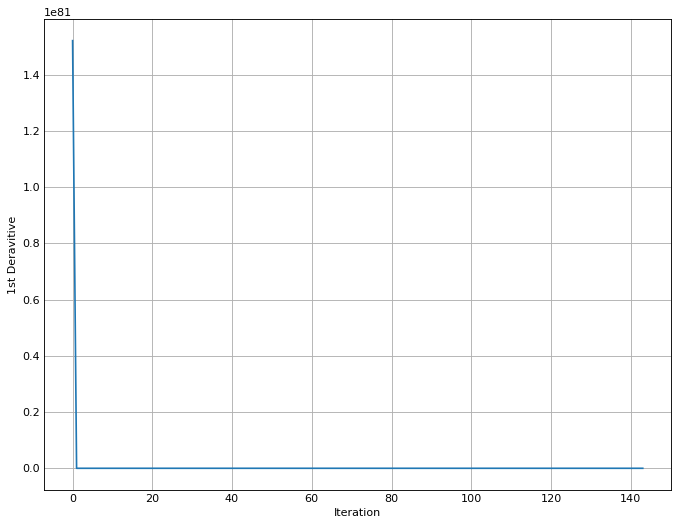

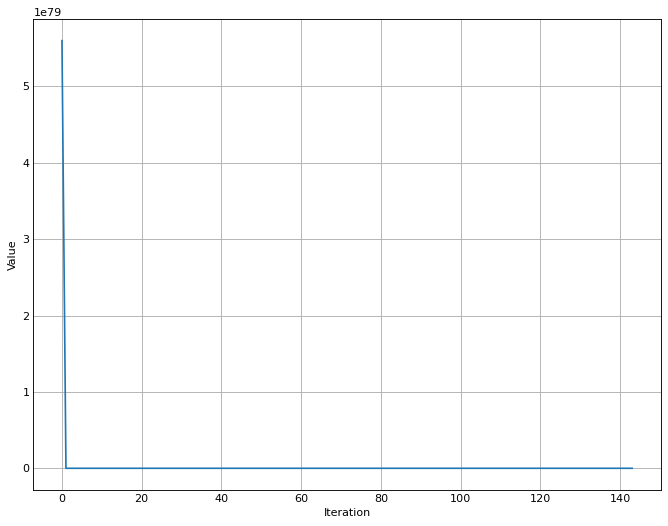

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


Soulution: 
[ 0.49821947 -0.19961053 -0.52882496]


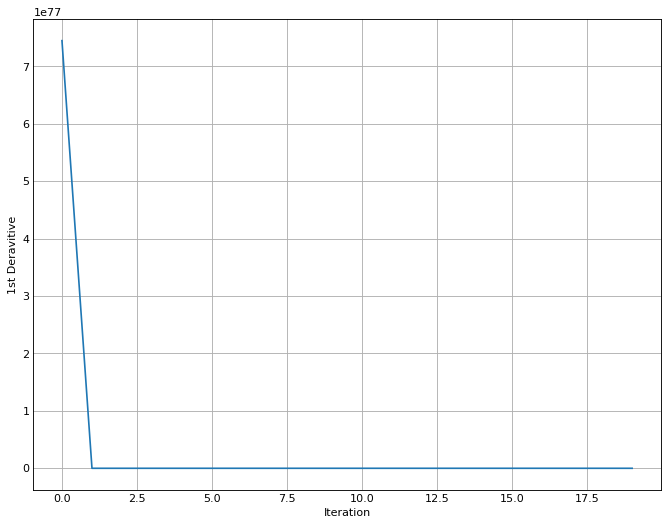

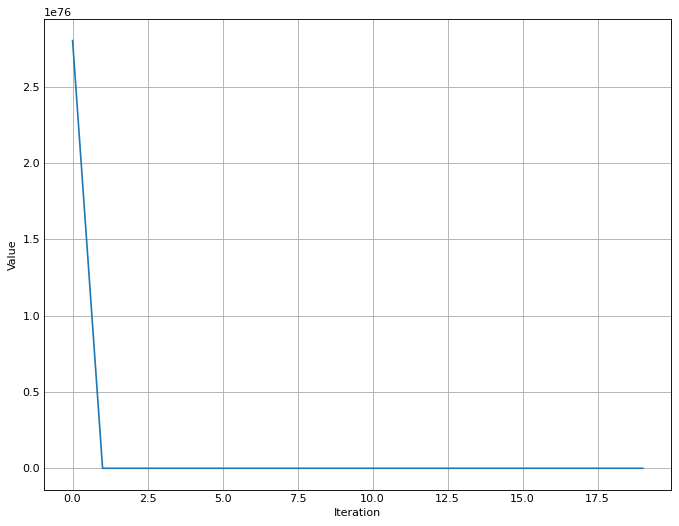

Soulution: 
[ 0.4980658  -0.19960106 -0.52882919]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


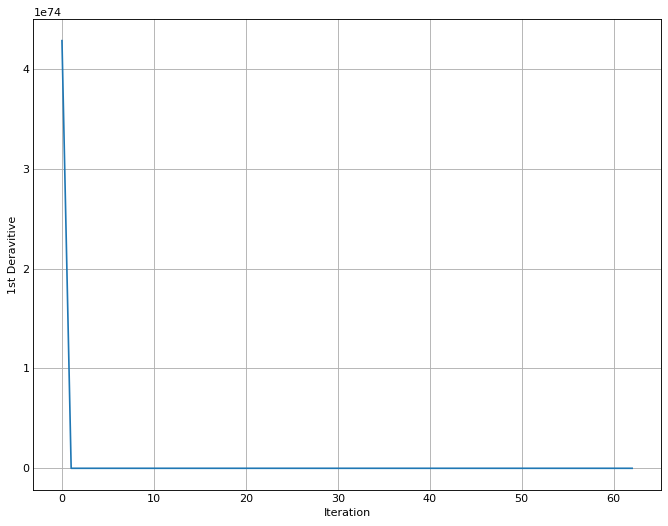

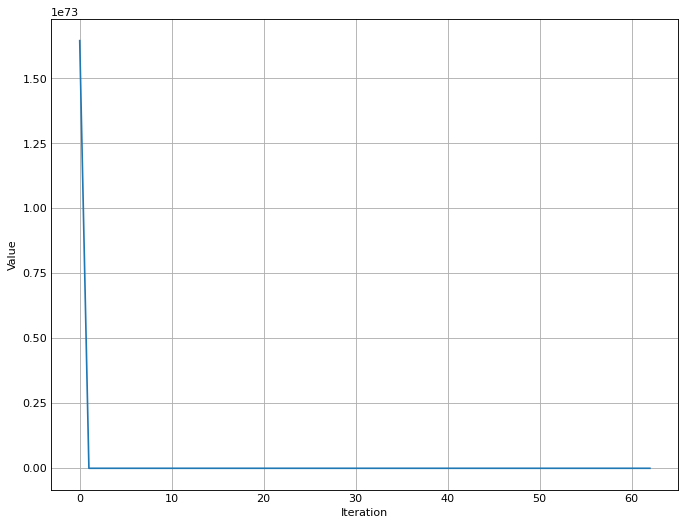

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


Soulution: 
[ 0.49806596 -0.19960102 -0.52882714]


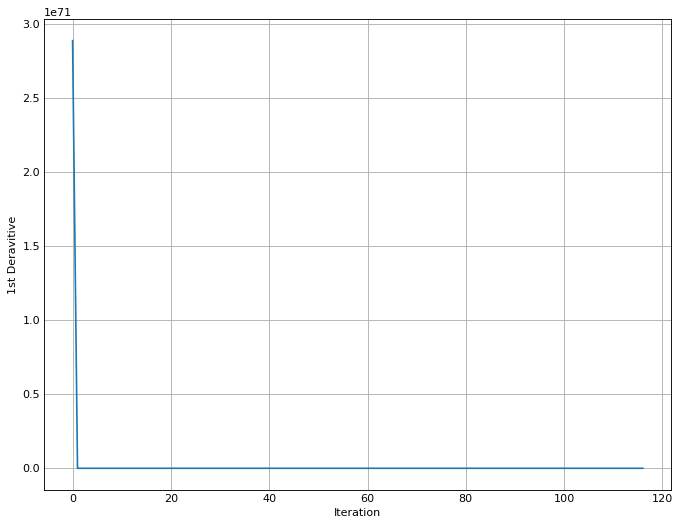

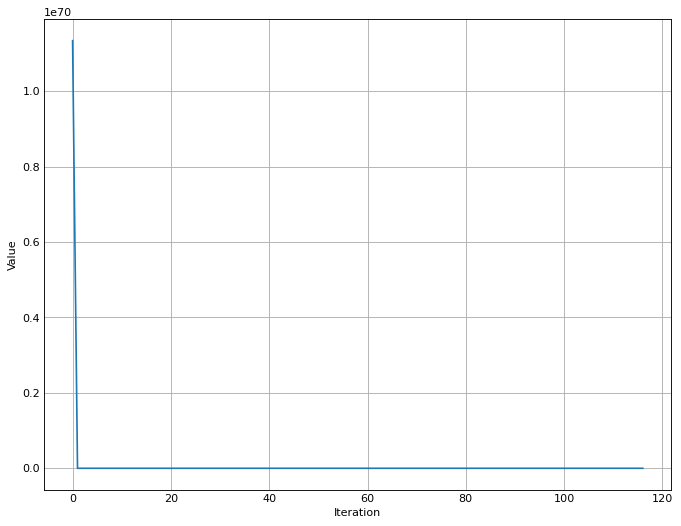

Soulution: 
[ 0.4980688  -0.1996011  -0.52882277]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


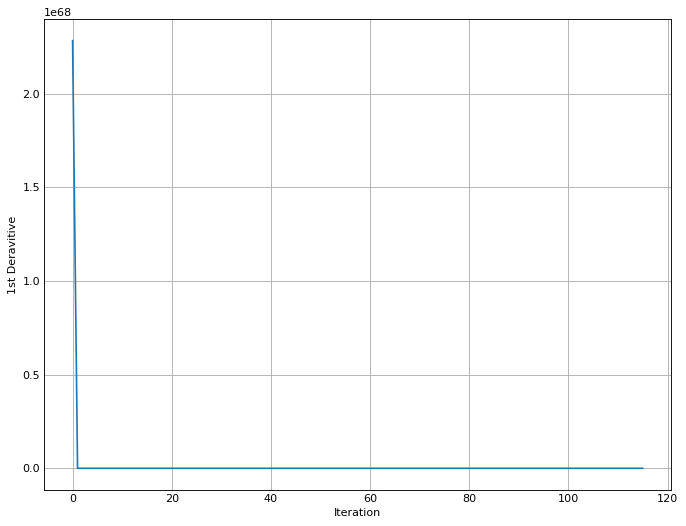

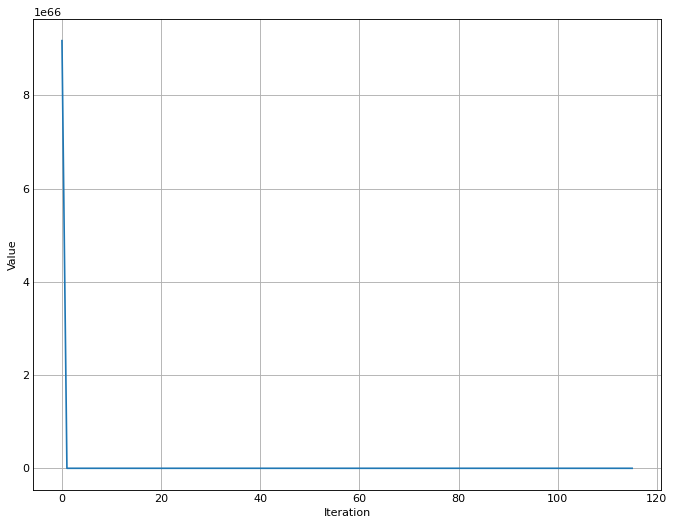

Soulution: 
[ 0.49806133 -0.19960061 -0.52882208]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


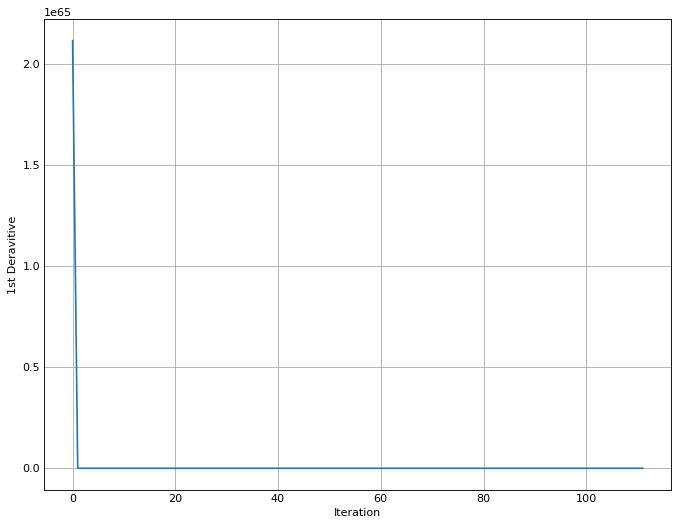

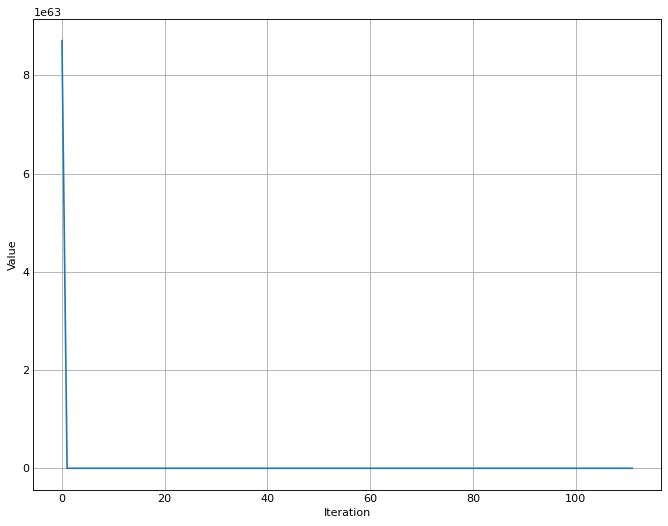

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


Soulution: 
[ 0.49806955 -0.19960124 -0.5288271 ]


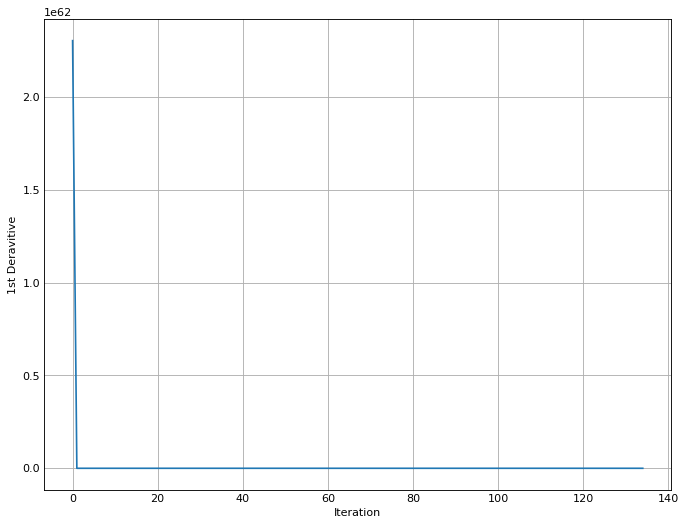

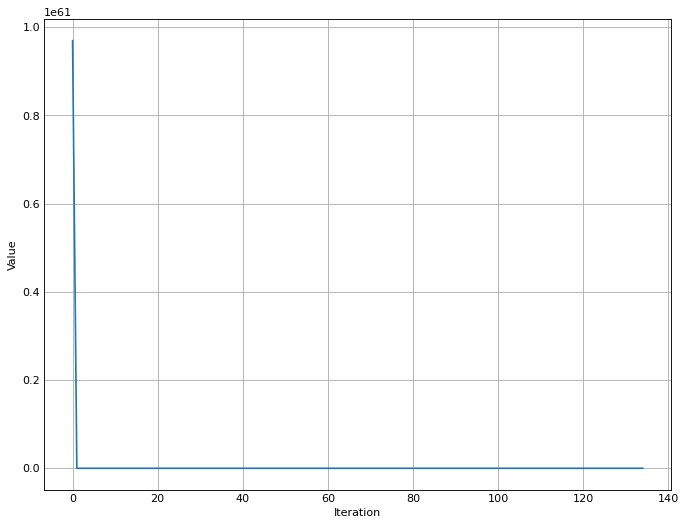

Soulution: 
[ 0.49806476 -0.19960096 -0.52882762]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


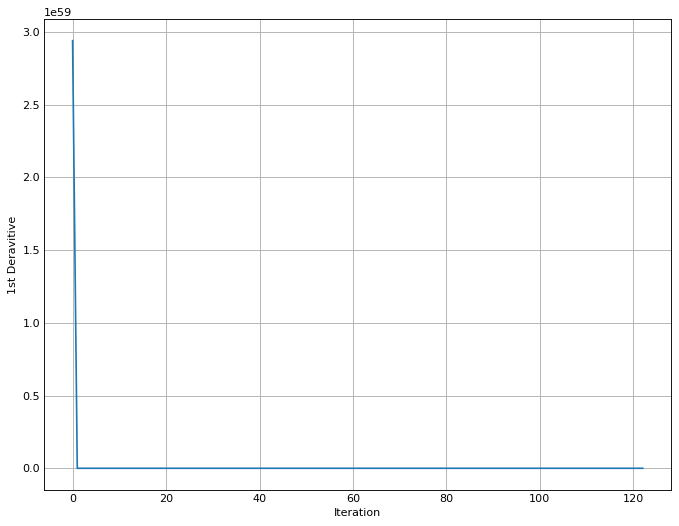

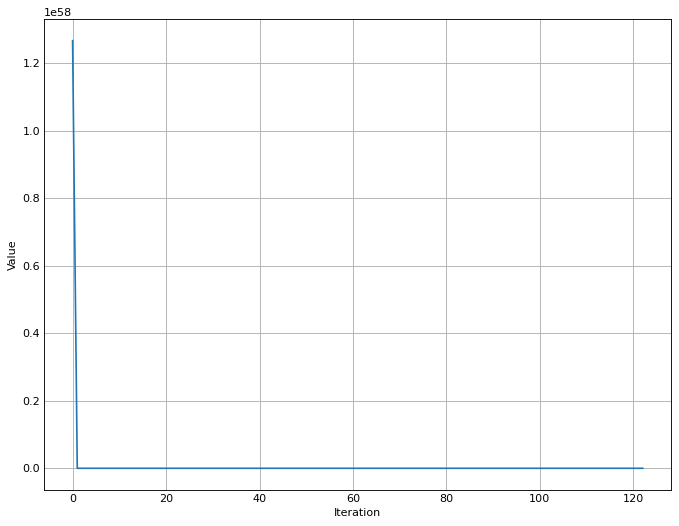

Soulution: 
[ 0.49806939 -0.19960113 -0.52882292]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


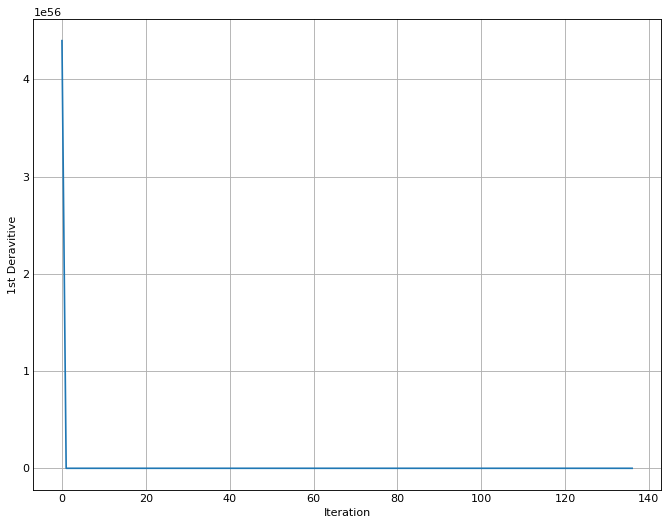

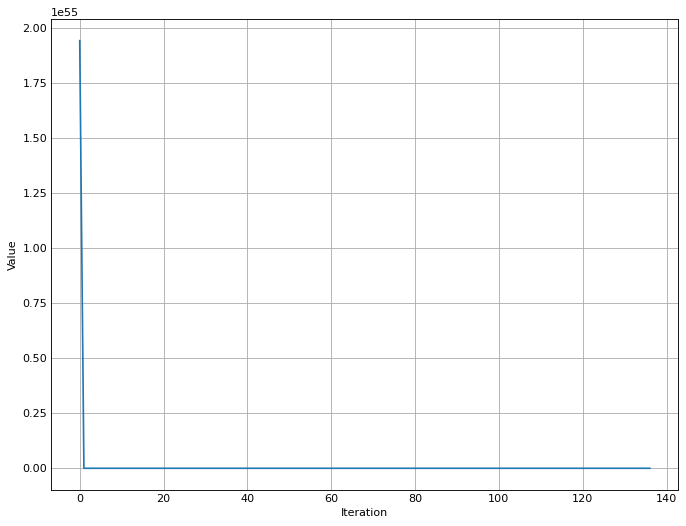

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


Soulution: 
[ 0.4980665  -0.19960096 -0.52882292]


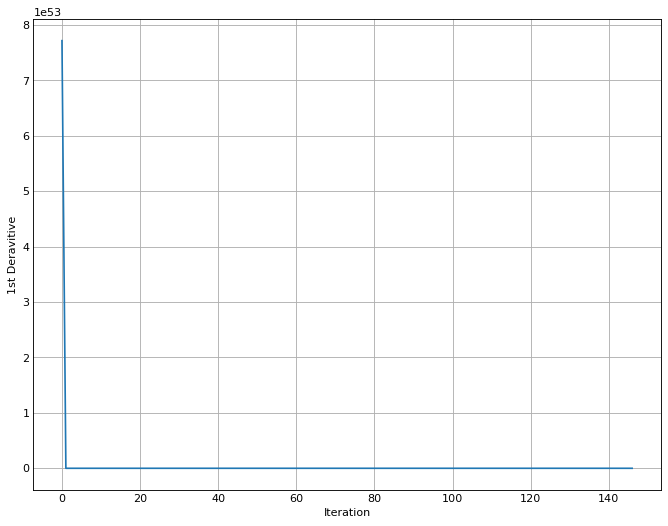

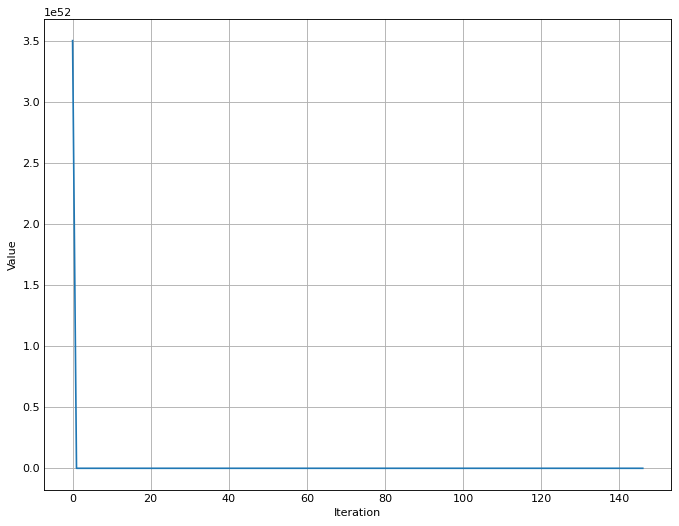

Soulution: 
[ 0.4980688  -0.1996011  -0.52882282]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


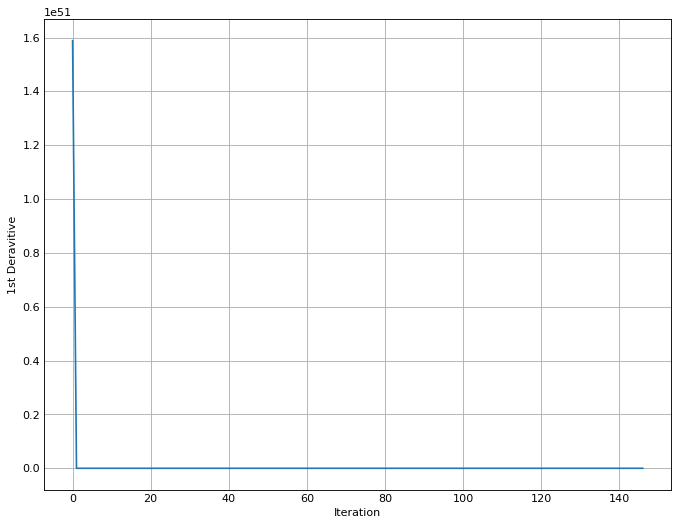

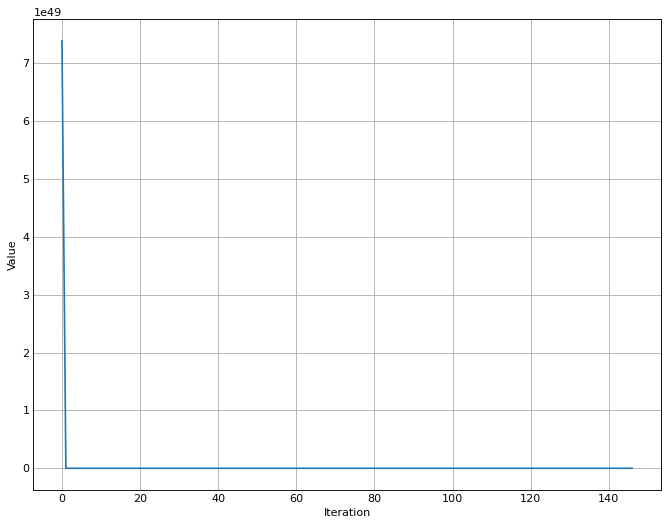

Soulution: 
[ 0.49806969 -0.19960116 -0.52882304]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


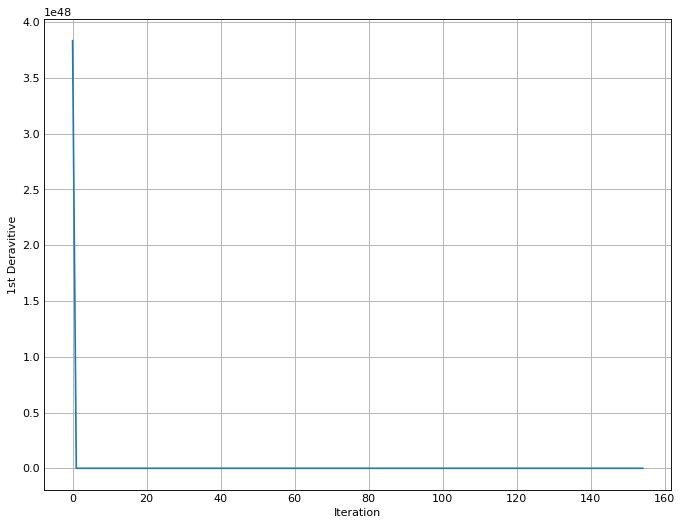

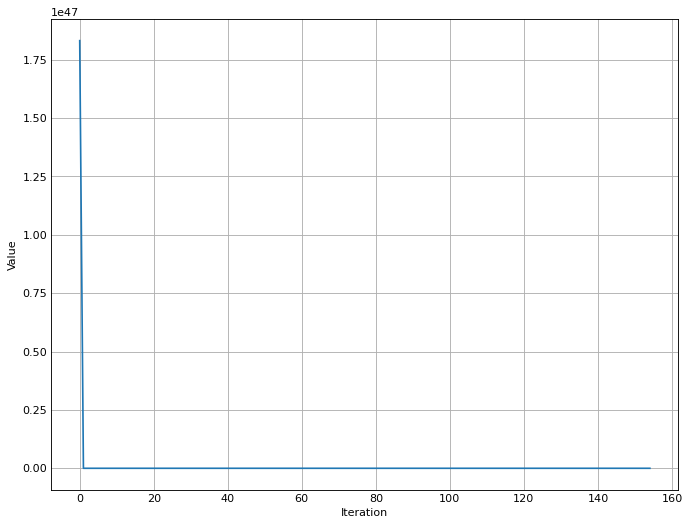

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


Soulution: 
[ 0.49807125 -0.19960126 -0.52882326]


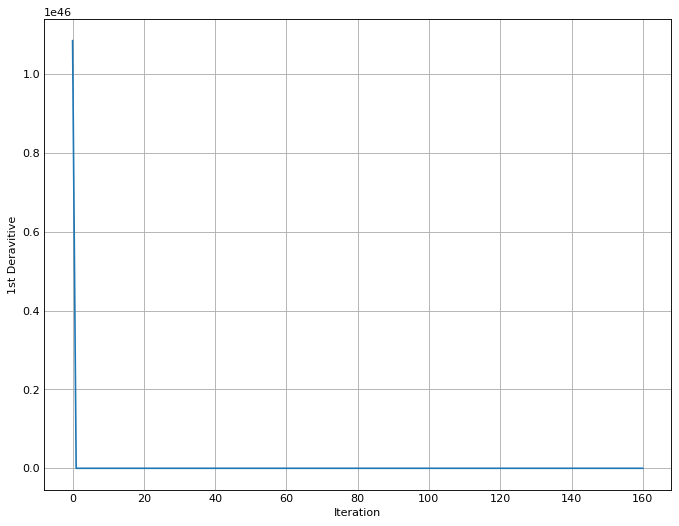

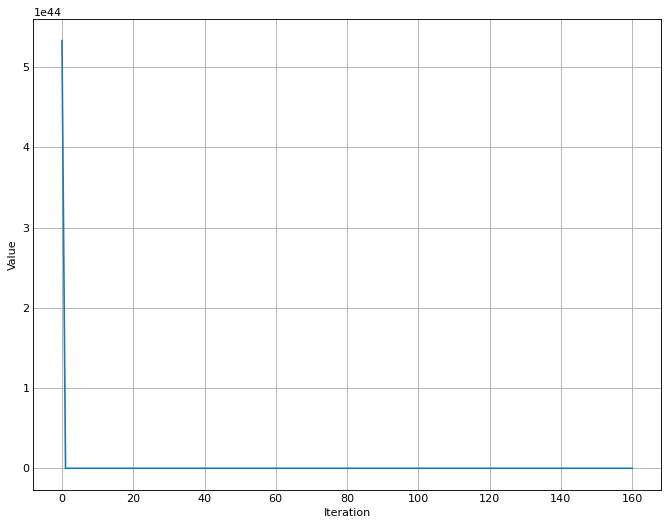

Soulution: 
[ 5.00083181e-01  5.74444406e-06 -5.23601091e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


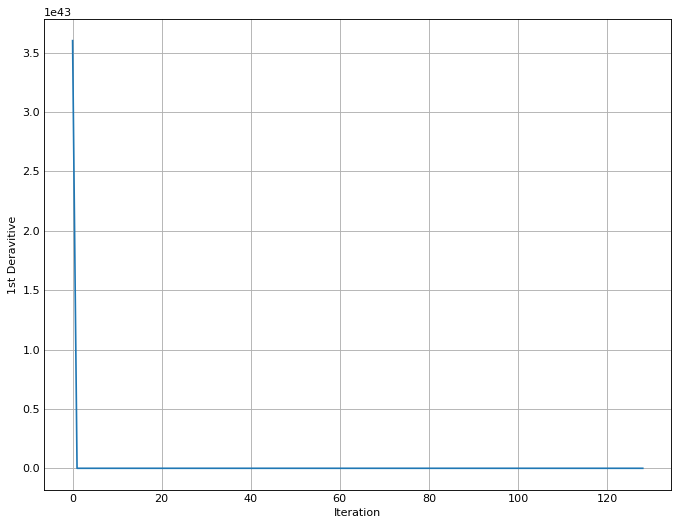

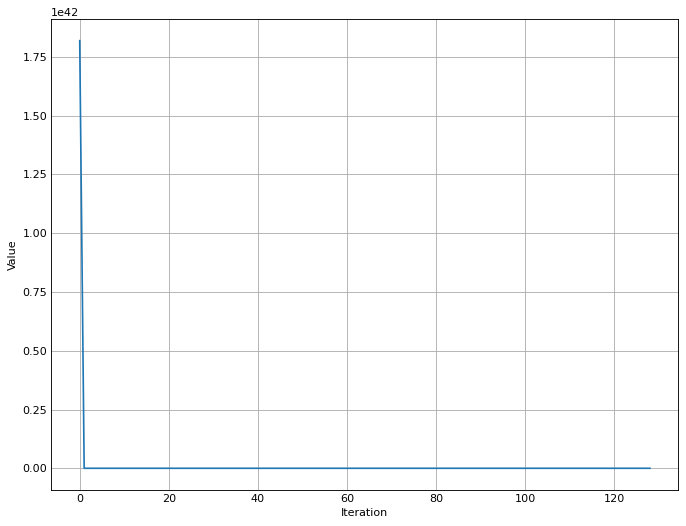

Soulution: 
[ 0.49807001 -0.19960118 -0.52882304]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


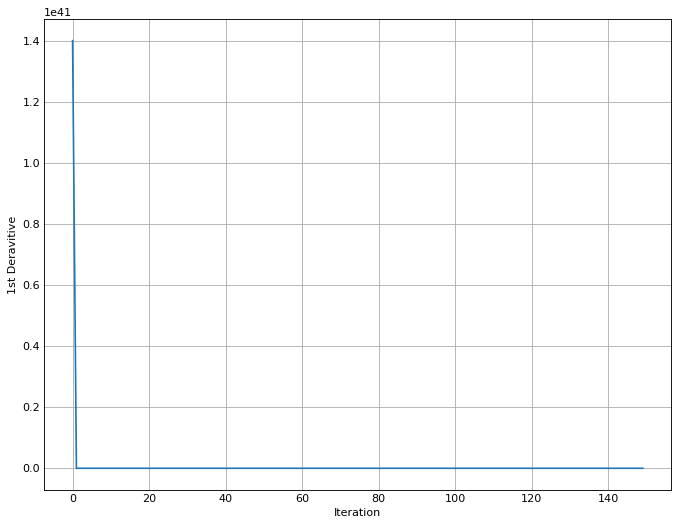

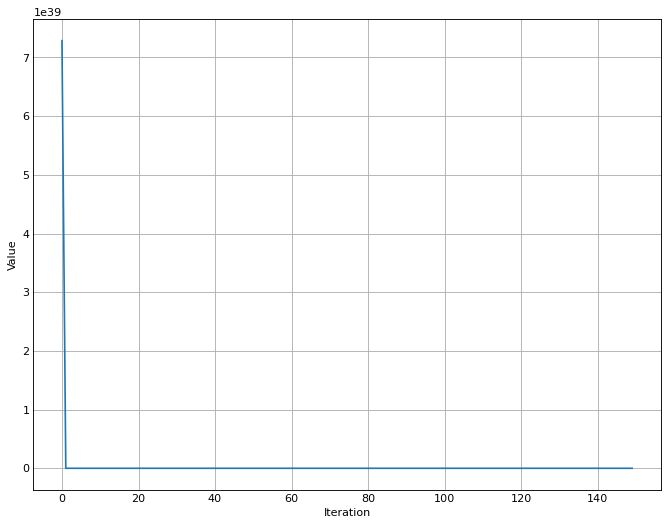

Soulution: 
[ 0.49806341 -0.19960086 -0.52882729]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


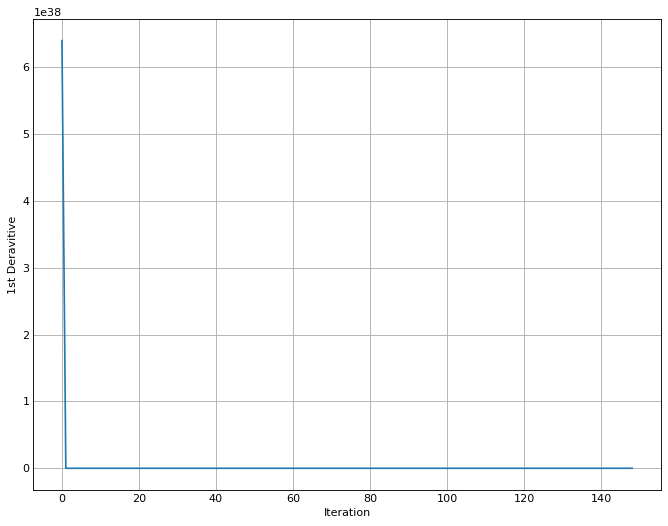

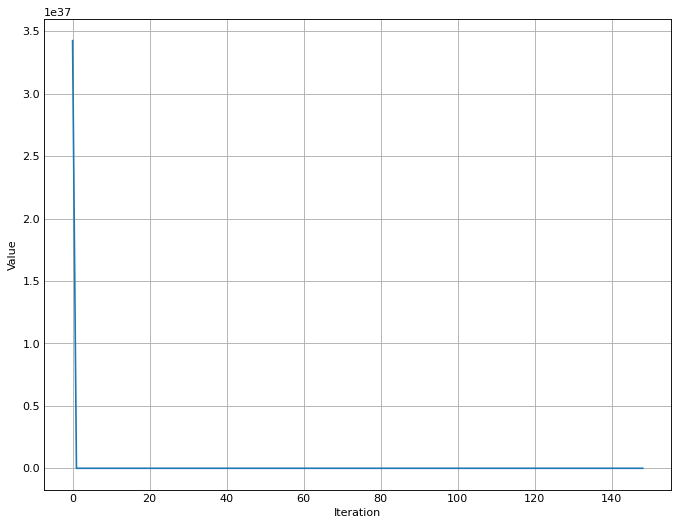

Soulution: 
[ 4.99920261e-01 -4.71955526e-06 -5.23601165e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


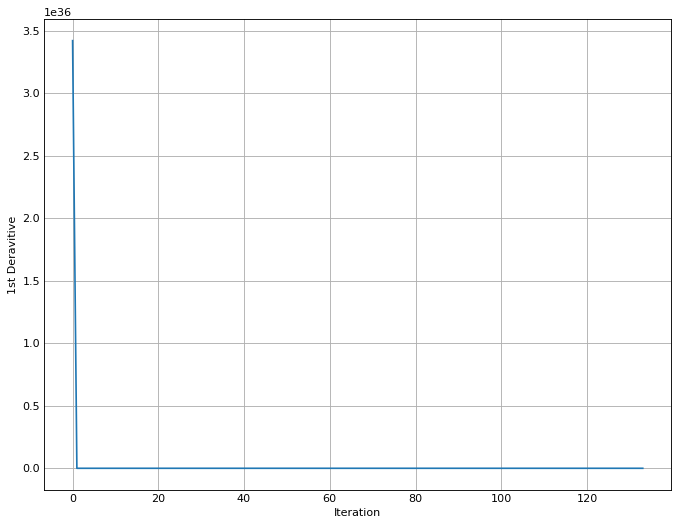

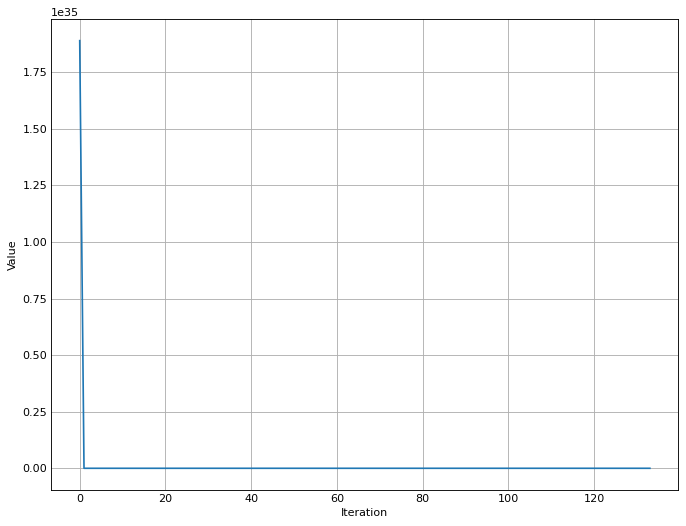

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


Soulution: 
[ 0.49807013 -0.19960119 -0.52882329]


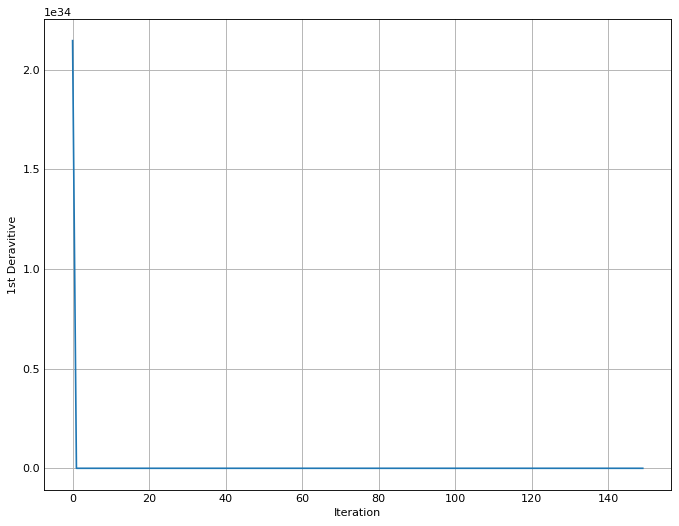

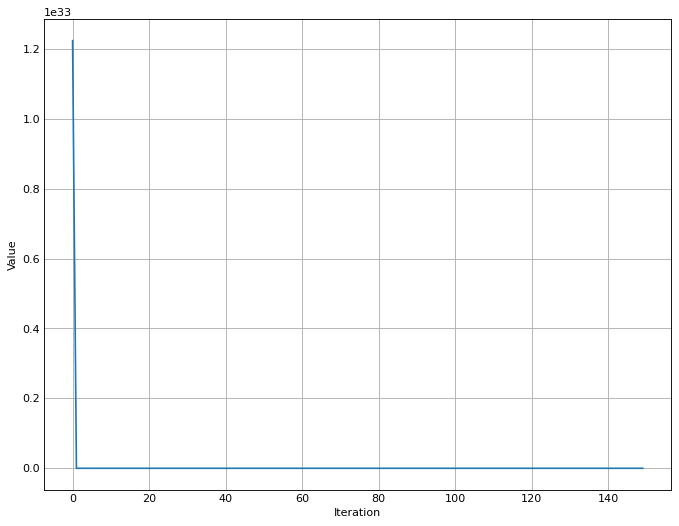

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


Soulution: 
[ 0.49807278 -0.19960144 -0.52882685]


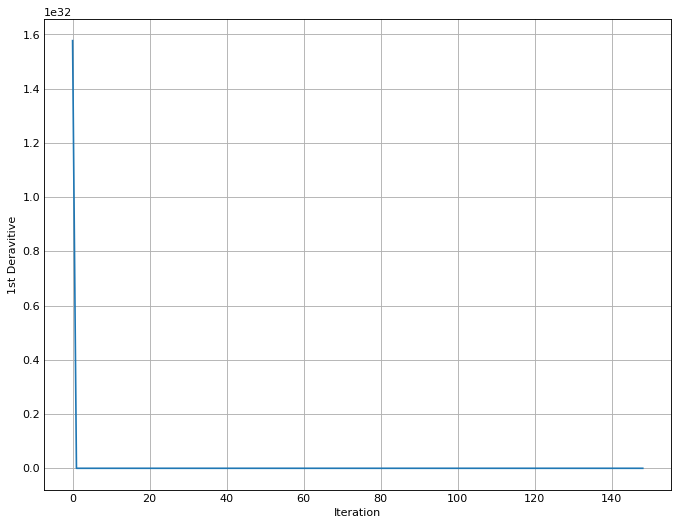

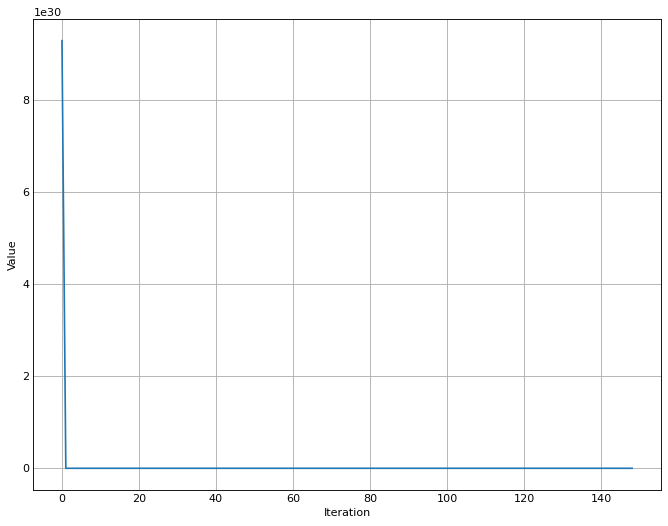

Soulution: 
[ 4.99919889e-01 -4.65940730e-06 -5.23601658e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


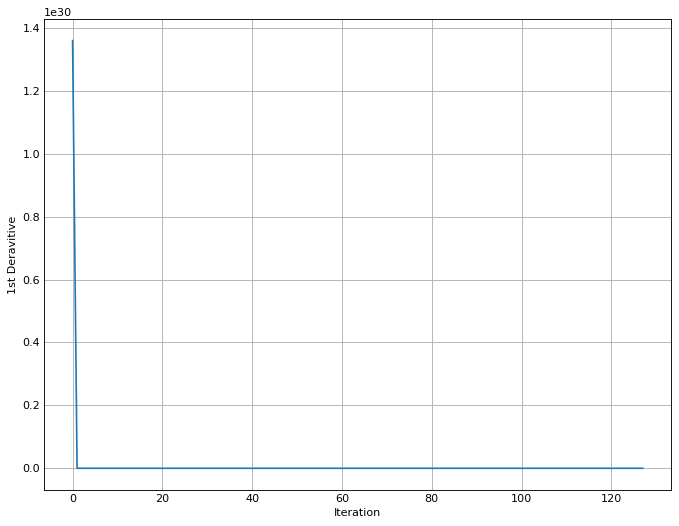

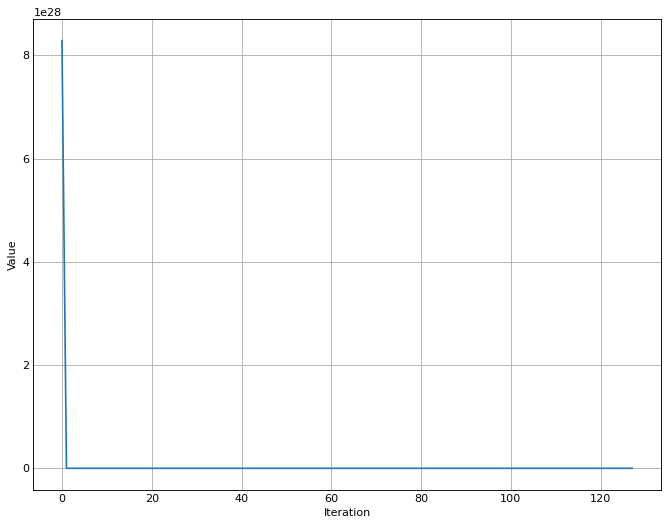

Soulution: 
[ 0.49806642 -0.19960107 -0.52882784]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


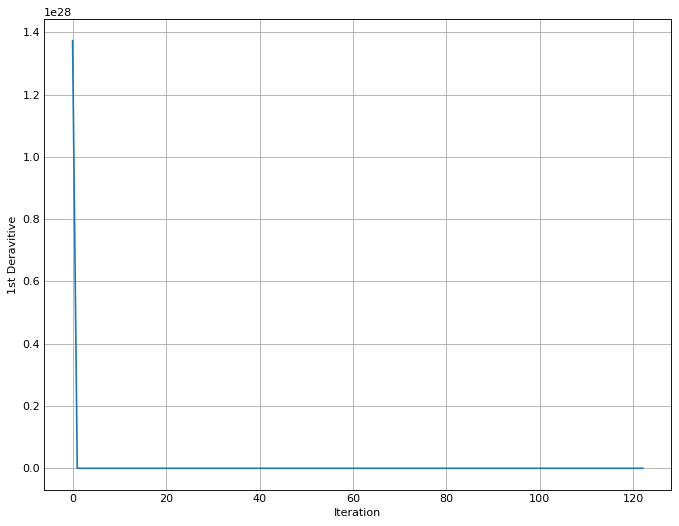

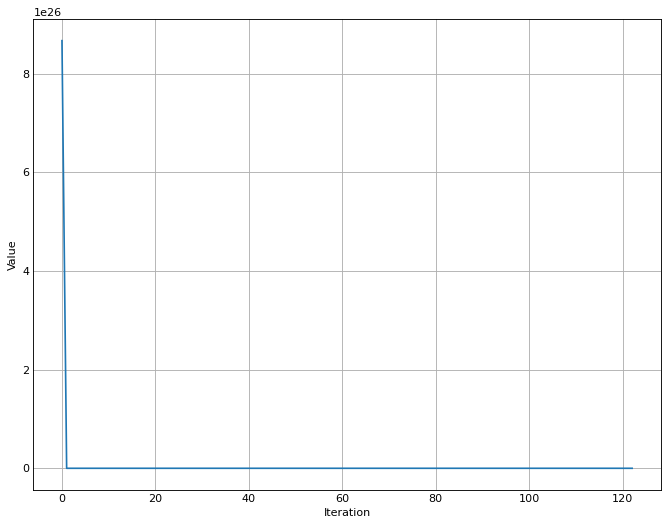

Soulution: 
[ 0.49805891 -0.19960062 -0.52882873]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


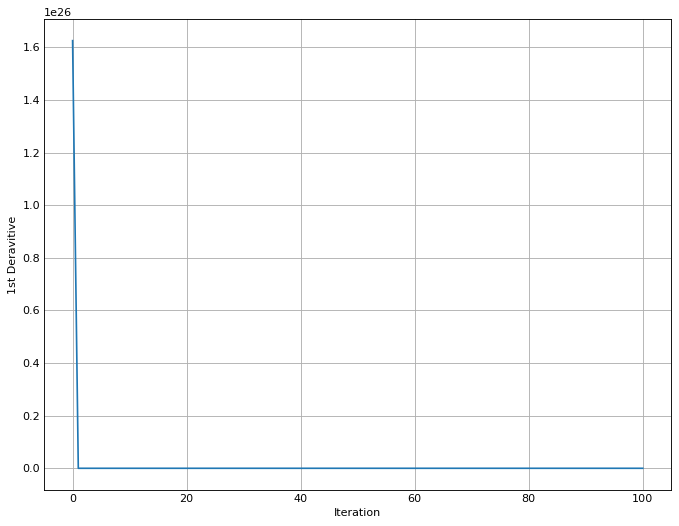

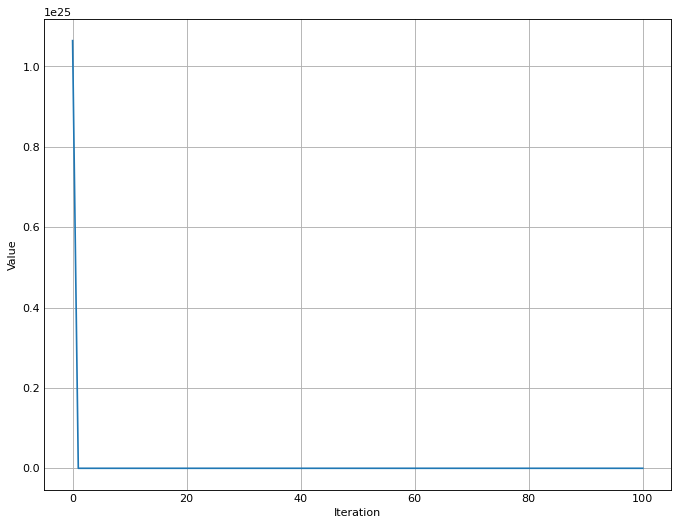

Soulution: 
[ 4.99911439e-01 -5.08371615e-06 -5.23602355e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


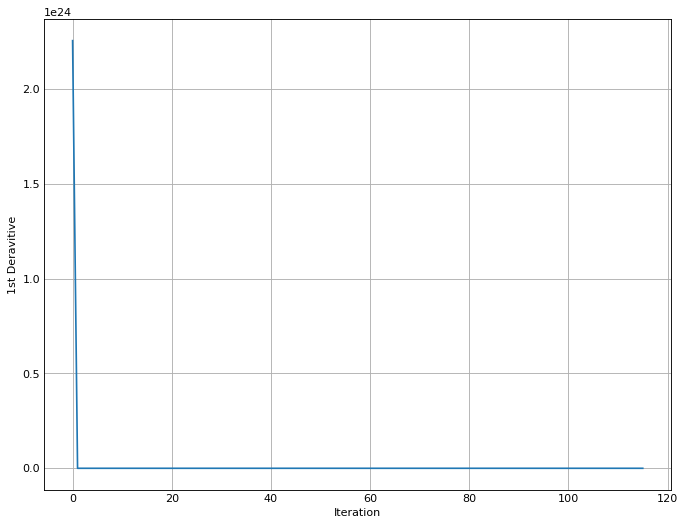

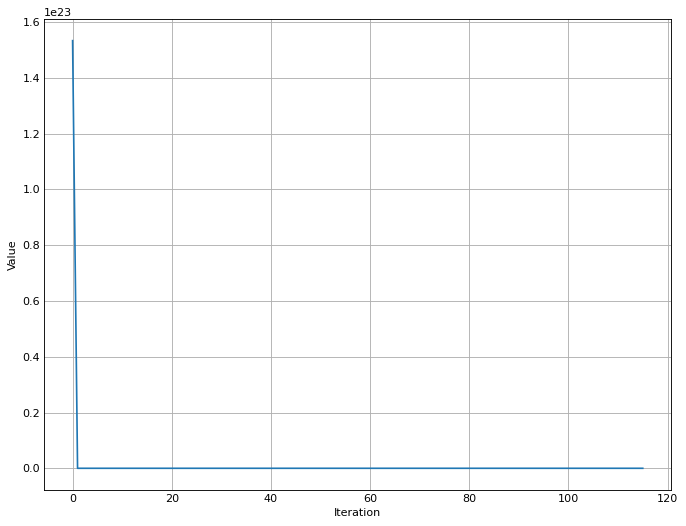

Soulution: 
[ 4.99914578e-01 -4.87480471e-06 -5.23602397e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


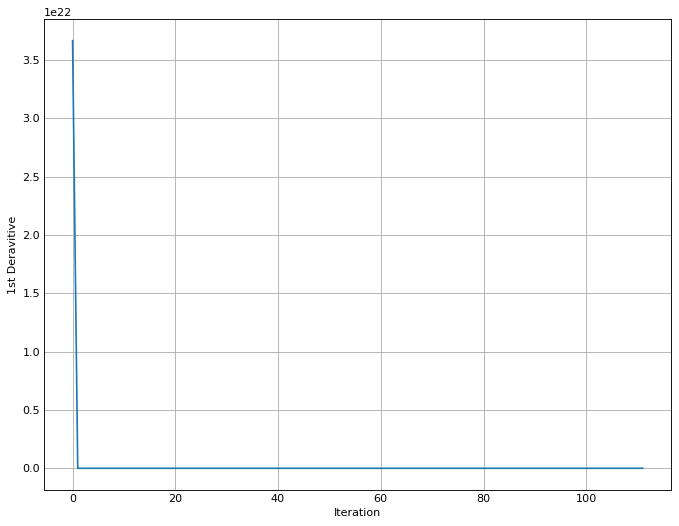

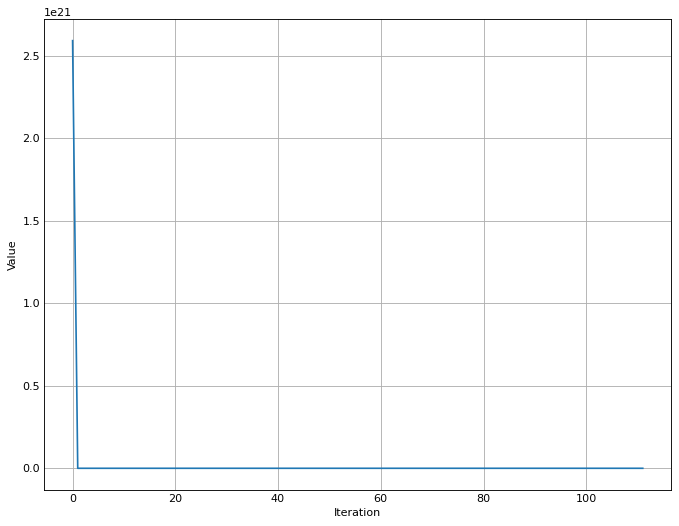

Soulution: 
[ 0.49806678 -0.19960111 -0.52882877]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


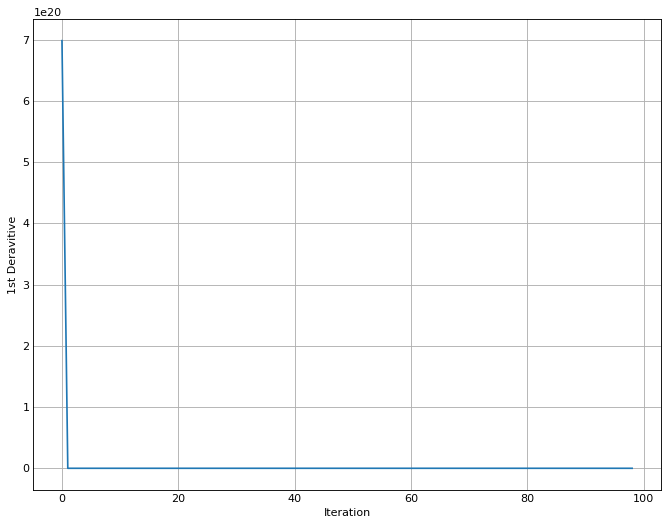

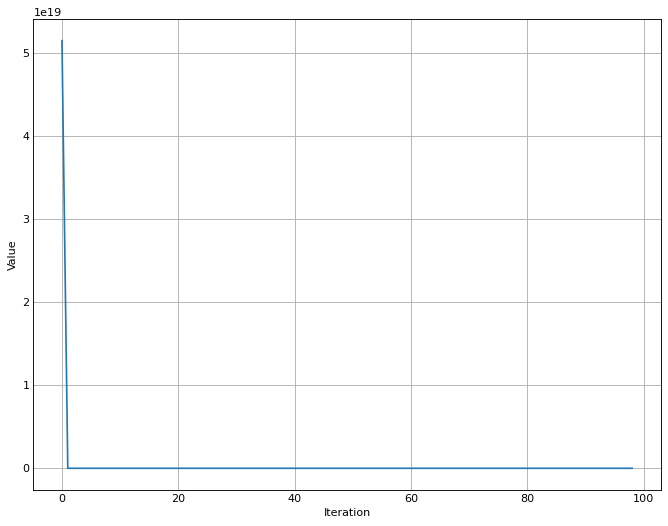

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


Soulution: 
[ 4.99912005e-01 -4.94150264e-06 -5.23602975e-01]


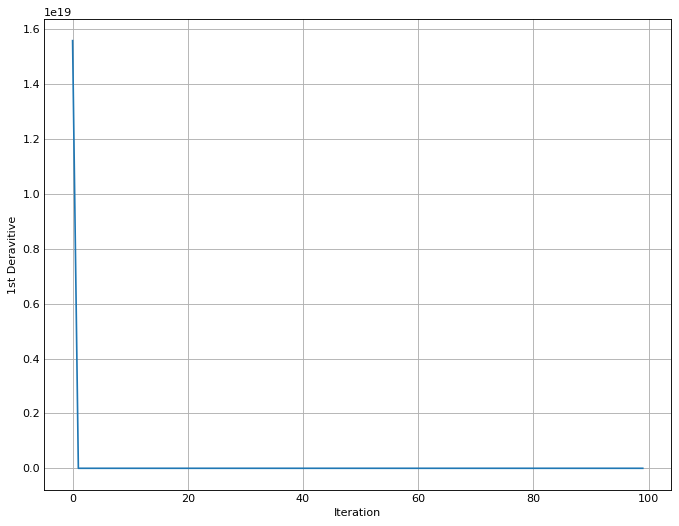

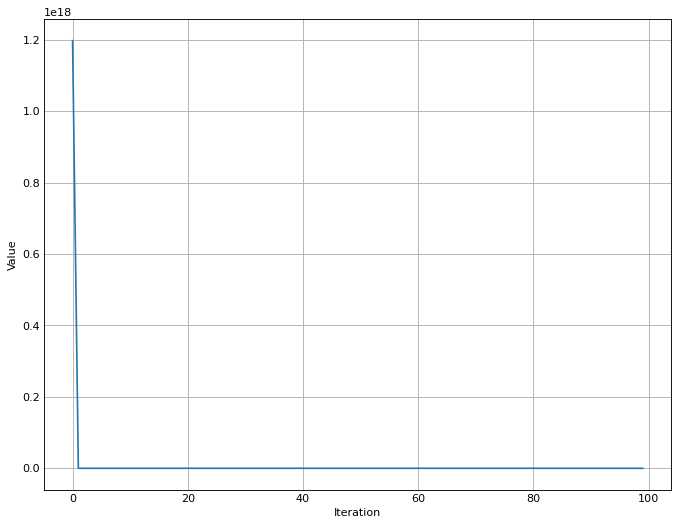

Soulution: 
[ 4.99915124e-01 -4.72980207e-06 -5.23603041e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


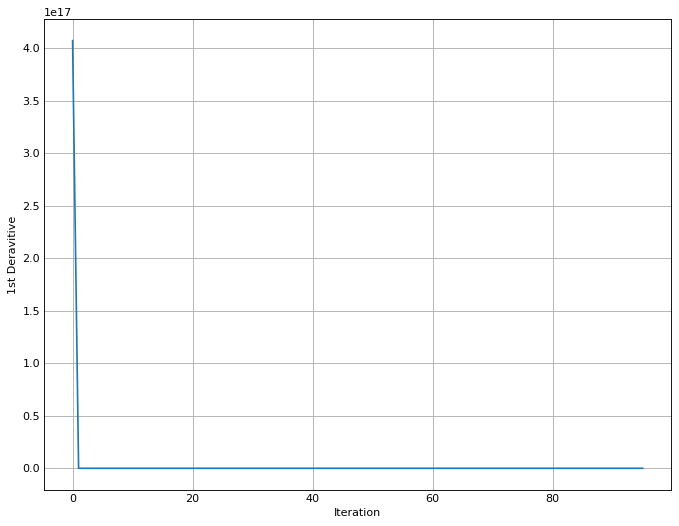

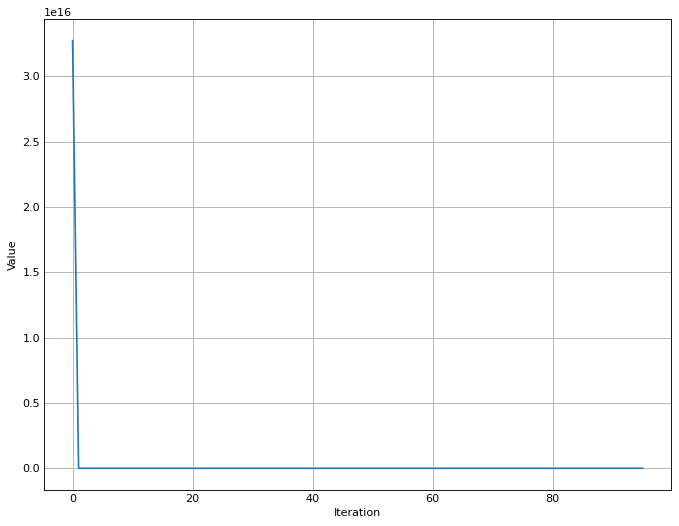

Soulution: 
[ 4.99921202e-01 -4.38837890e-06 -5.23602751e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


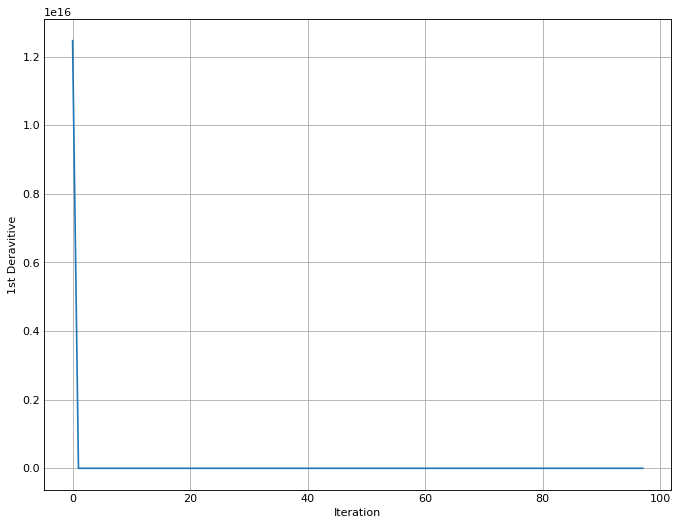

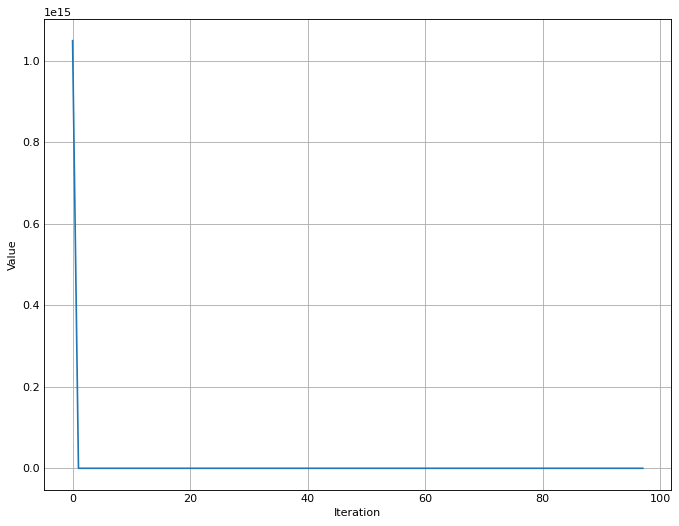

Soulution: 
[ 0.49806248 -0.19960082 -0.5288277 ]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


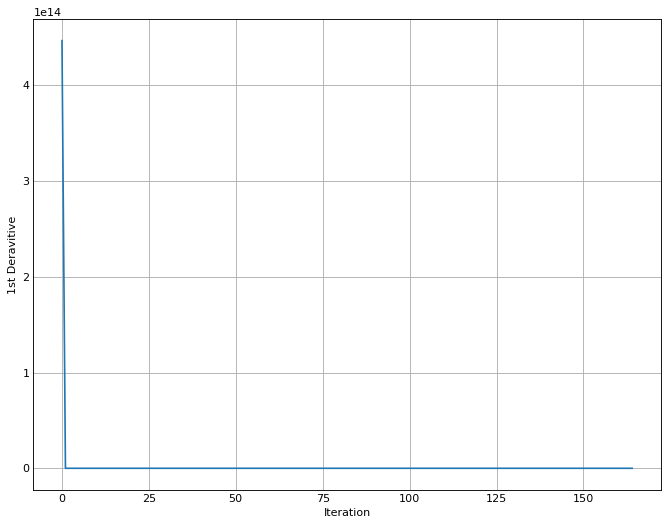

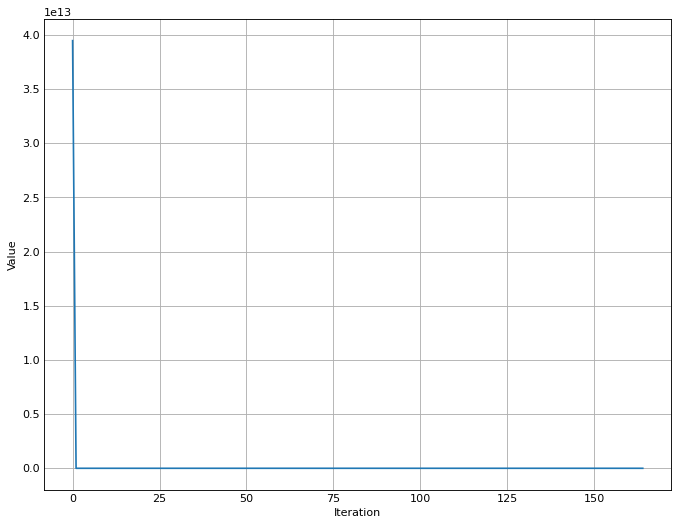

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


Soulution: 
[ 0.49806702 -0.19960112 -0.52882881]


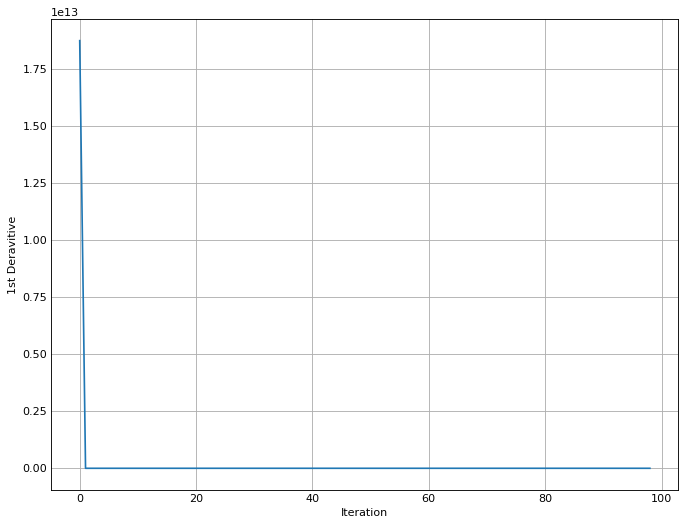

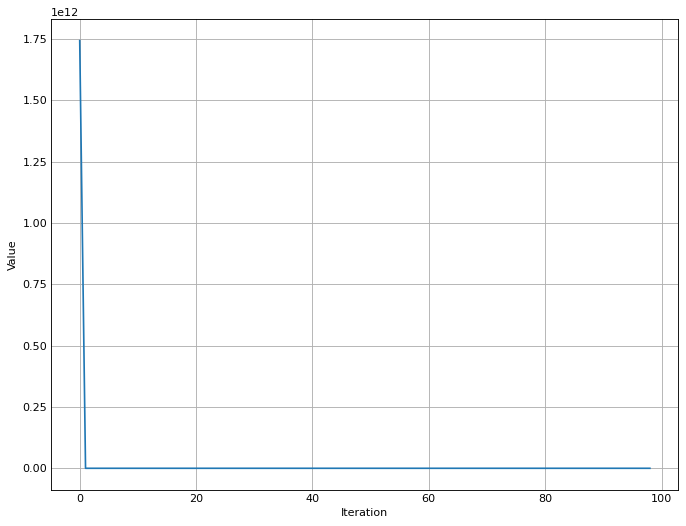

Soulution: 
[ 4.99916705e-01 -4.76154666e-06 -5.23602259e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


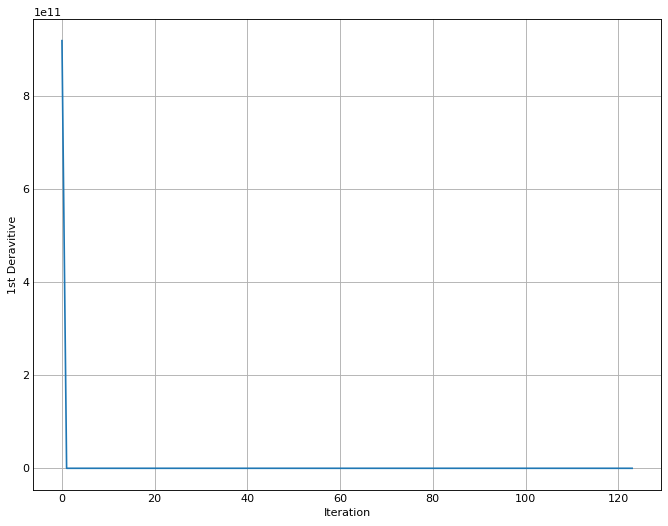

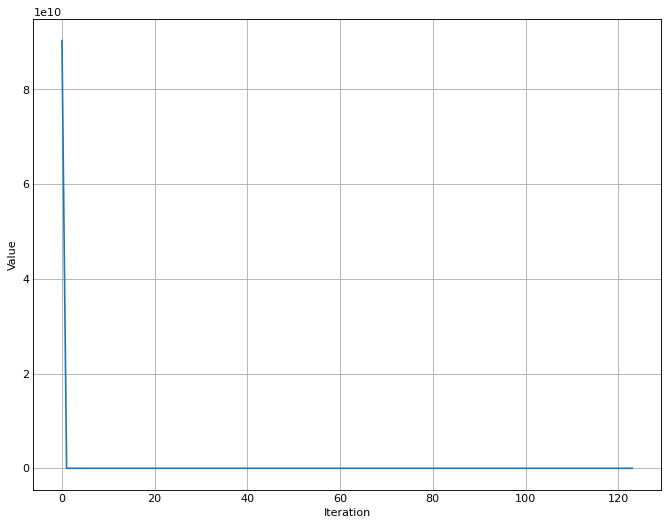

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


Soulution: 
[ 4.99915897e-01 -4.84048399e-06 -5.23602101e-01]


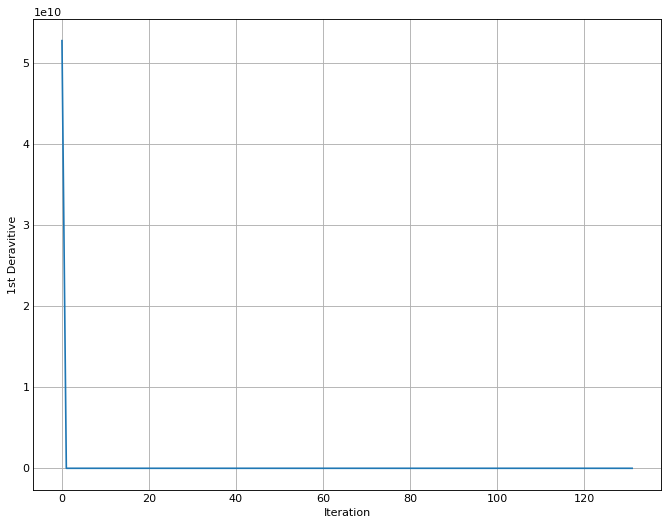

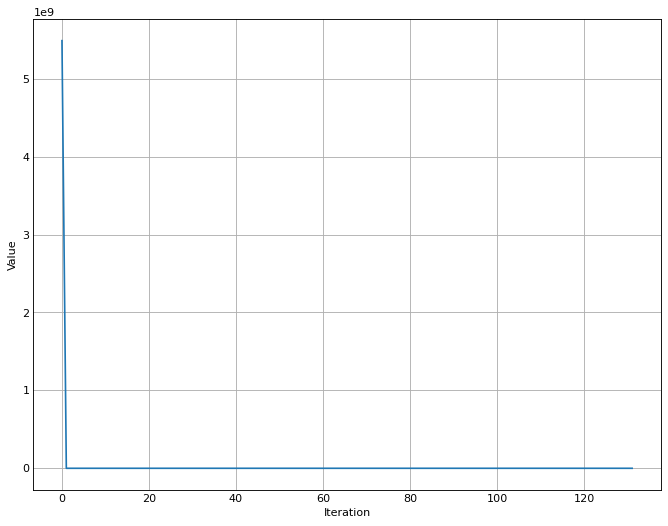

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


Soulution: 
[ 4.99912911e-01 -5.02978946e-06 -5.23602116e-01]


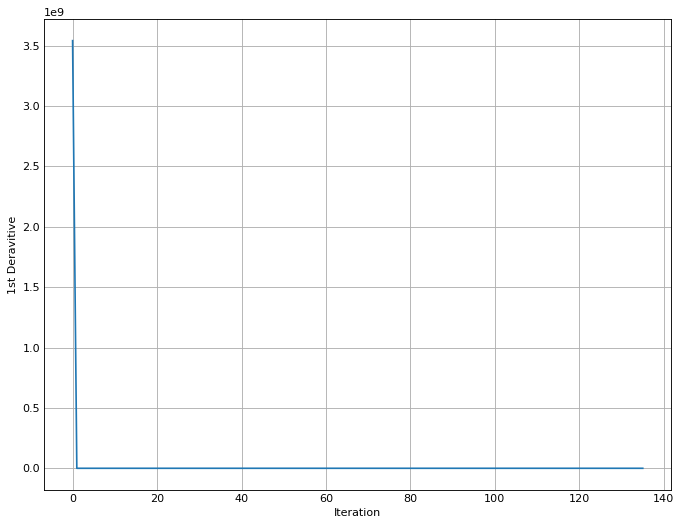

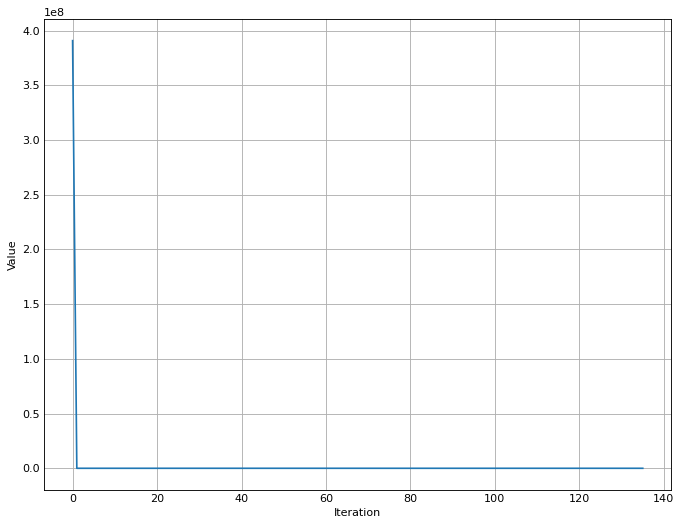

Soulution: 
[ 4.99920014e-01 -4.59613692e-06 -5.23601982e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


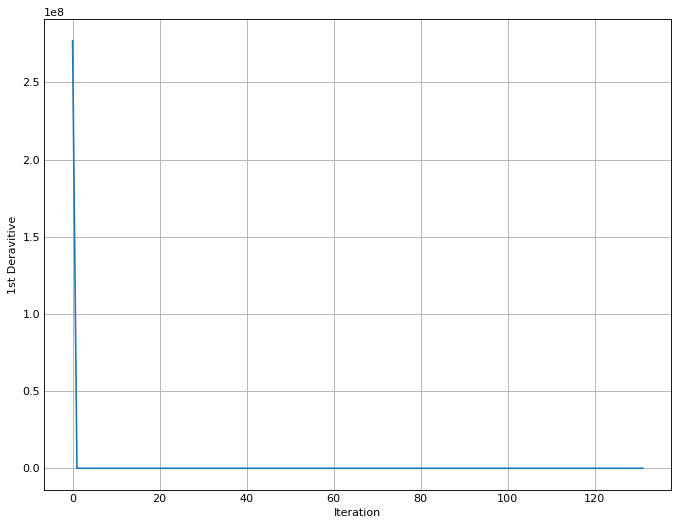

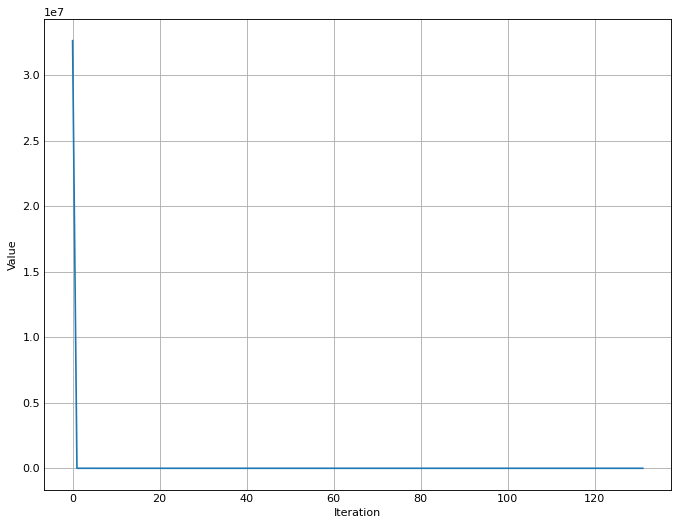

Soulution: 
[ 4.99919582e-01 -4.42375462e-06 -5.23603150e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


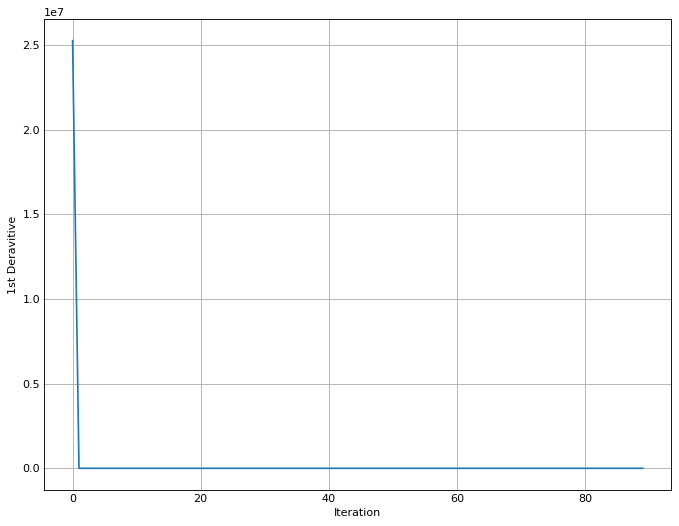

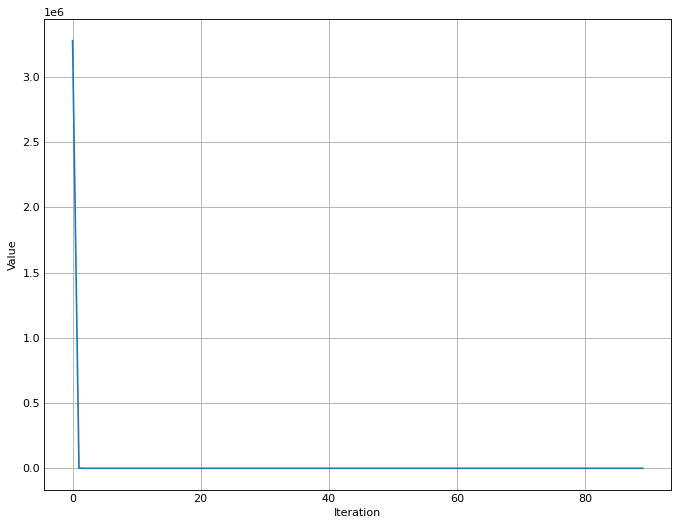

Soulution: 
[ 0.49822606 -0.19961105 -0.52882965]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


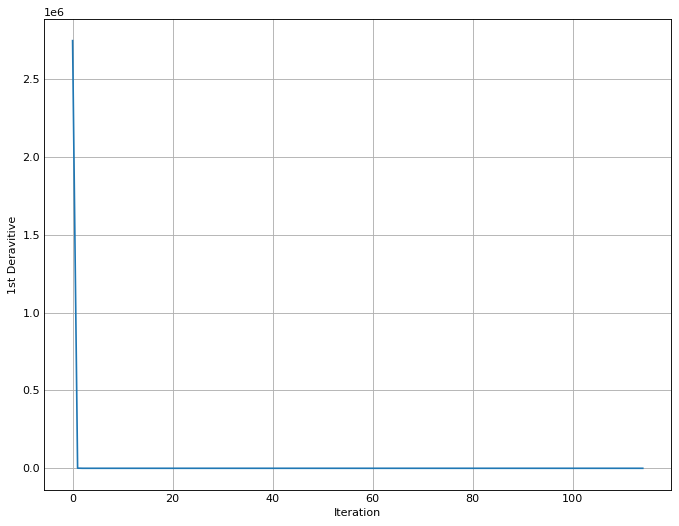

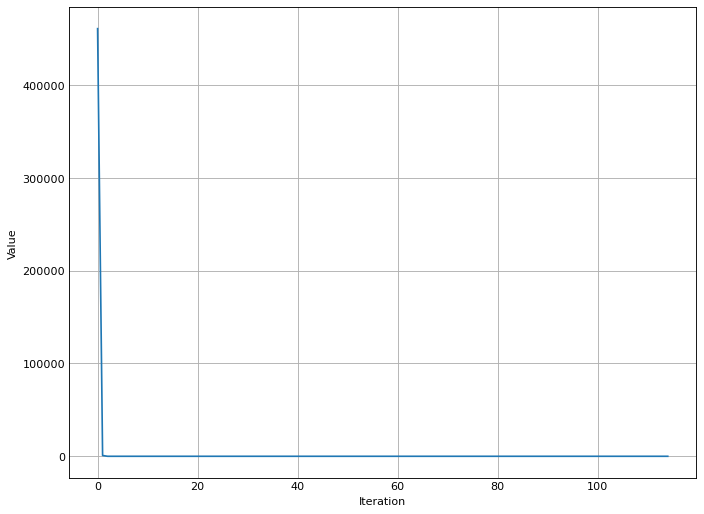

Soulution: 
[ 5.00076804e-01  5.65145560e-06 -5.23602962e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


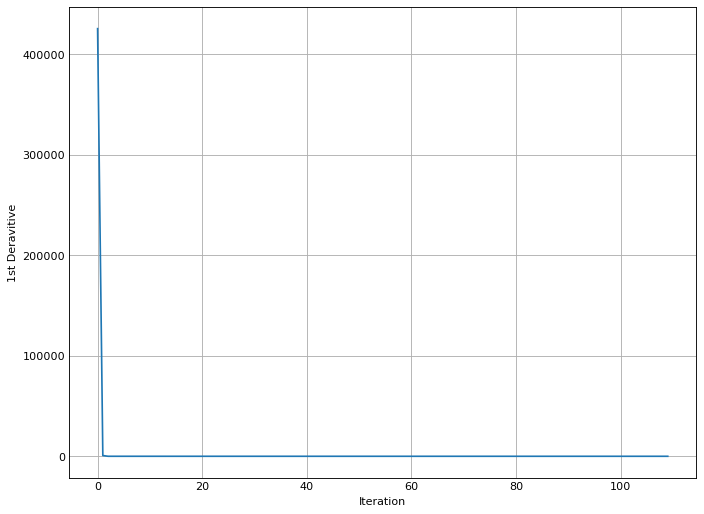

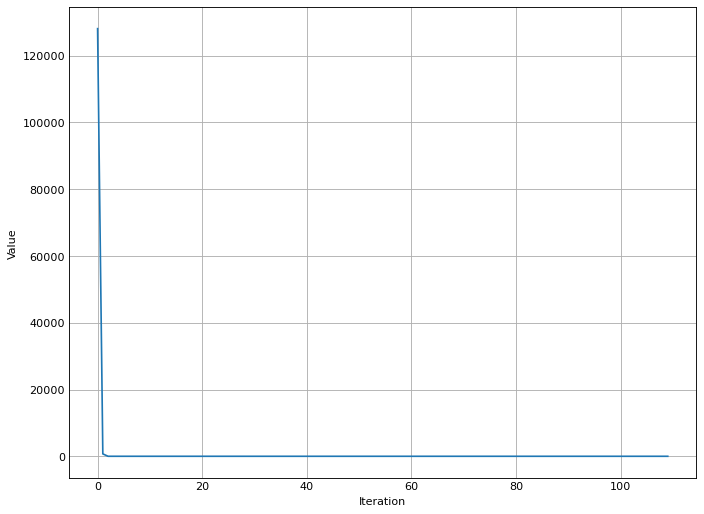

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


Soulution: 
[ 5.00079679e-01  4.67129016e-06 -5.23596124e-01]


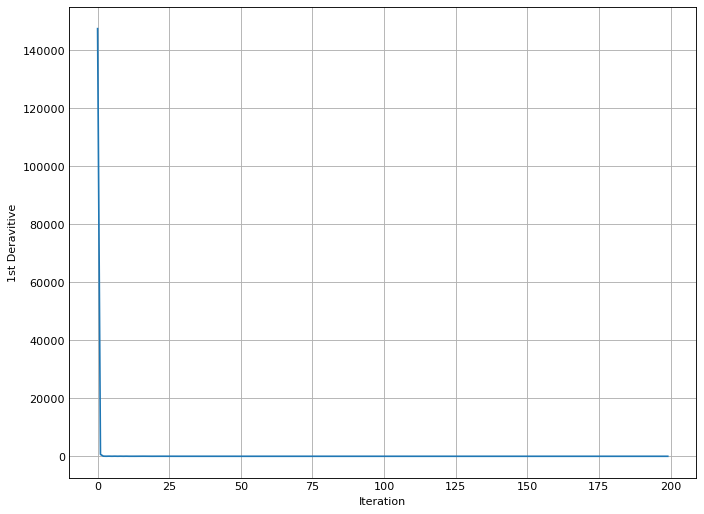

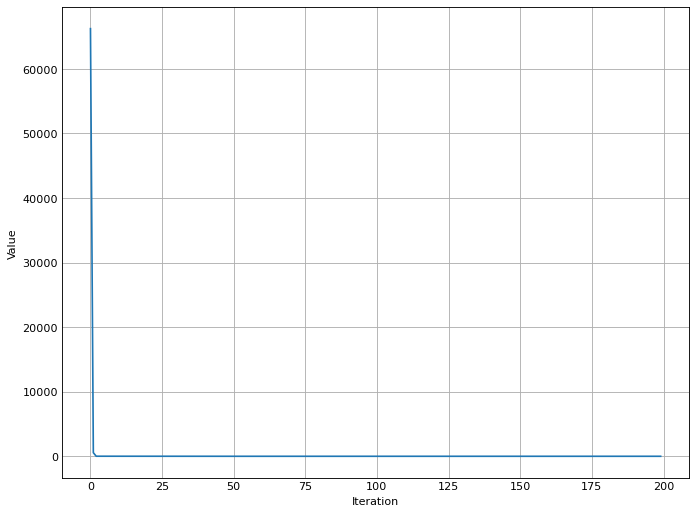

Soulution: 
[ 5.00074659e-01  5.53431578e-06 -5.23602913e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


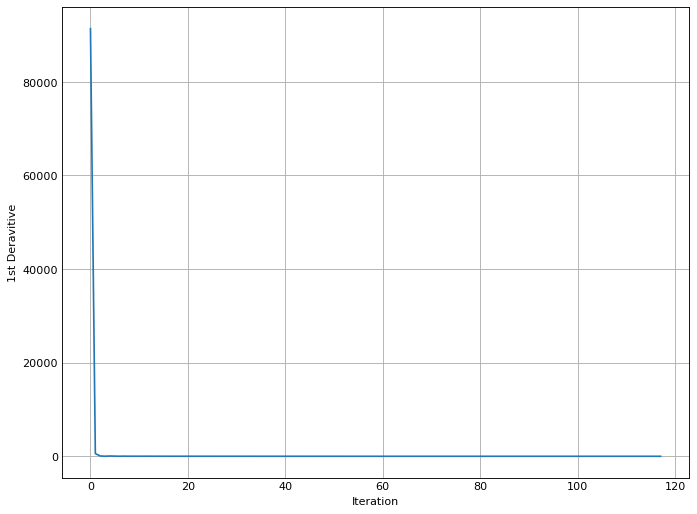

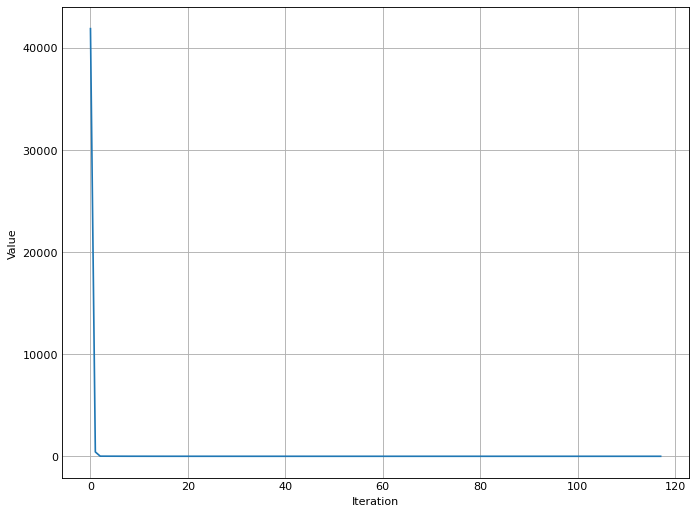

Soulution: 
[ 5.00081465e-01  5.59908149e-06 -5.23600886e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


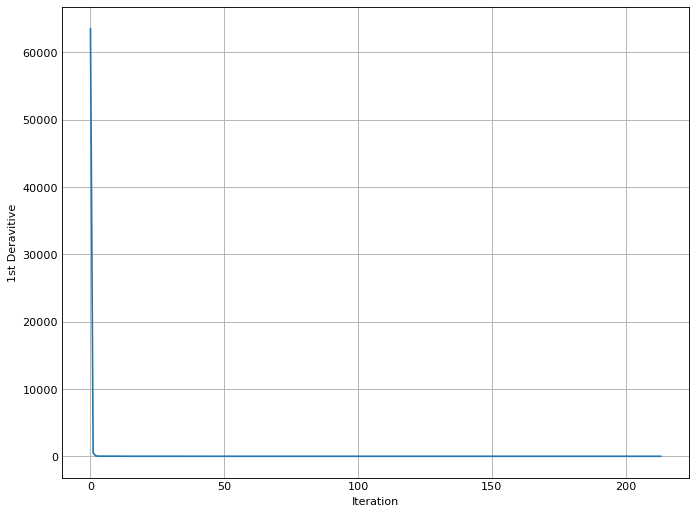

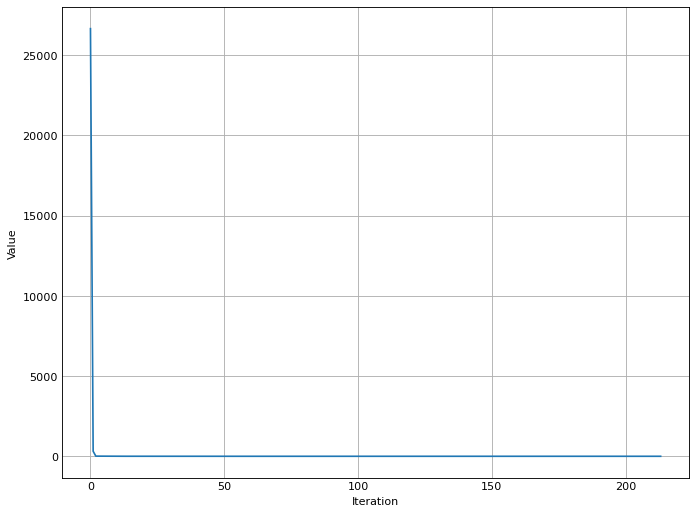

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


Soulution: 
[ 5.00076901e-01  5.63365312e-06 -5.23602809e-01]


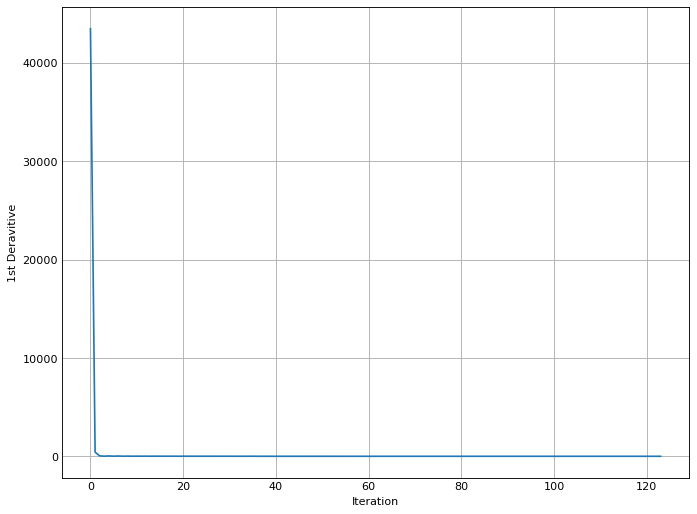

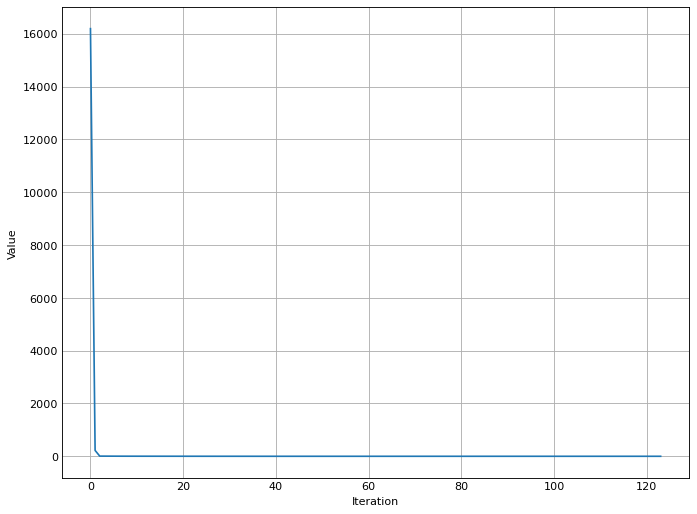

Soulution: 
[ 5.00086489e-01  4.96213519e-06 -5.23595263e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


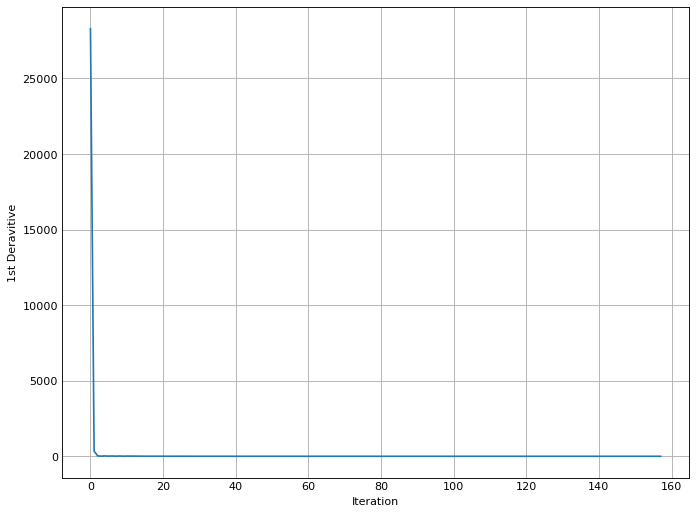

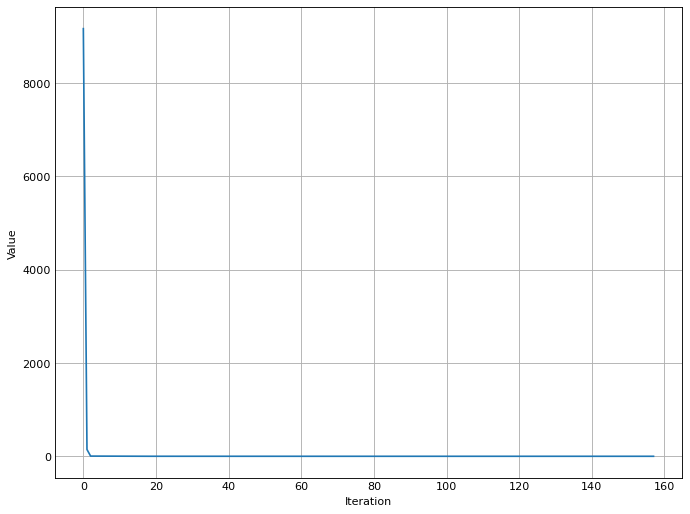

Soulution: 
[ 5.00076493e-01  5.25662110e-06 -5.23600753e-01]


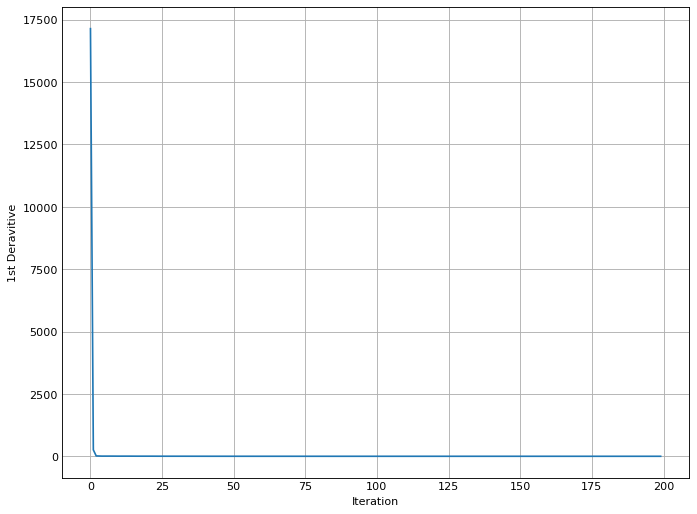

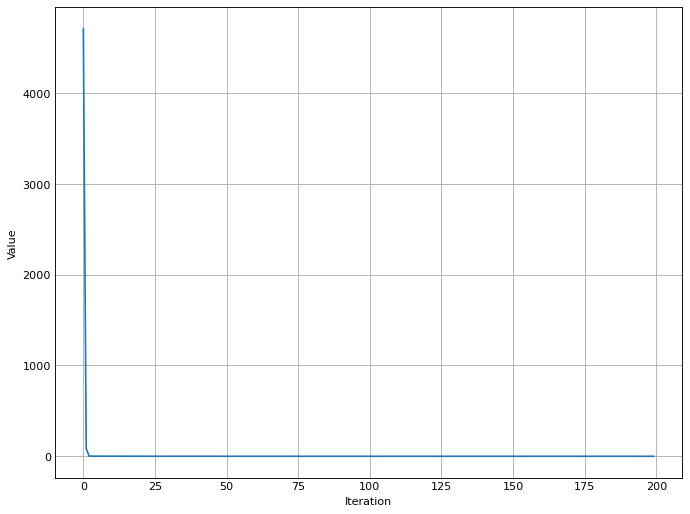

Soulution: 
[ 5.00081301e-01  5.70796576e-06 -5.23601585e-01]


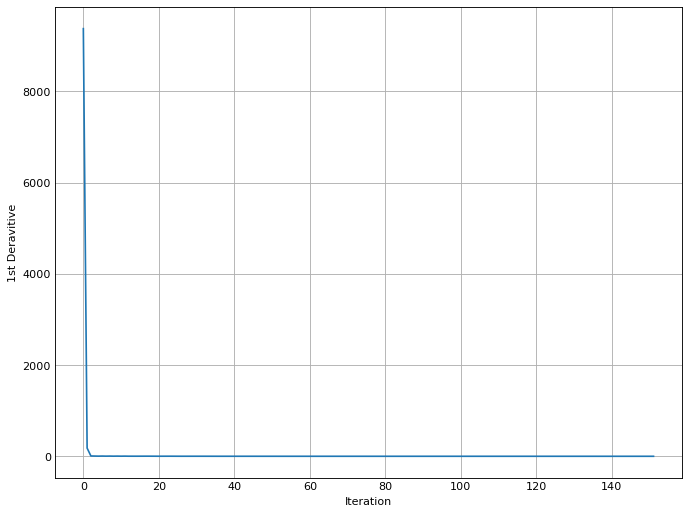

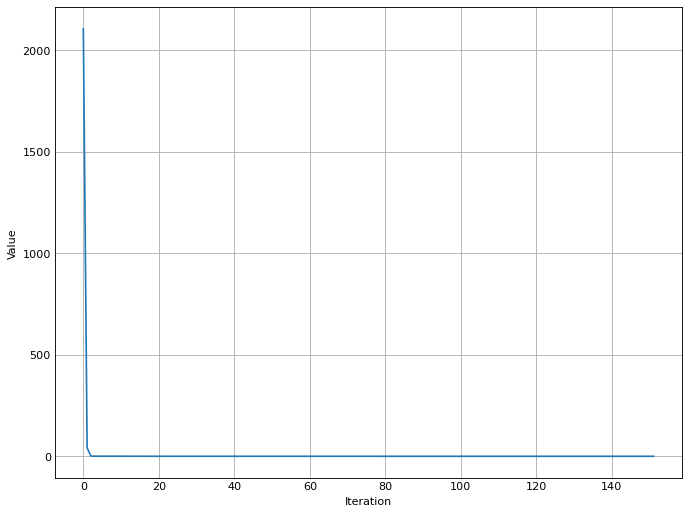

Soulution: 
[ 4.99925874e-01 -5.04031184e-06 -5.23597170e-01]


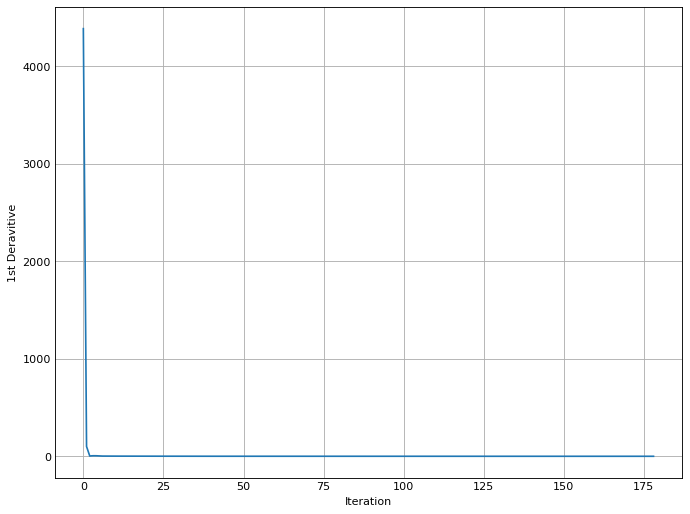

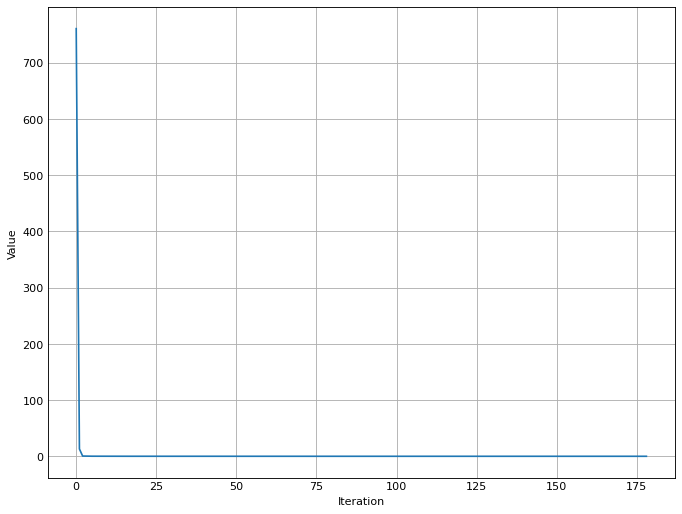

Soulution: 
[ 0.49823361 -0.19961156 -0.52883129]


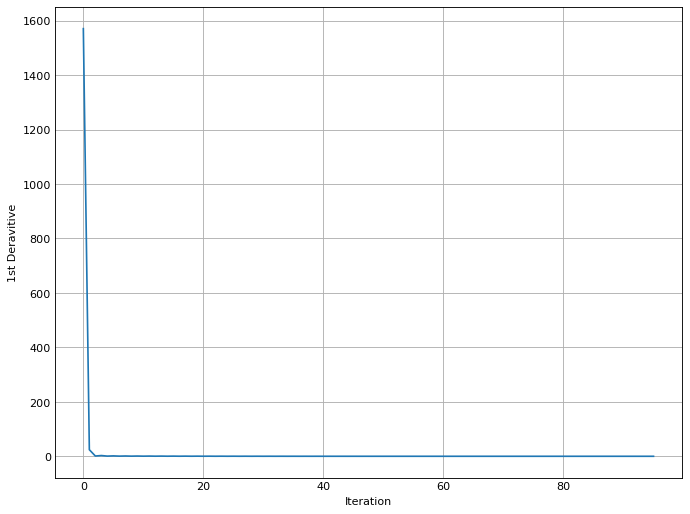

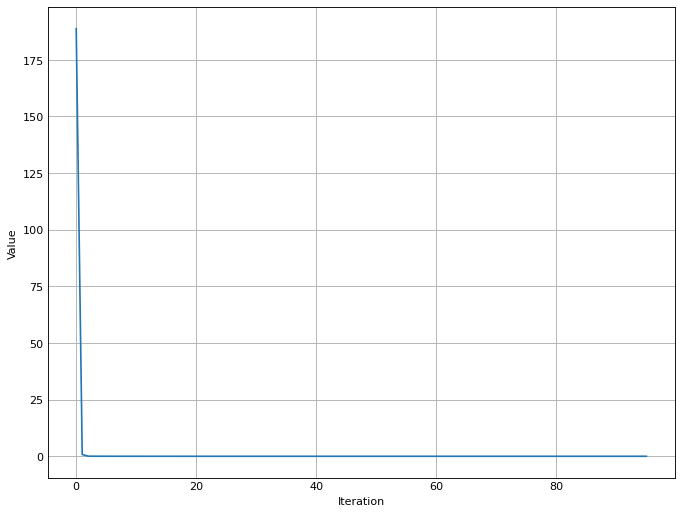

Soulution: 
[ 4.99915724e-01 -4.88957682e-06 -5.23601878e-01]


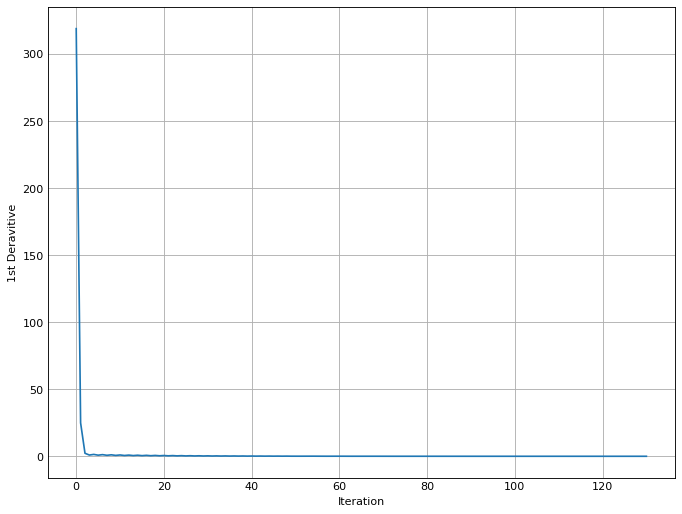

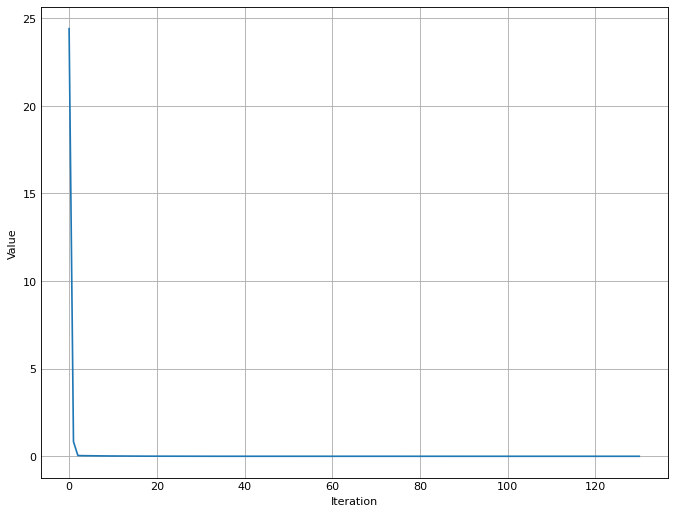

Soulution: 
[ 4.99924856e-01 -4.51019928e-06 -5.23600660e-01]


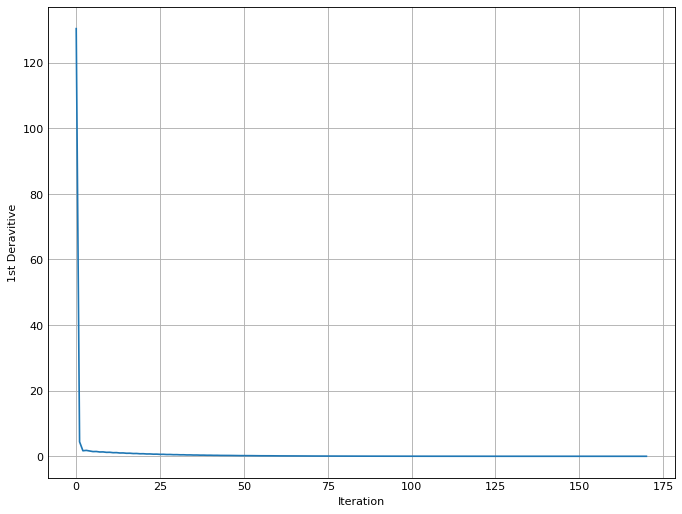

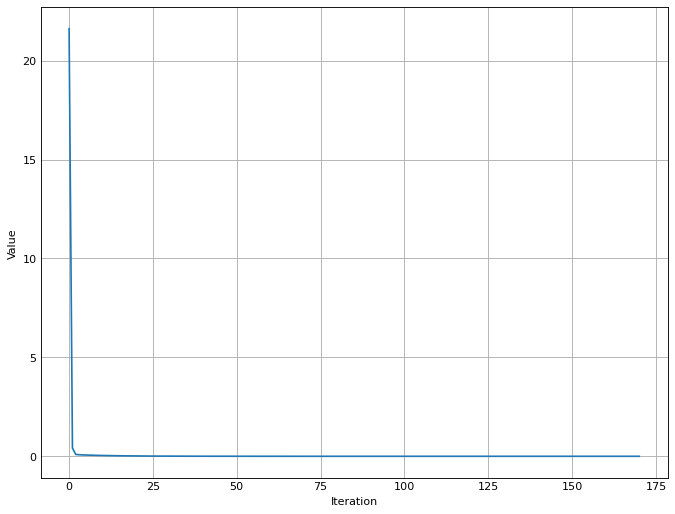

Soulution: 
[ 4.99916001e-01 -5.83289413e-06 -5.23596245e-01]


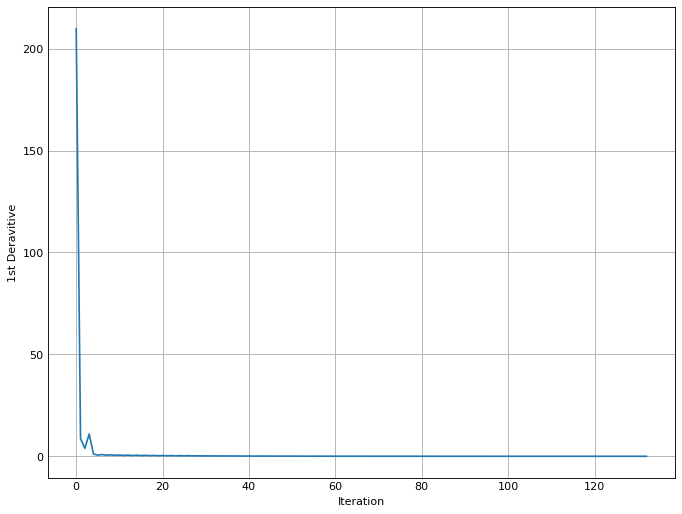

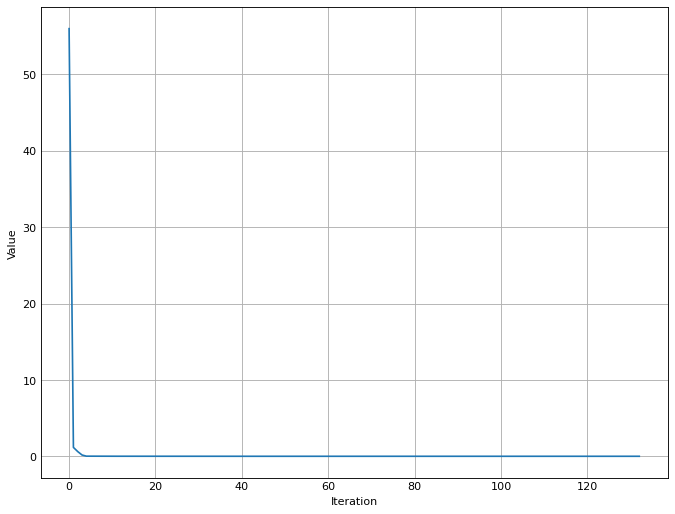

Soulution: 
[ 4.99918113e-01 -5.77923805e-06 -5.23595763e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


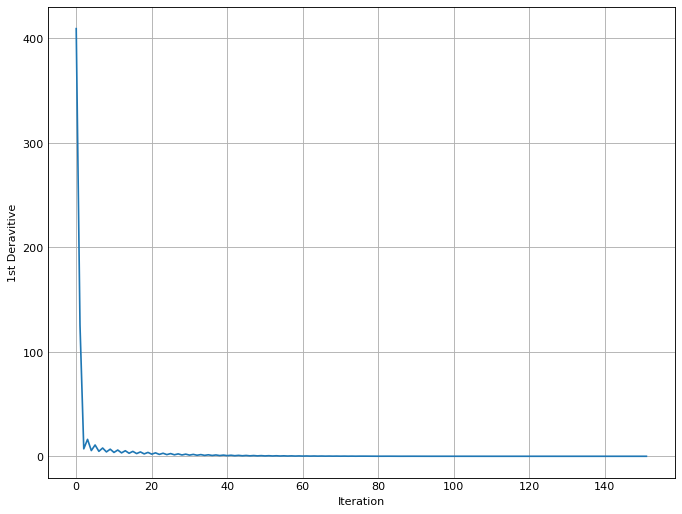

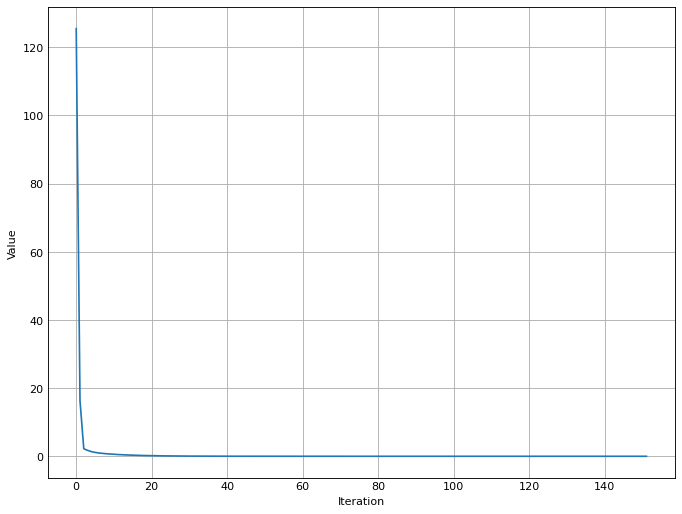

Soulution: 
[ 0.49806423 -0.19960094 -0.52882825]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


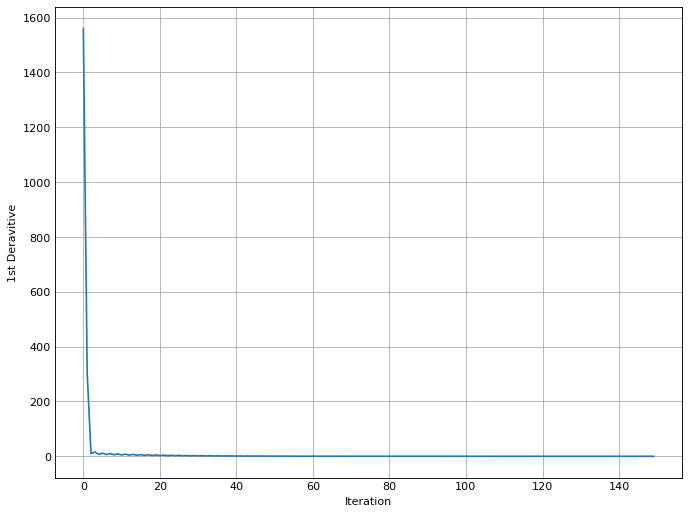

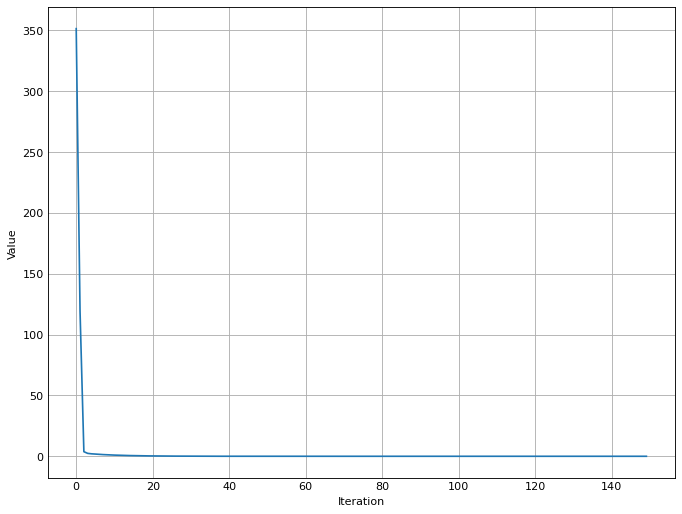

Soulution: 
[ 4.99924718e-01 -4.52073631e-06 -5.23600651e-01]


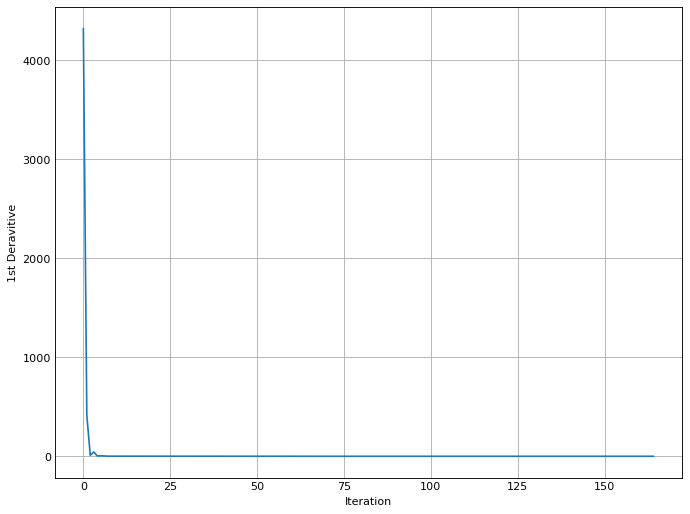

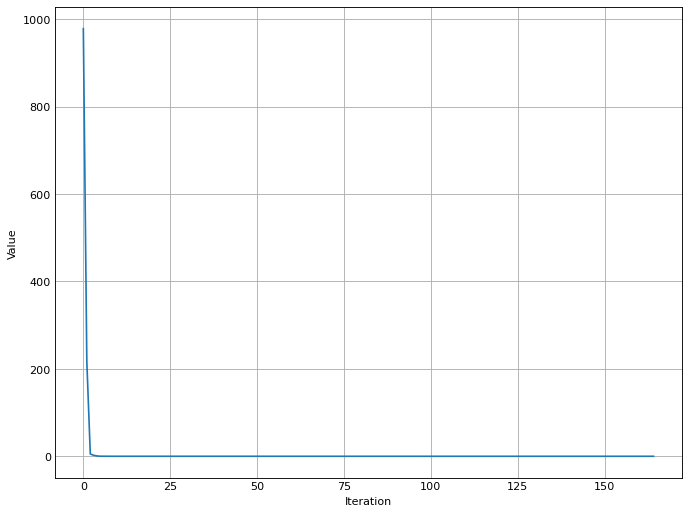

Soulution: 
[ 4.99922113e-01 -5.35542716e-06 -5.23596740e-01]


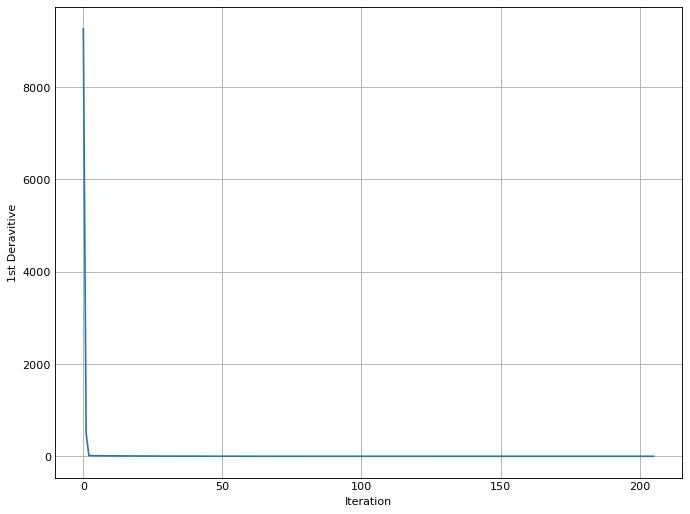

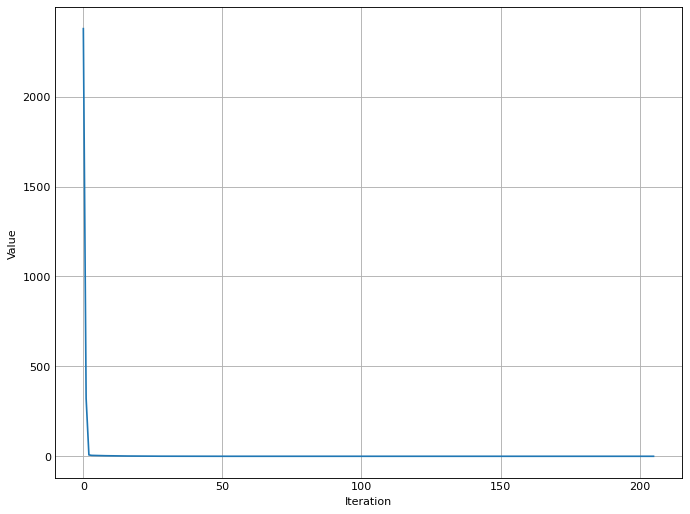

Soulution: 
[ 4.99920242e-01 -4.76309513e-06 -5.23600917e-01]


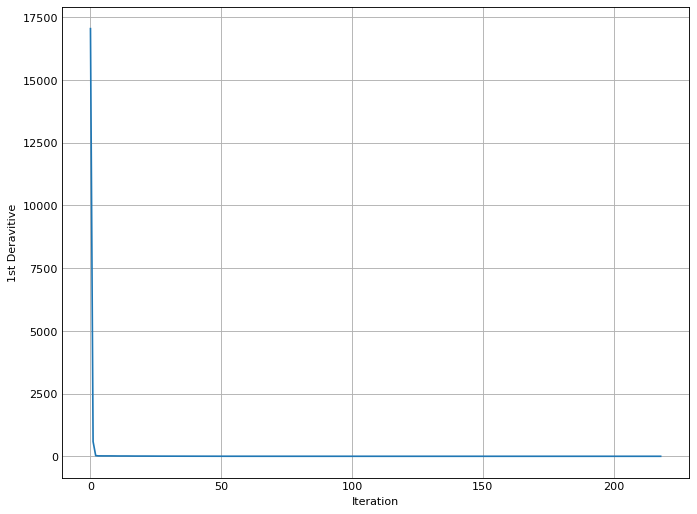

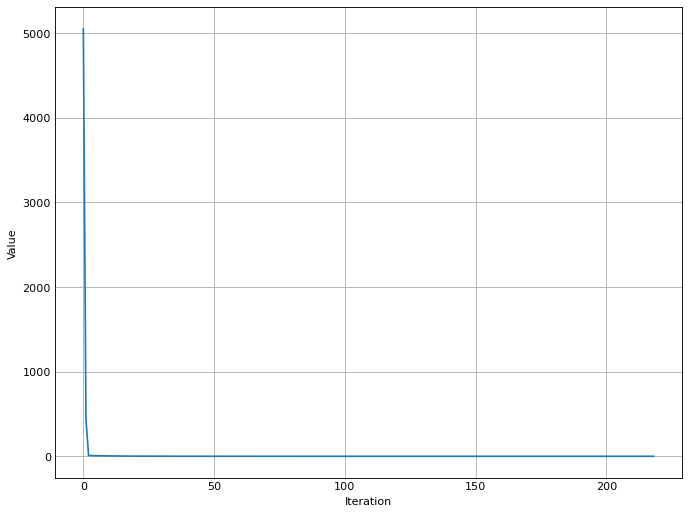

Soulution: 
[ 4.99923143e-01 -4.56951463e-06 -5.23600958e-01]


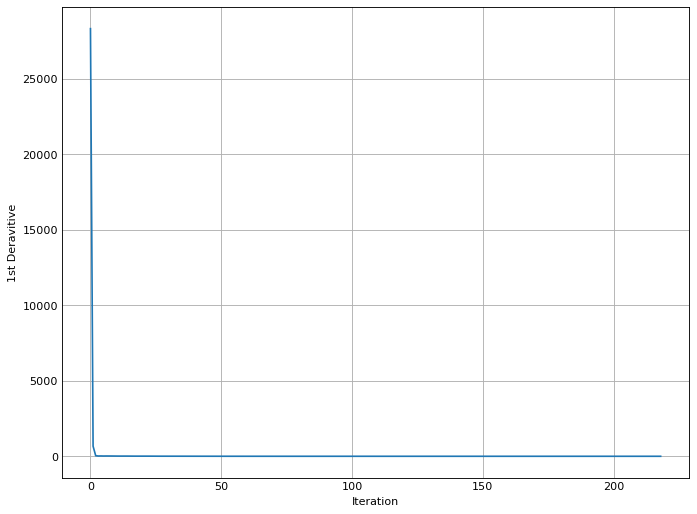

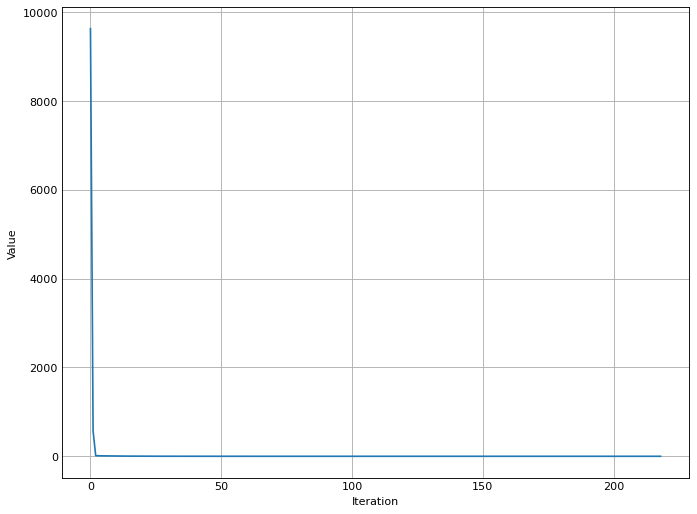

Soulution: 
[ 0.49806852 -0.19960122 -0.52882896]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


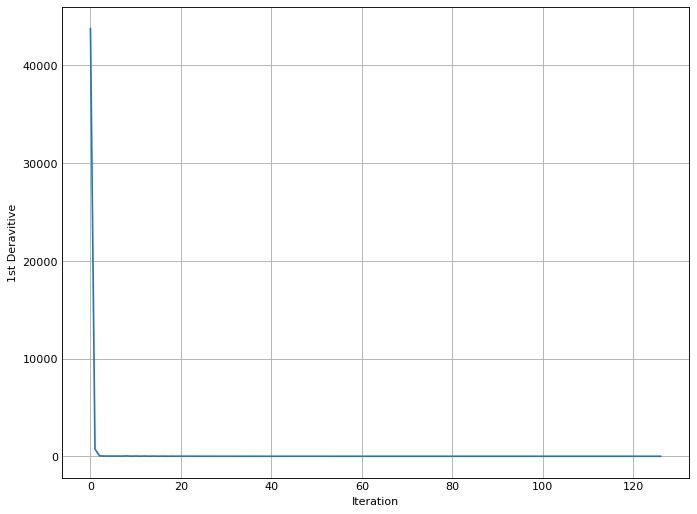

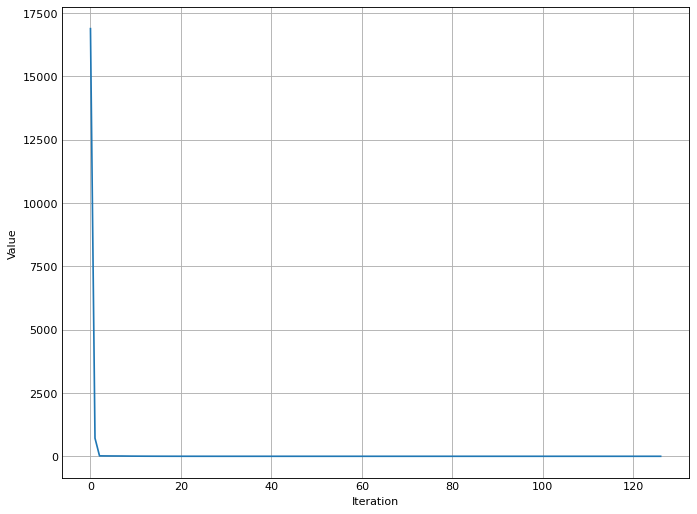

Soulution: 
[ 4.99920653e-01 -5.48885765e-06 -5.23596508e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


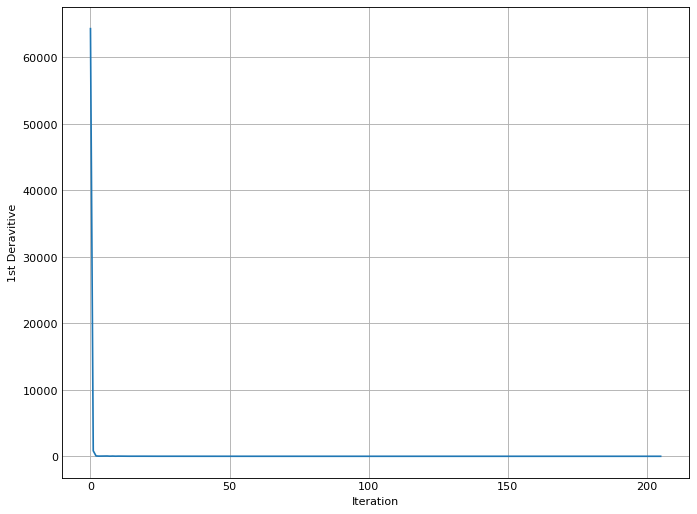

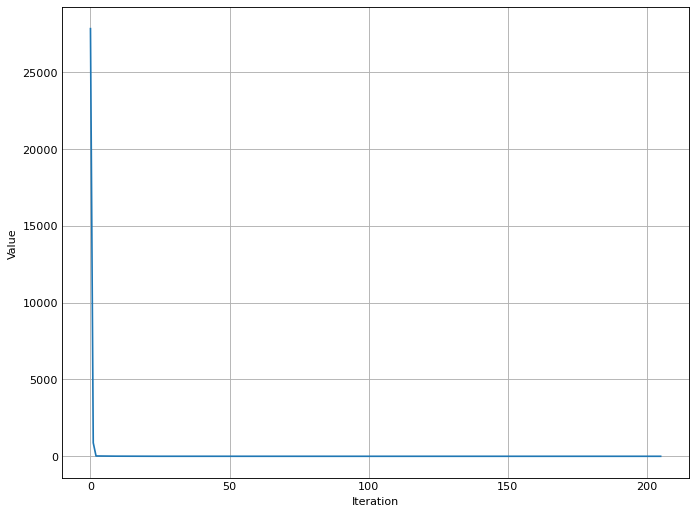

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


Soulution: 
[ 0.49806769 -0.19960103 -0.52882298]


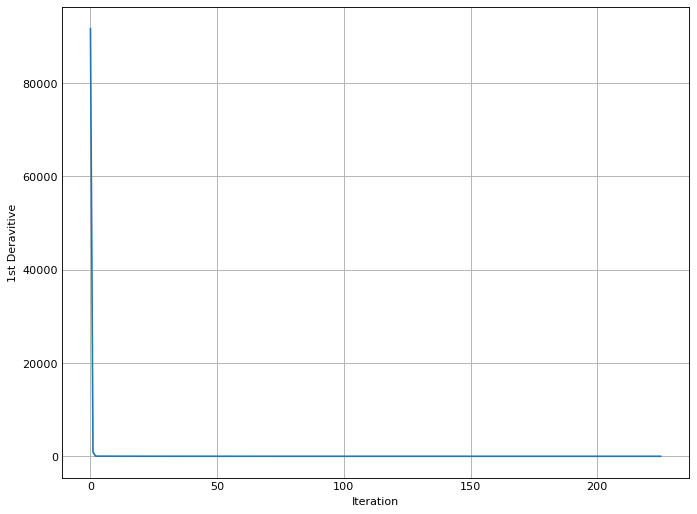

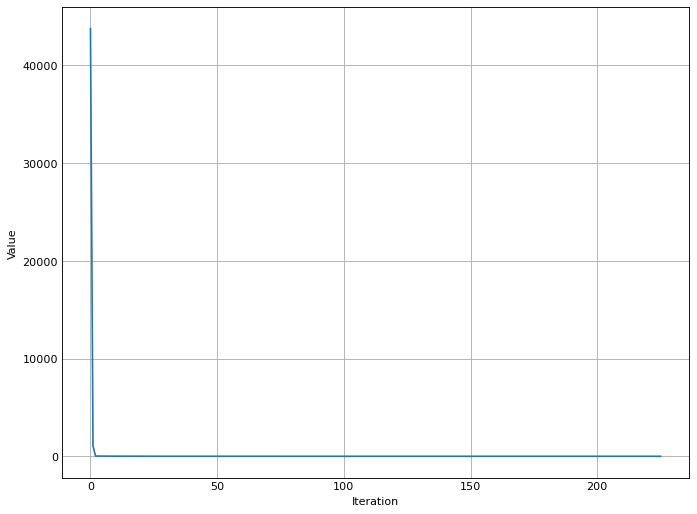

Soulution: 
[ 0.49807003 -0.19960118 -0.52882296]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


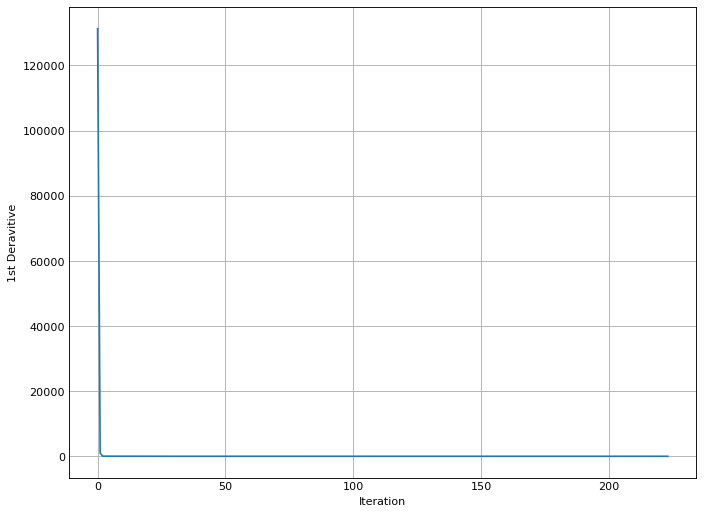

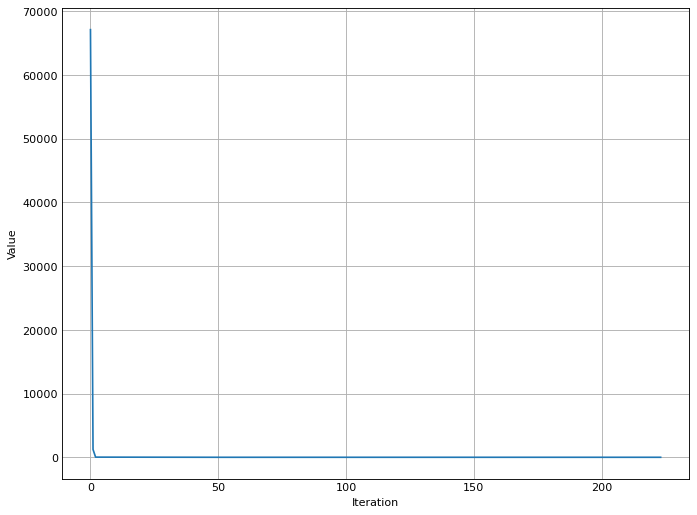

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


Soulution: 
[ 0.49806055 -0.1996007  -0.52882784]


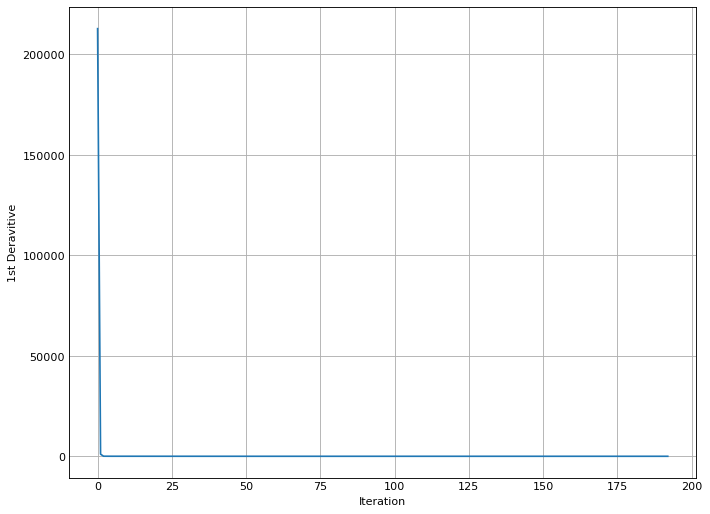

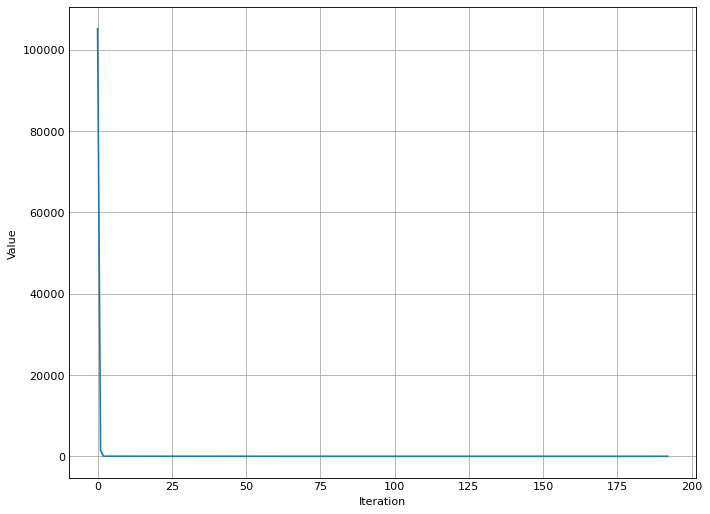

Soulution: 
[ 4.99915724e-01 -4.86540554e-06 -5.23602020e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


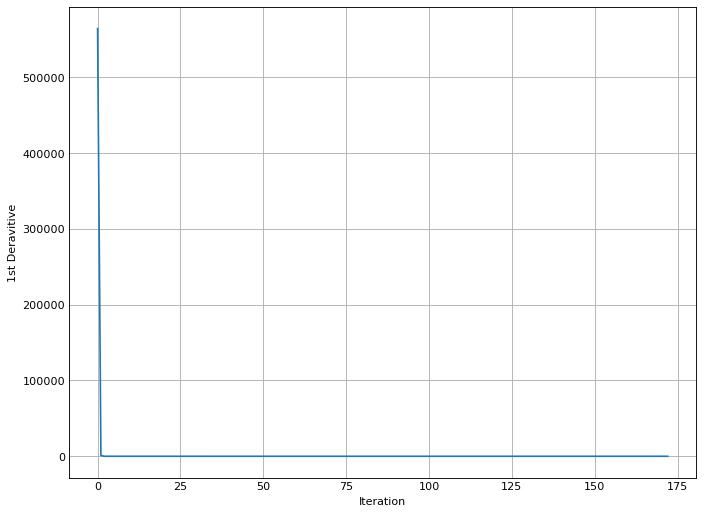

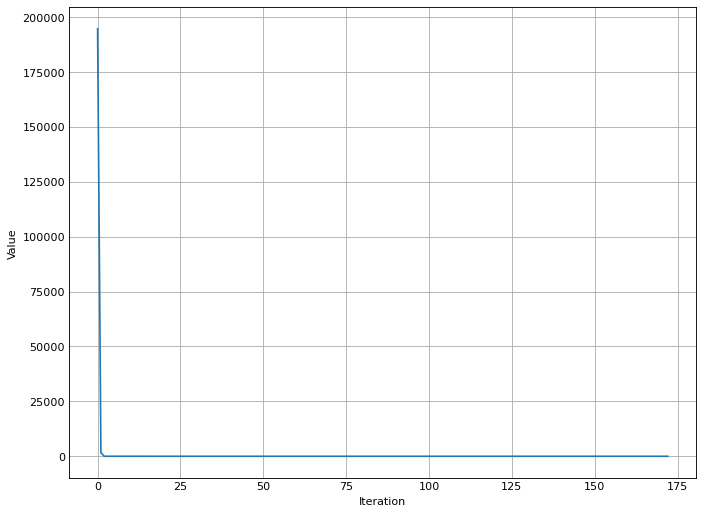

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


Soulution: 
[ 4.99913036e-01 -5.03288545e-06 -5.23602051e-01]


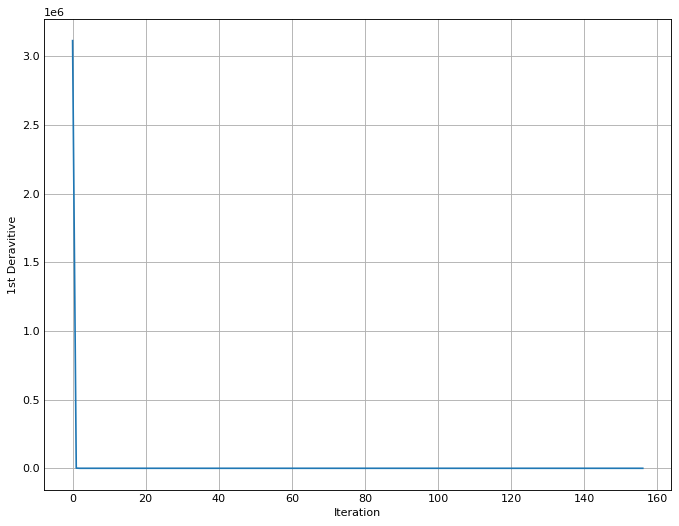

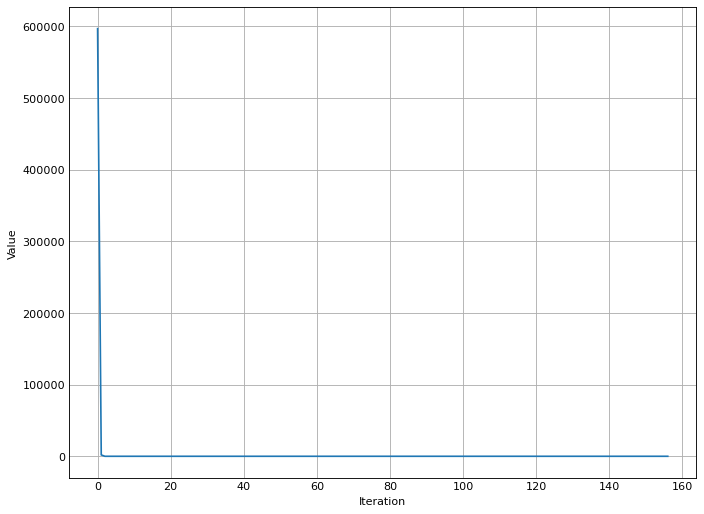

Soulution: 
[ 4.99927021e-01 -4.38701468e-06 -5.23600567e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


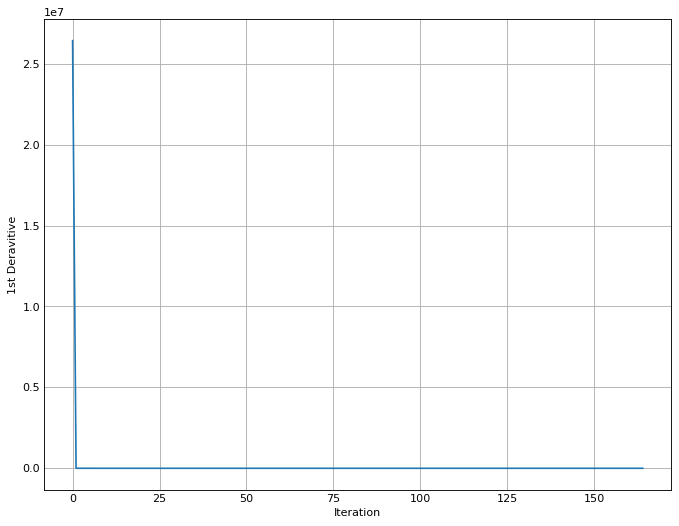

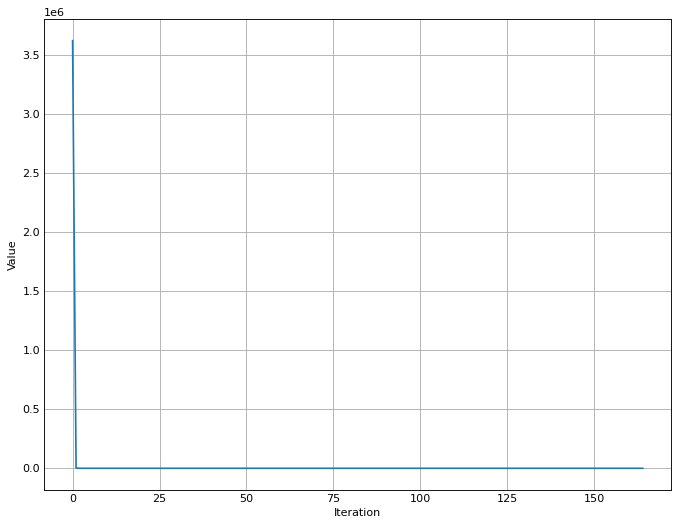

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


Soulution: 
[ 0.49806623 -0.19960104 -0.52882724]


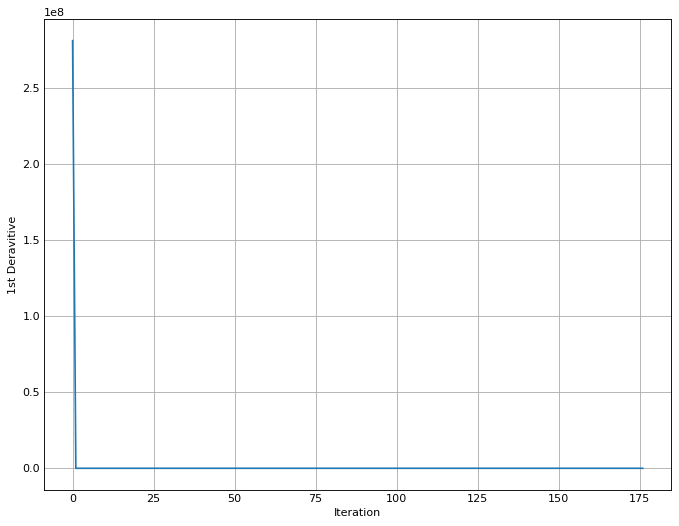

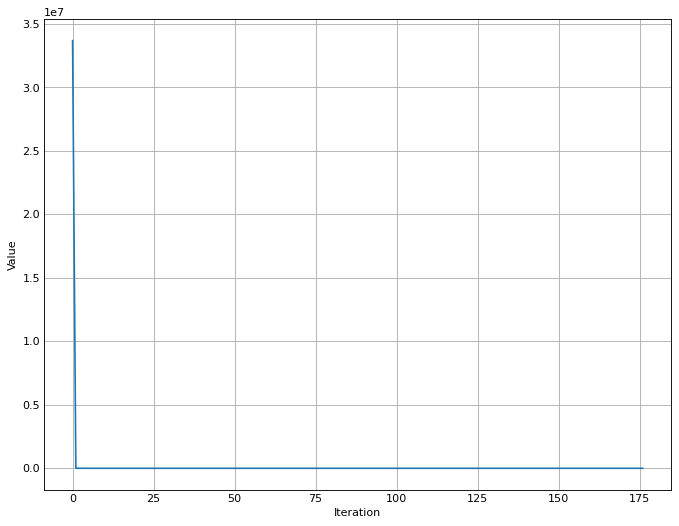

Soulution: 
[ 0.49807034 -0.1996012  -0.52882296]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


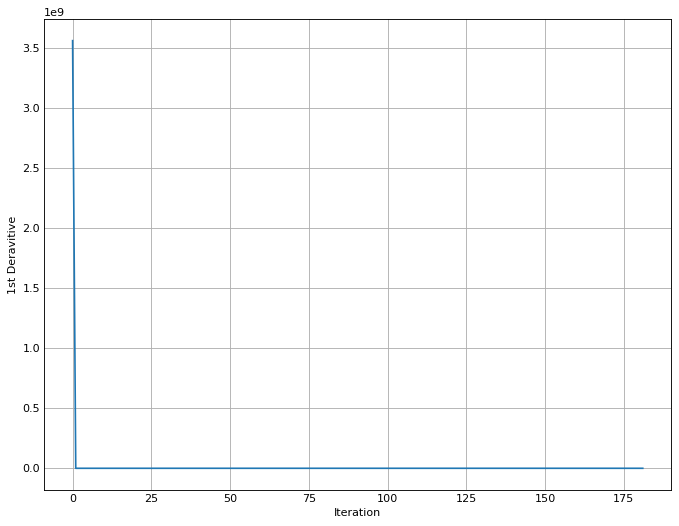

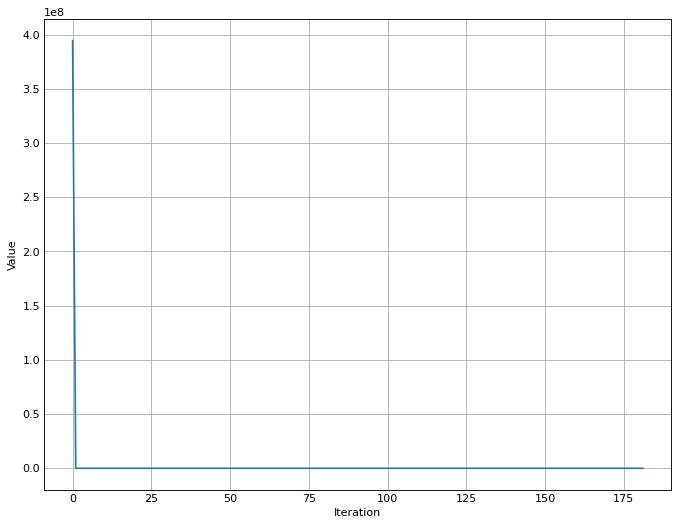

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


Soulution: 
[ 0.49806886 -0.1996011  -0.52882274]


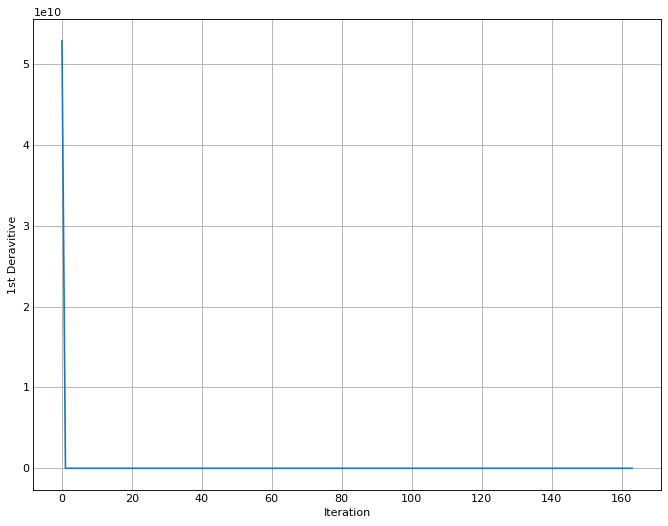

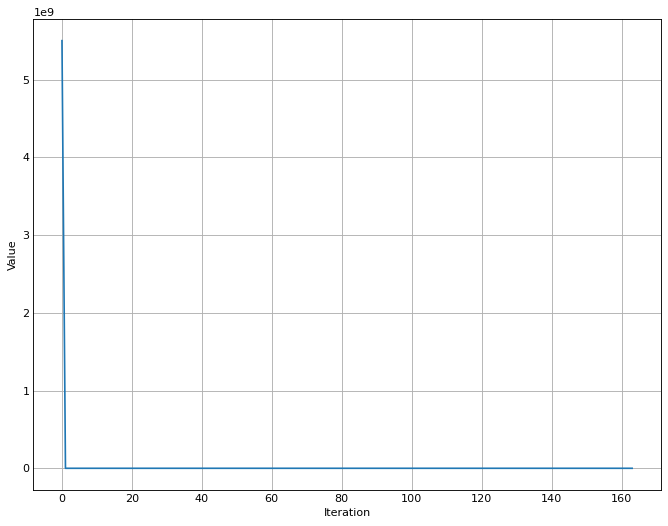

Soulution: 
[ 4.99925041e-01 -5.08910755e-06 -5.23597198e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


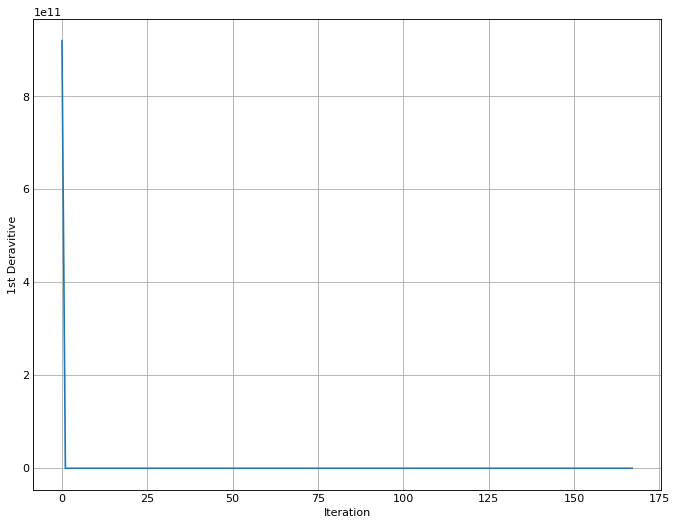

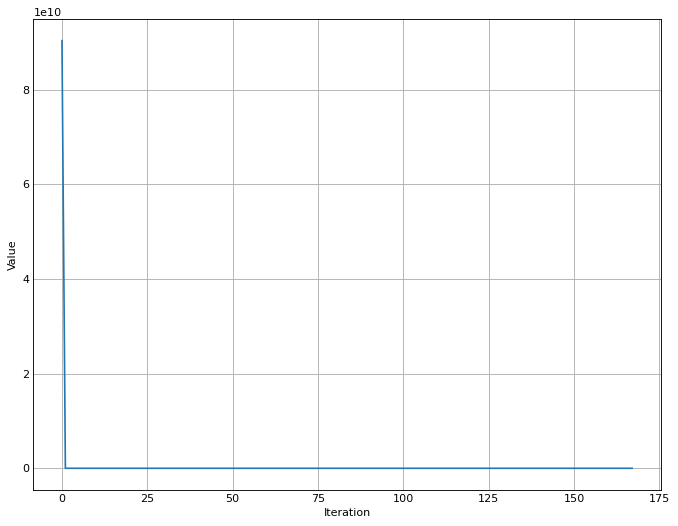

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


Soulution: 
[ 0.49806494 -0.19960083 -0.52882164]


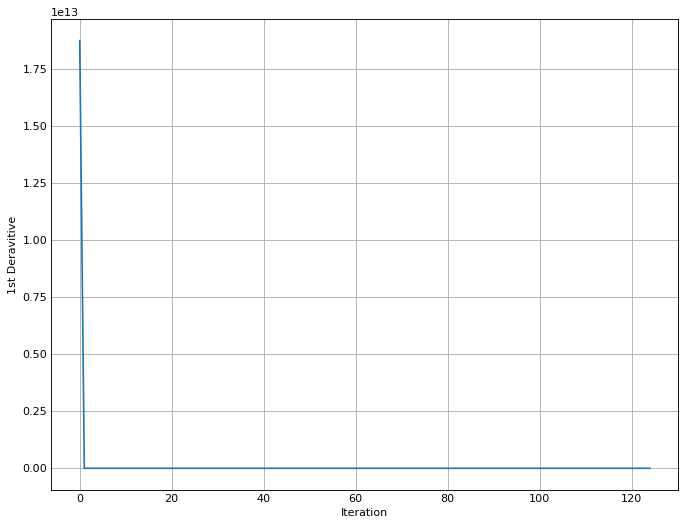

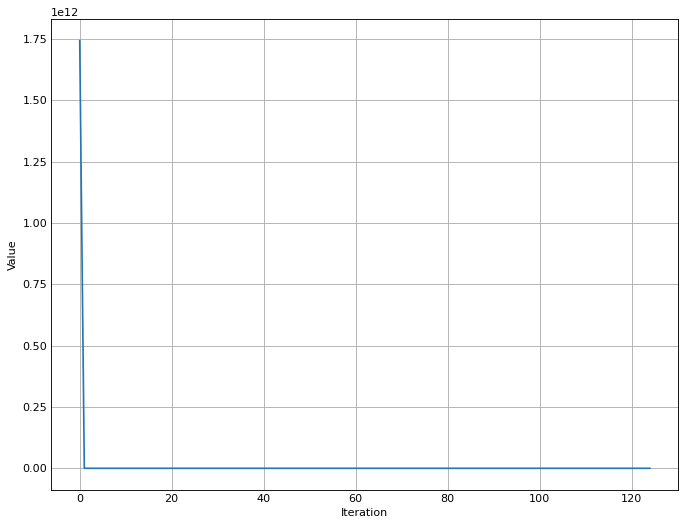

Soulution: 
[ 0.49805822 -0.1996004  -0.52882106]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


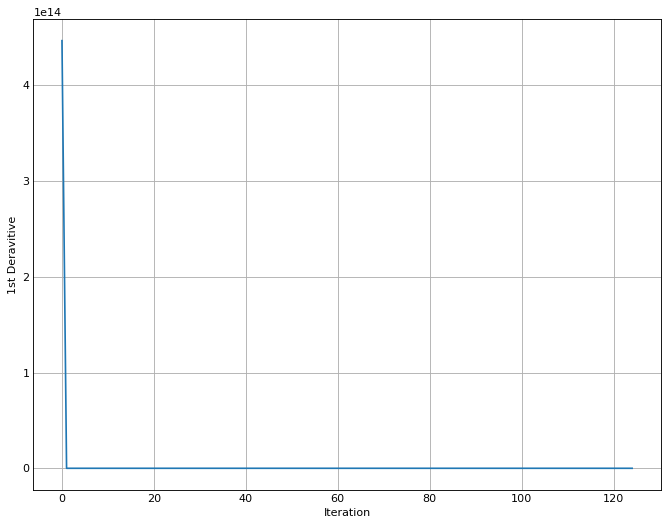

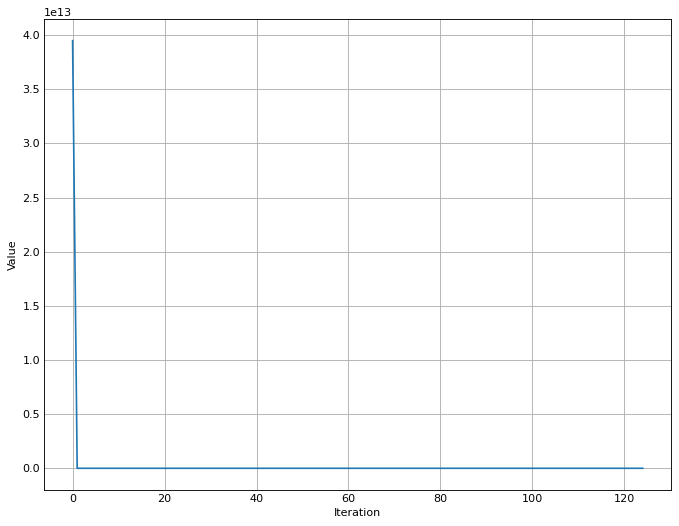

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


Soulution: 
[ 0.49806634 -0.19960092 -0.5288217 ]


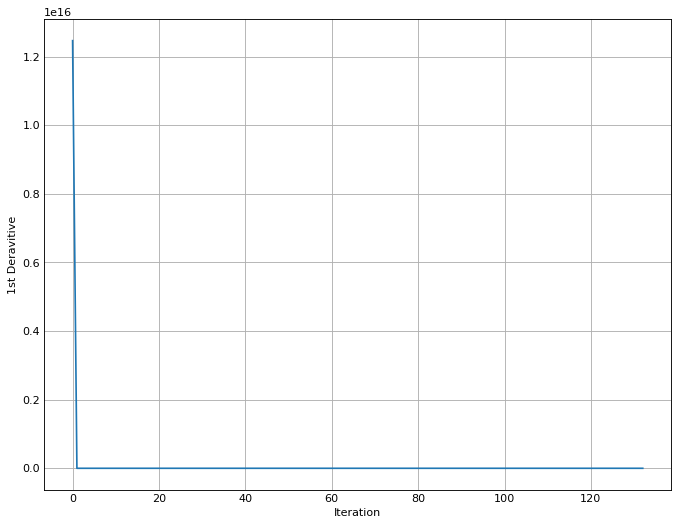

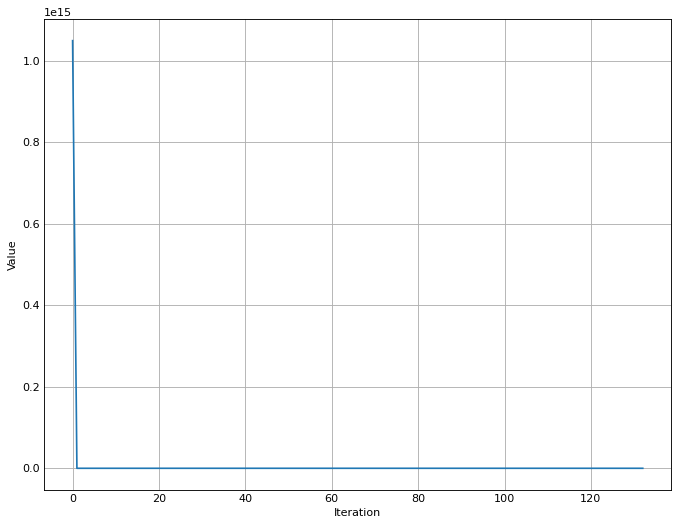

Soulution: 
[ 0.49805716 -0.19960034 -0.52882144]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


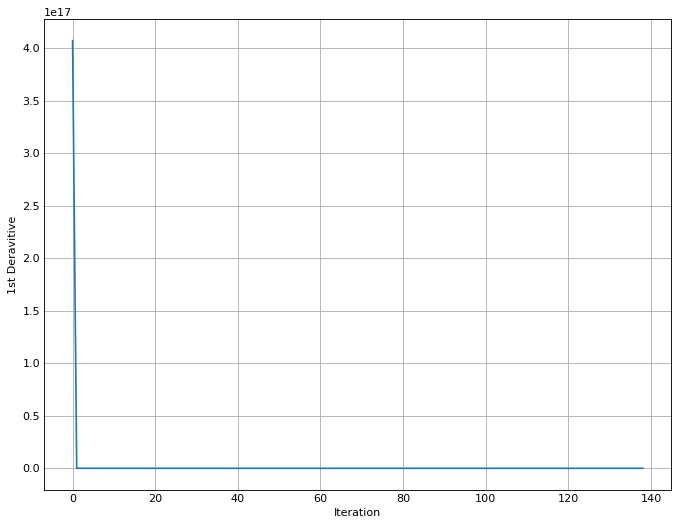

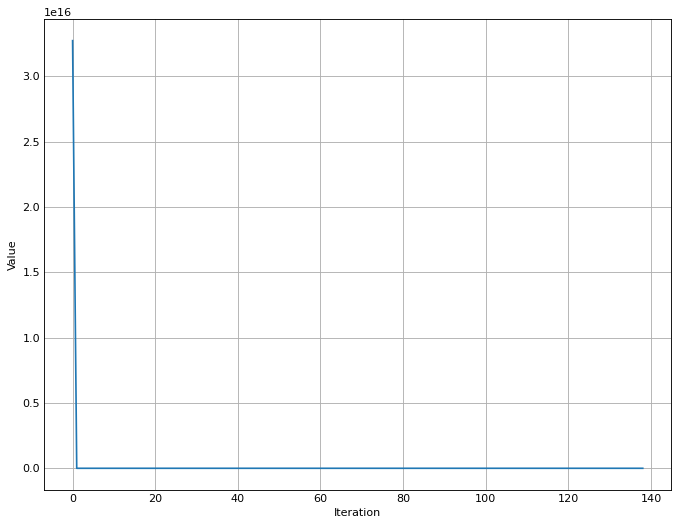

Soulution: 
[ 0.49805866 -0.19960044 -0.52882162]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


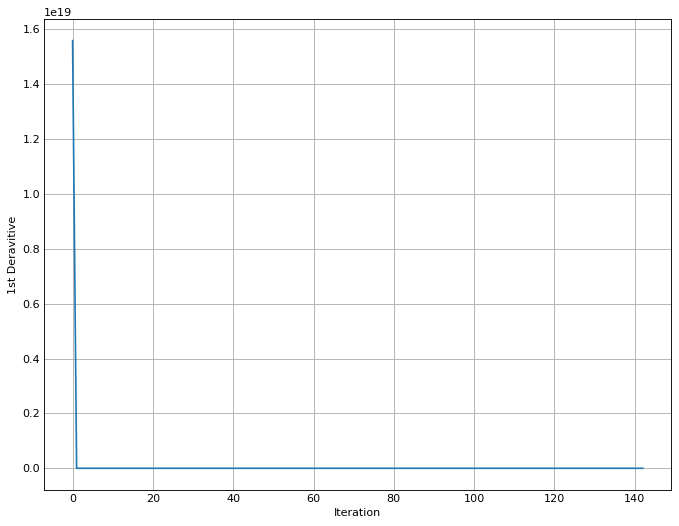

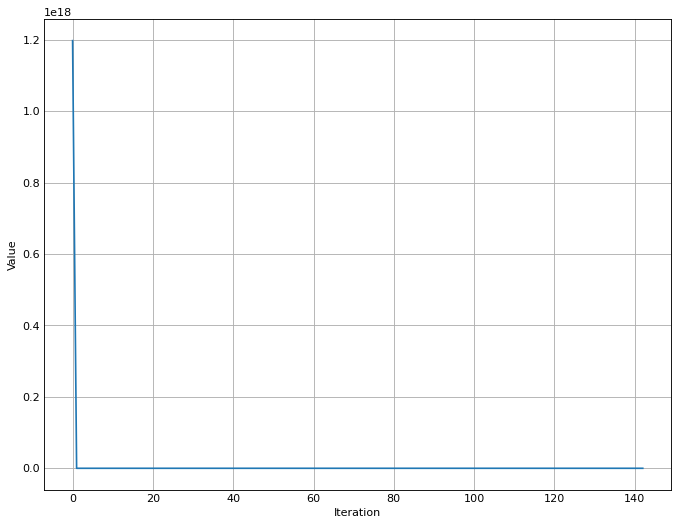

Soulution: 
[ 0.49806352 -0.19960074 -0.52882184]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


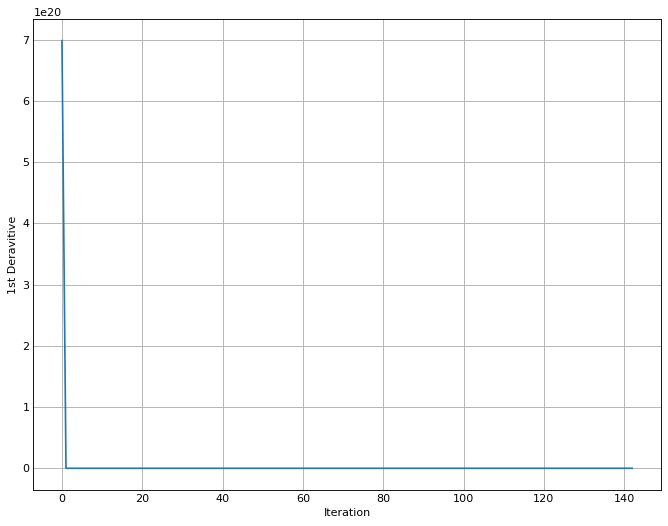

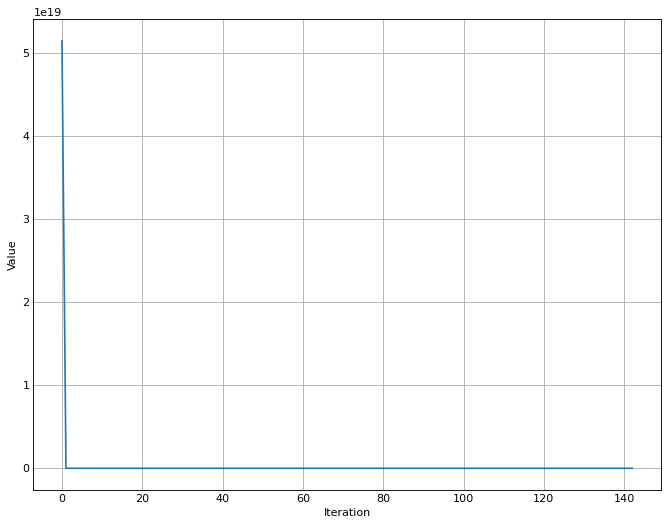

Soulution: 
[ 0.49806075 -0.19960057 -0.52882154]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


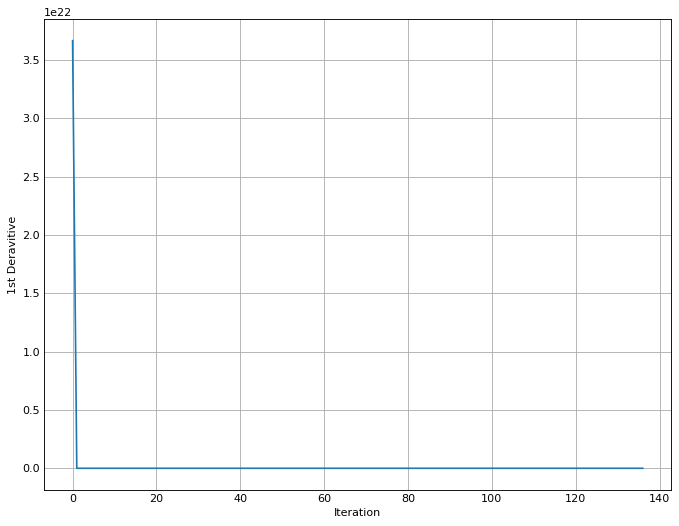

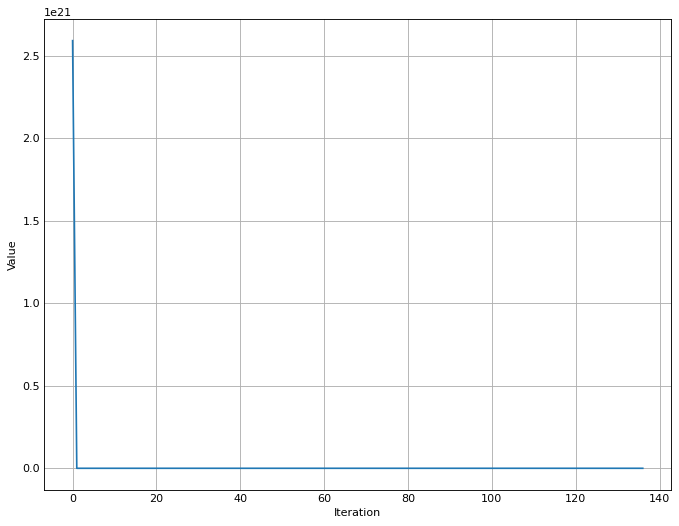

Soulution: 
[ 0.49806025 -0.19960053 -0.52882128]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


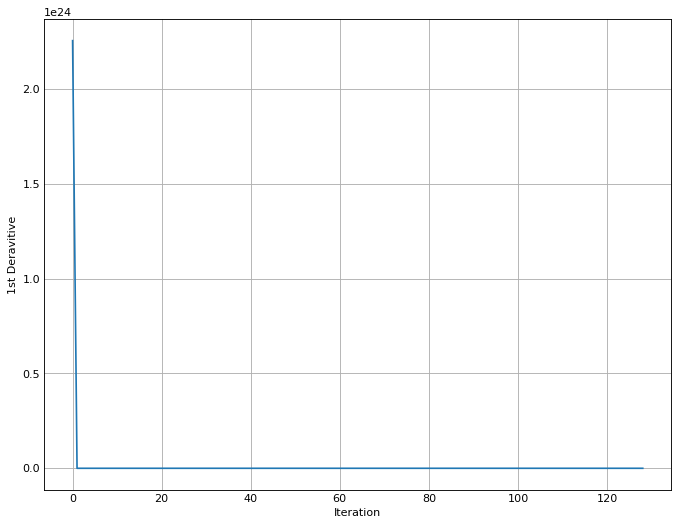

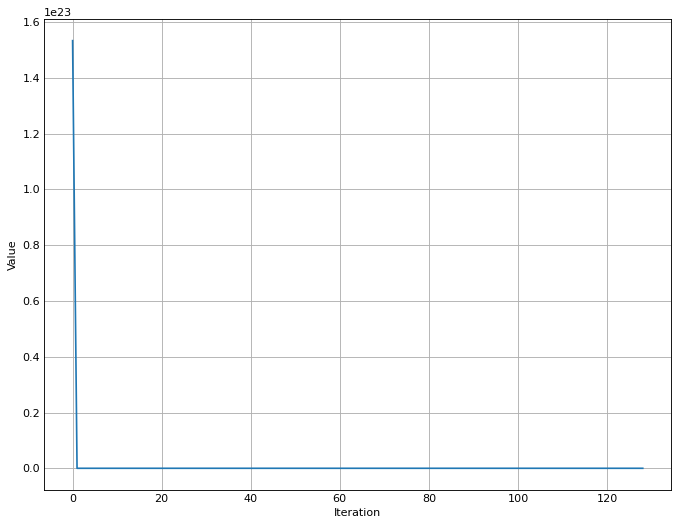

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


Soulution: 
[ 0.49806265 -0.19960068 -0.52882124]


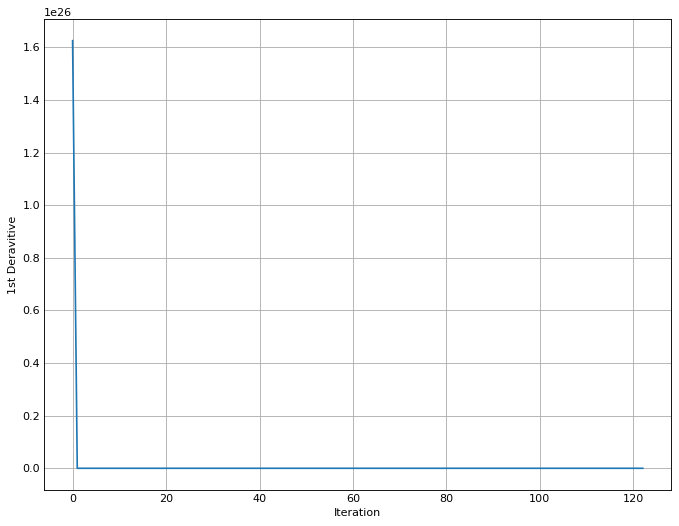

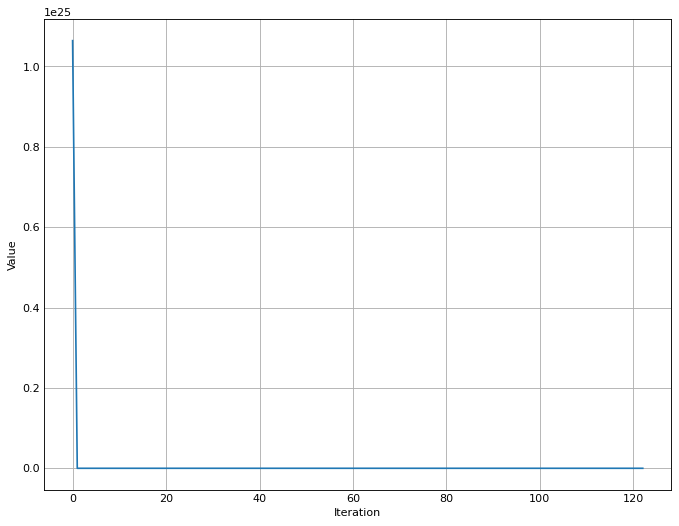

Soulution: 
[ 4.99920953e-01 -4.61866698e-06 -5.23601496e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


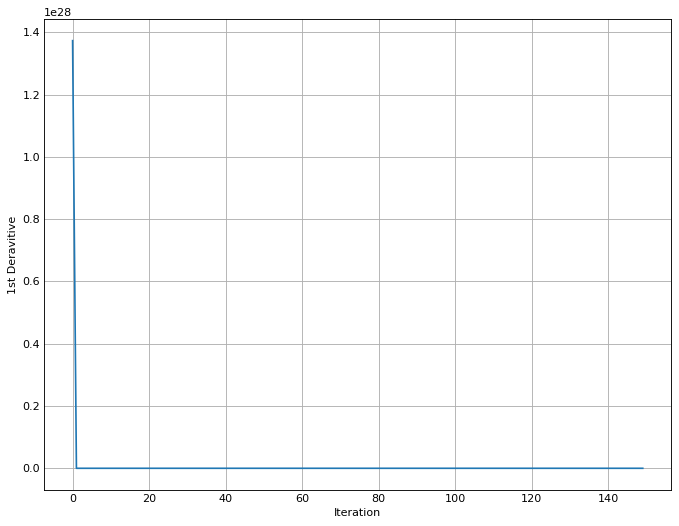

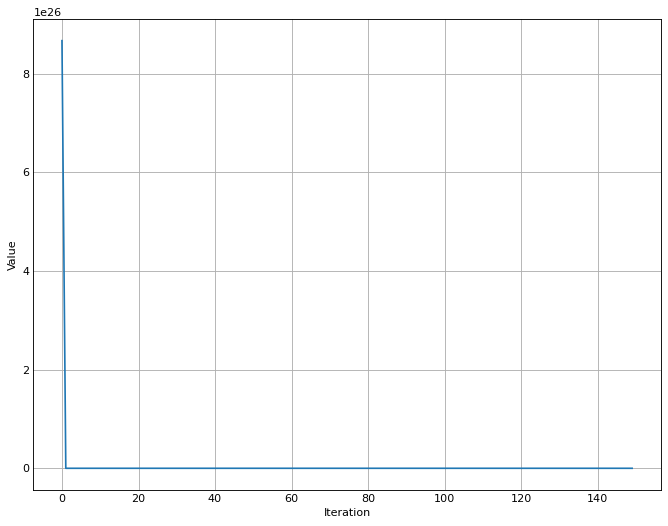

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


Soulution: 
[ 4.99926082e-01 -4.46330766e-06 -5.23600473e-01]


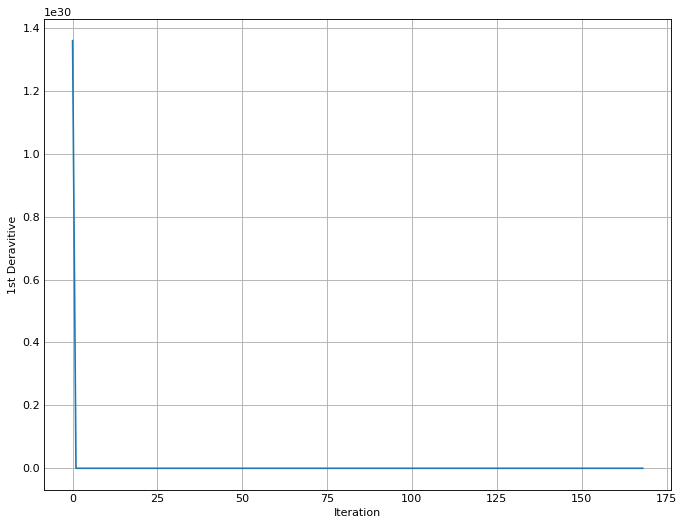

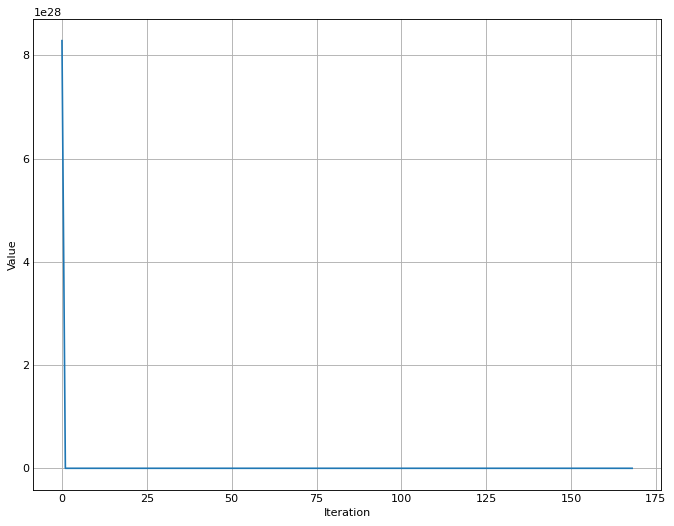

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


Soulution: 
[ 0.49806849 -0.19960107 -0.5288227 ]


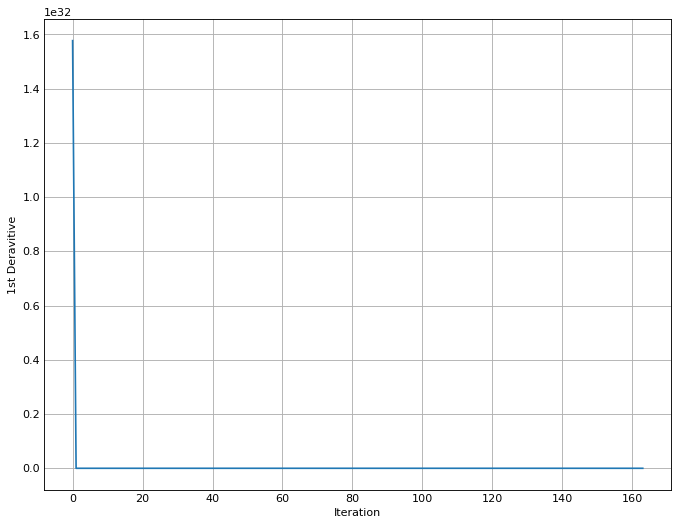

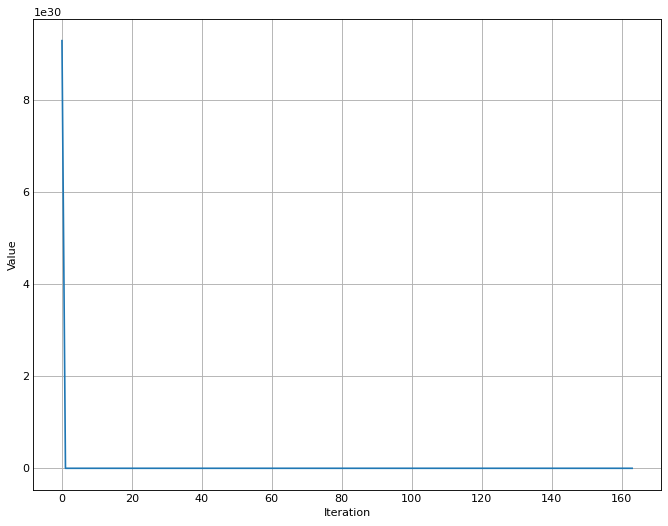

Soulution: 
[ 0.49806586 -0.19960091 -0.52882281]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


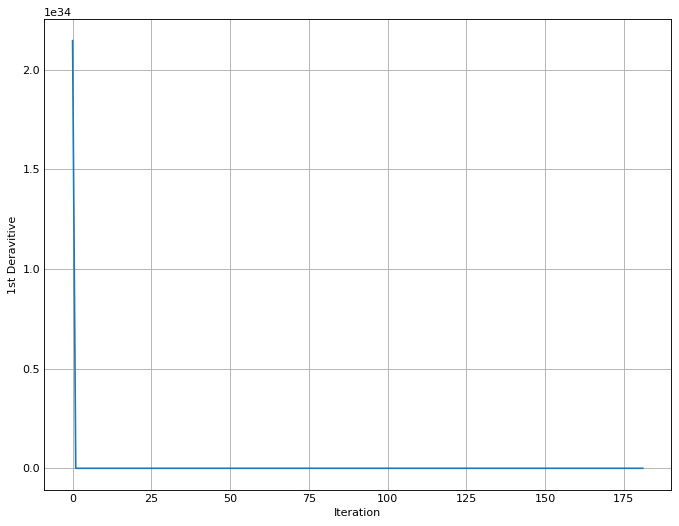

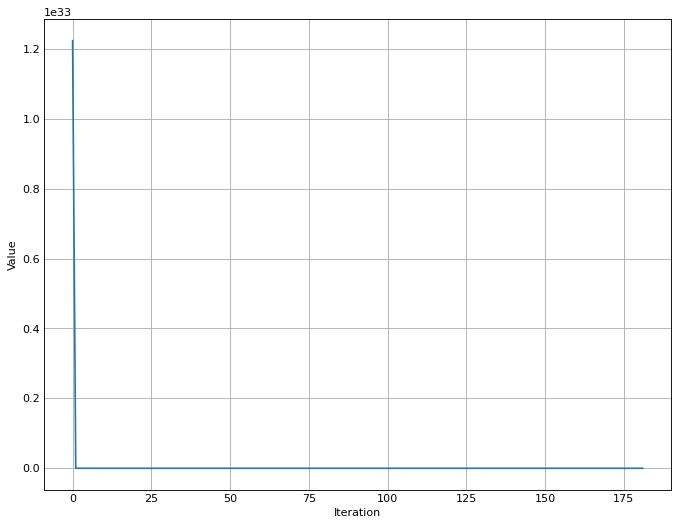

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


Soulution: 
[ 0.49806337 -0.19960086 -0.52882737]


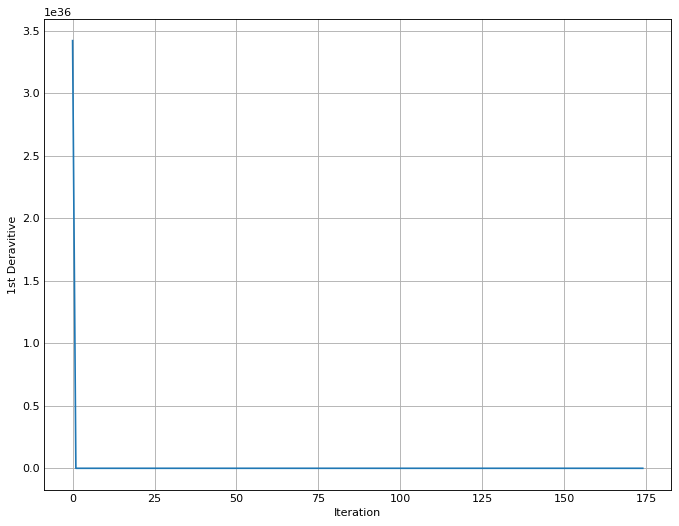

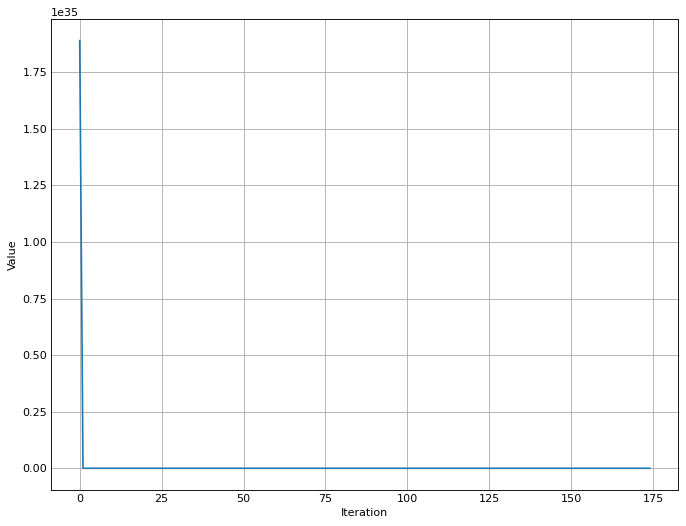

Soulution: 
[ 0.49805832 -0.19960057 -0.52882804]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


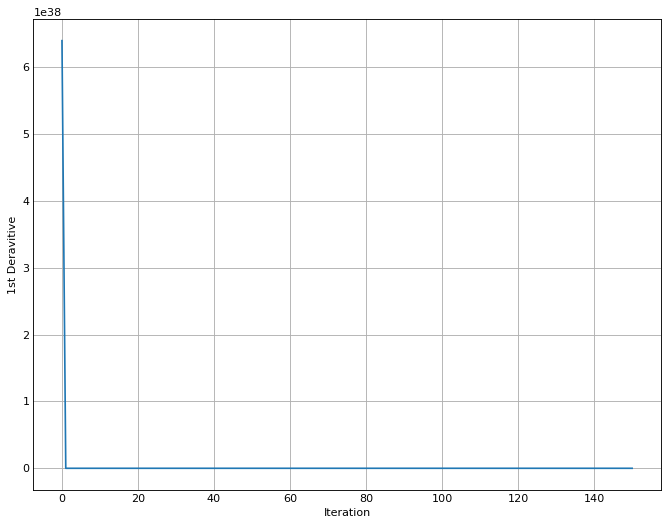

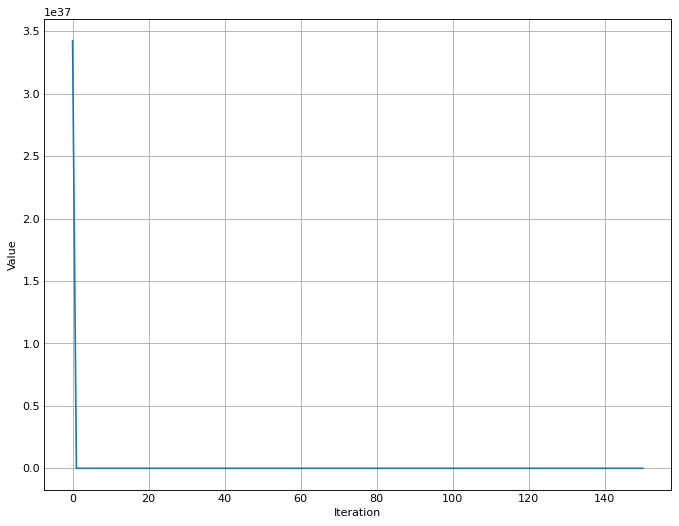

Soulution: 
[ 0.49806236 -0.19960081 -0.52882768]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


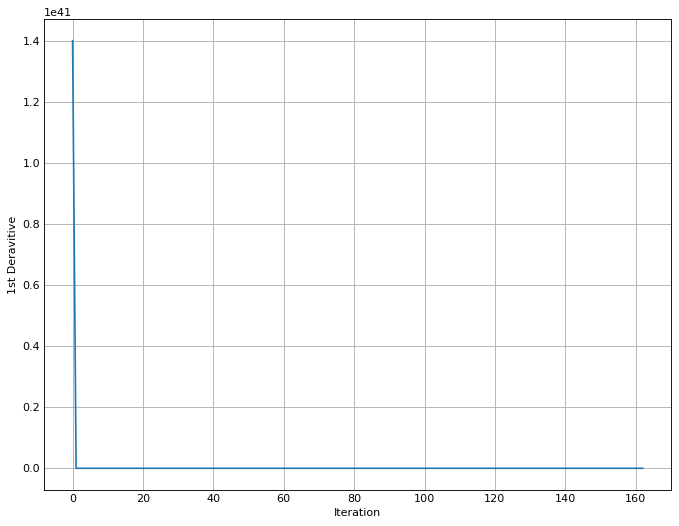

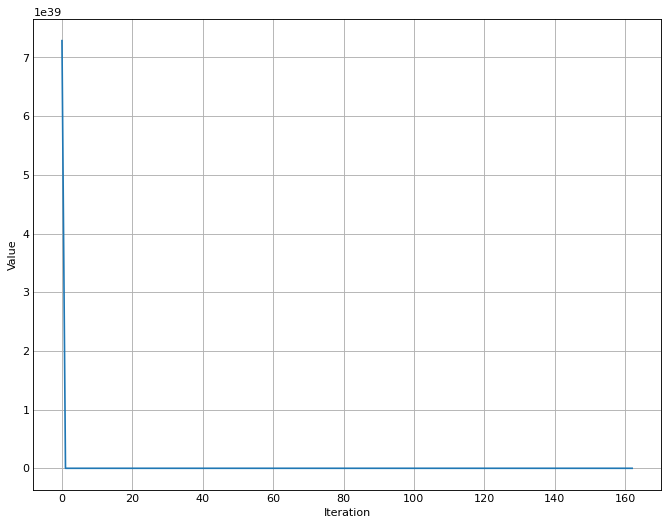

Soulution: 
[ 0.49806795 -0.19960115 -0.52882738]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


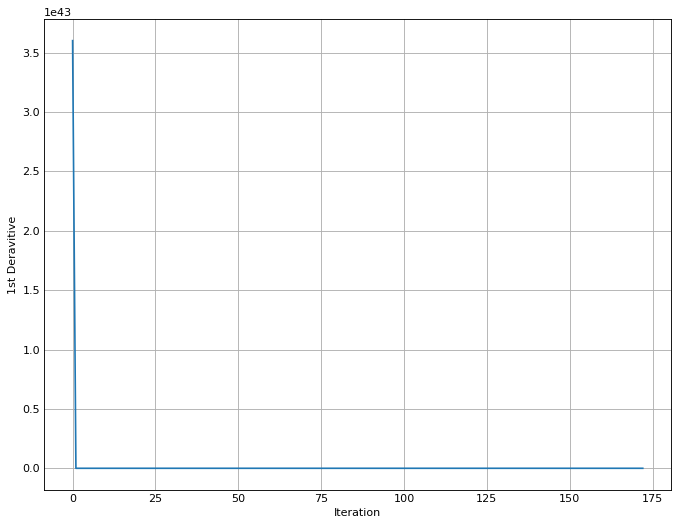

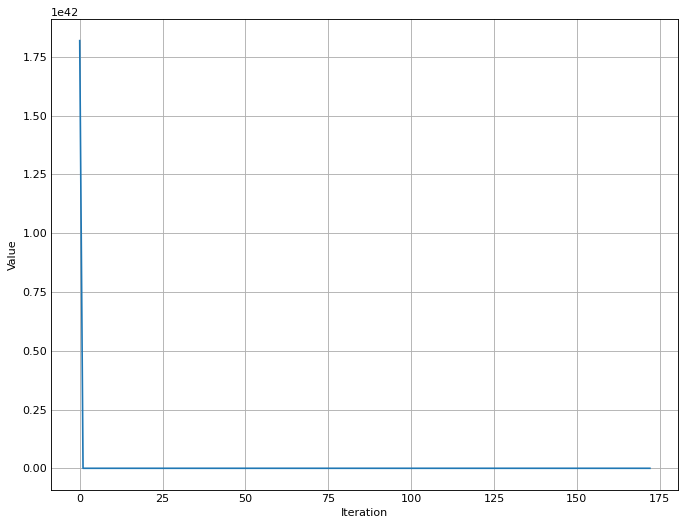

Soulution: 
[ 0.49806265 -0.19960082 -0.52882756]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


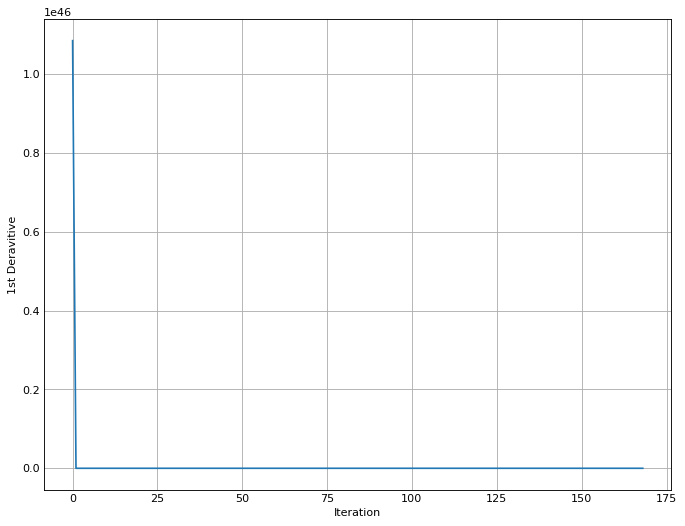

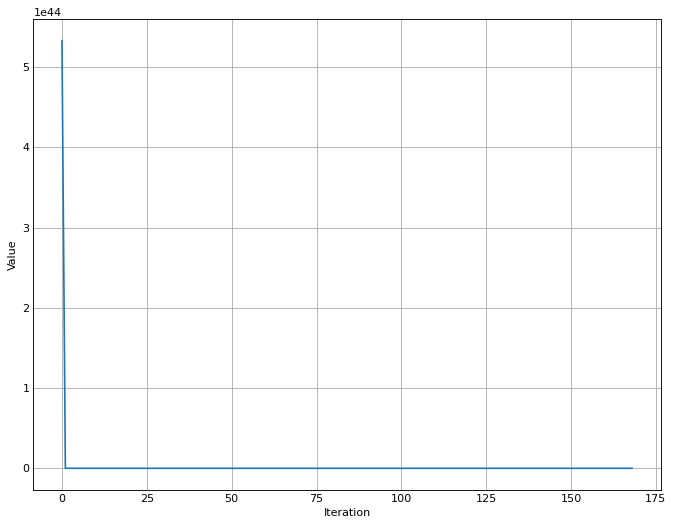

Soulution: 
[ 4.99920398e-01 -4.55936529e-06 -5.23602052e-01]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


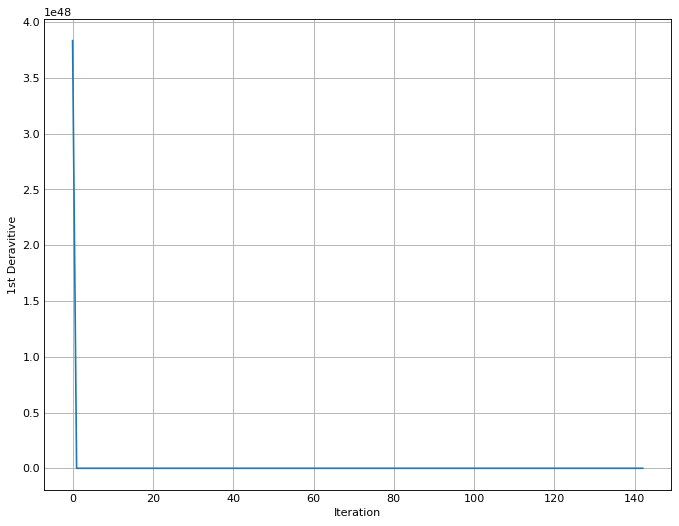

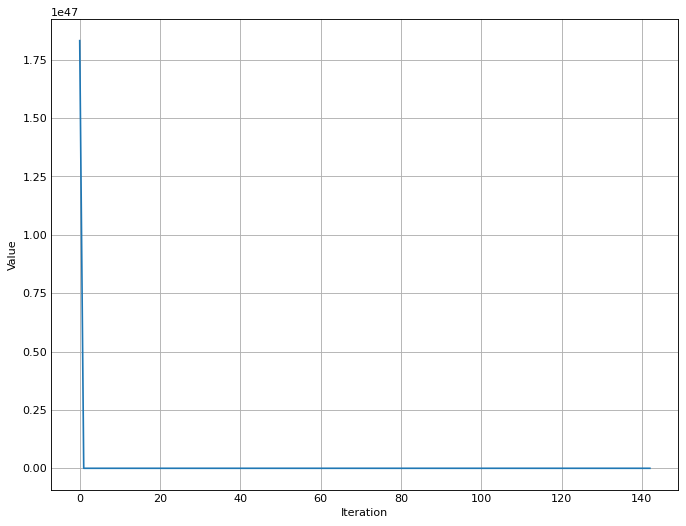

Soulution: 
[ 0.49806193 -0.19960079 -0.52882793]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


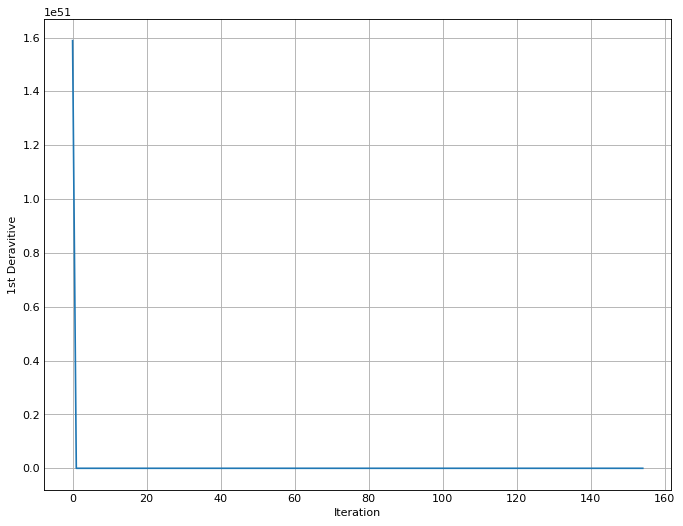

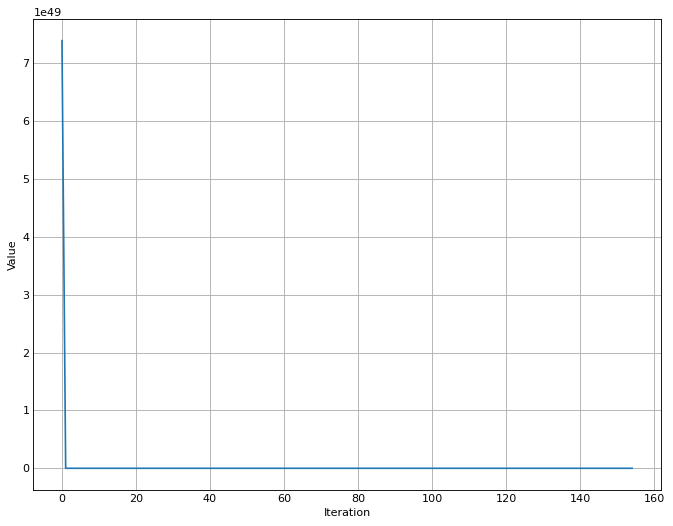

Soulution: 
[ 0.49805919 -0.19960062 -0.52882808]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


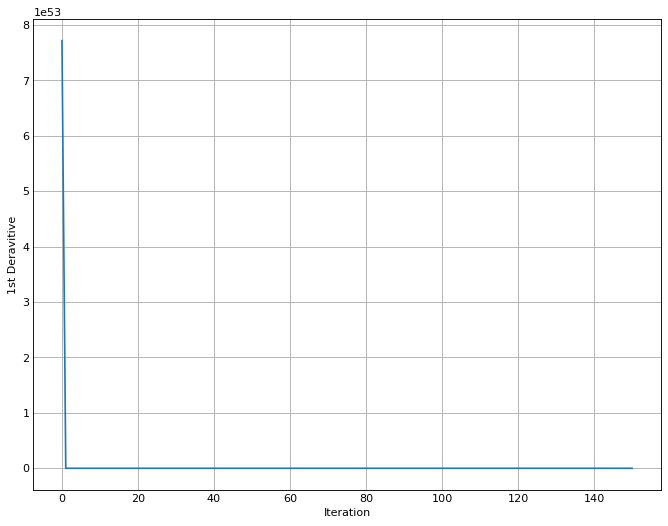

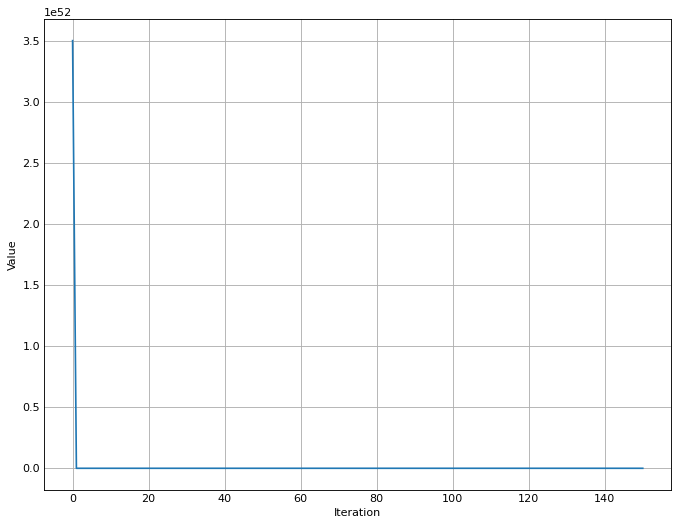

Soulution: 
[ 0.4980582  -0.19960056 -0.5288281 ]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


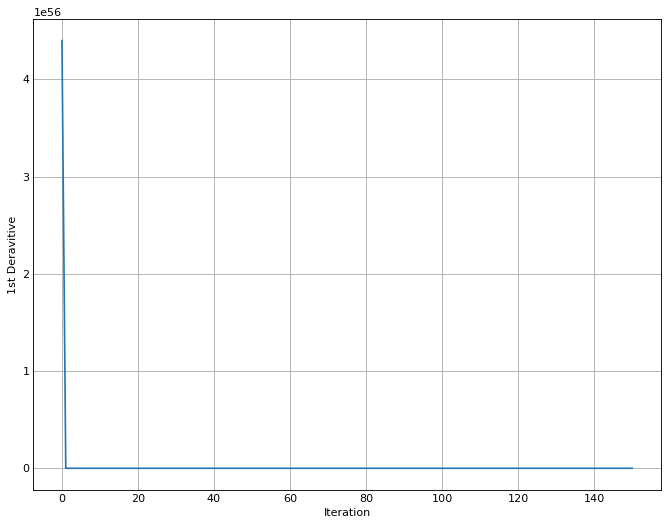

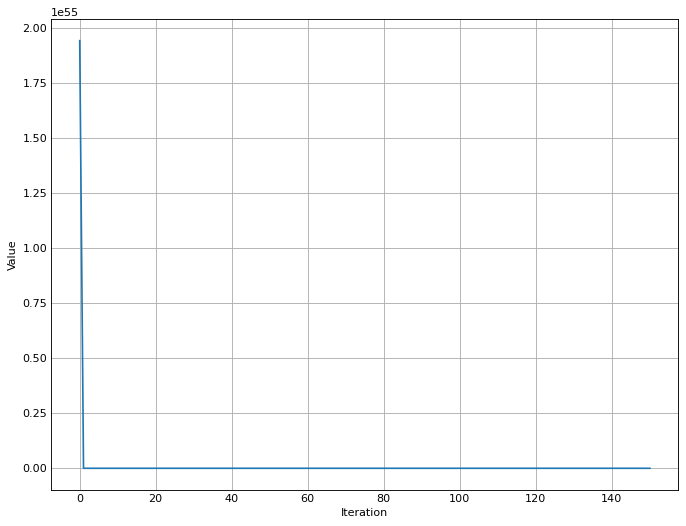

Soulution: 
[ 0.49805909 -0.19960061 -0.52882798]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


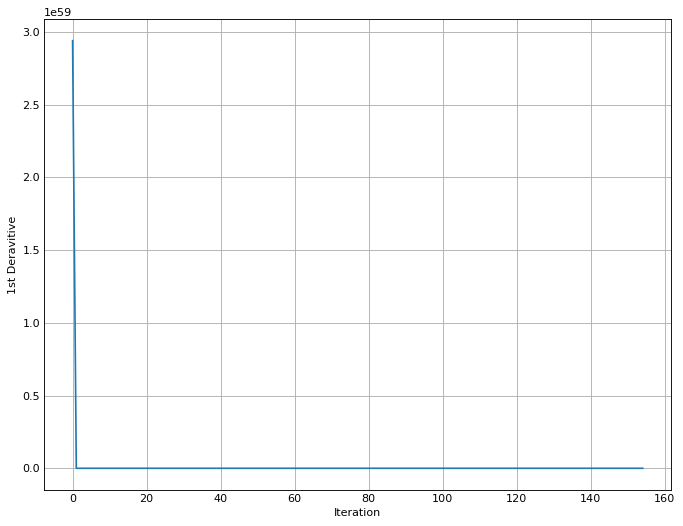

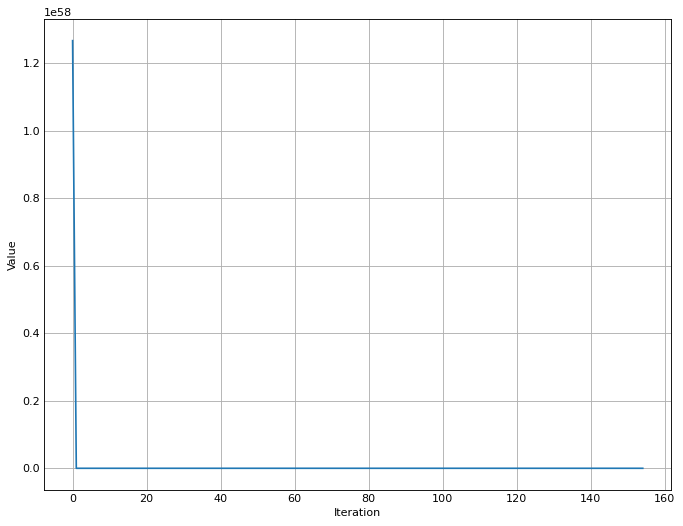

Soulution: 
[ 0.49806448 -0.19960094 -0.52882769]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


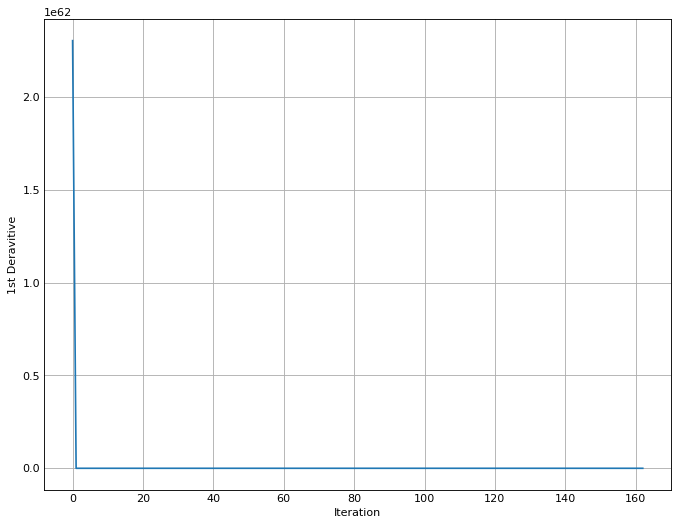

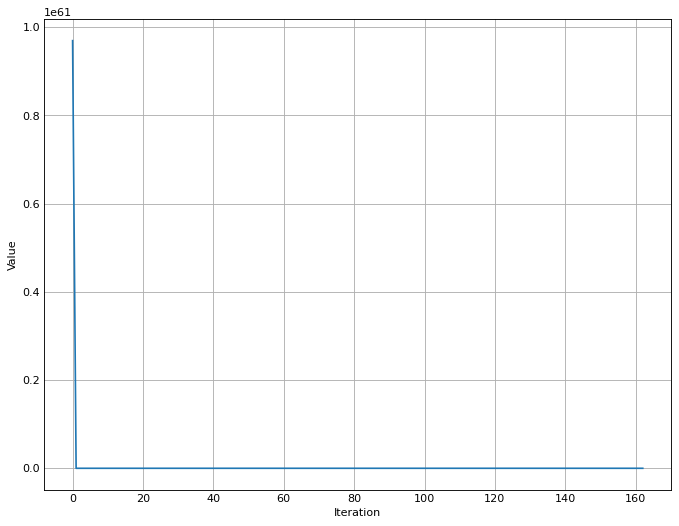

Soulution: 
[ 0.49806095 -0.19960072 -0.52882758]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


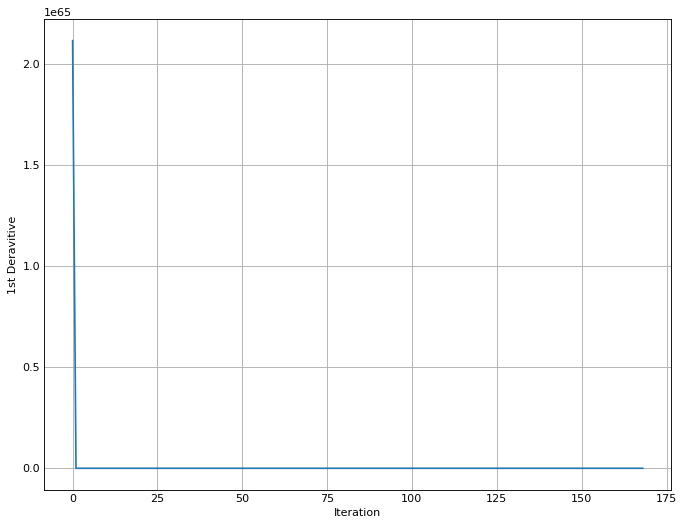

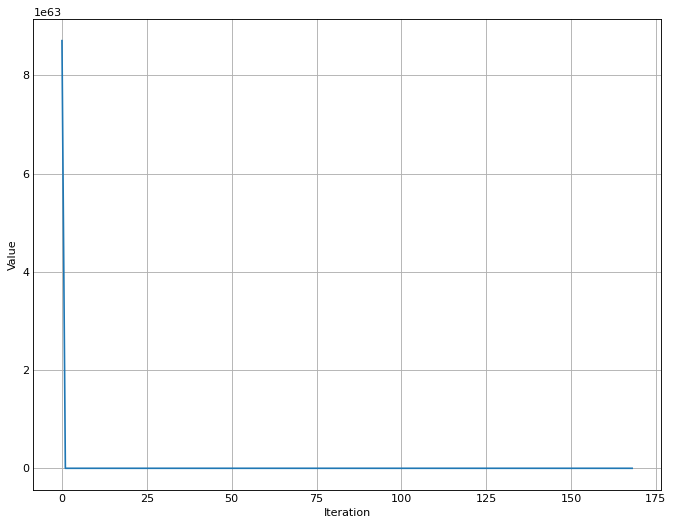

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


Soulution: 
[ 0.4980655  -0.199601   -0.52882746]


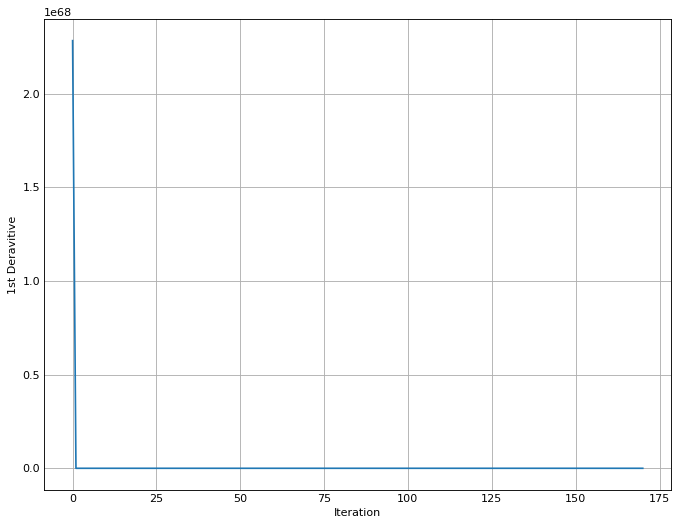

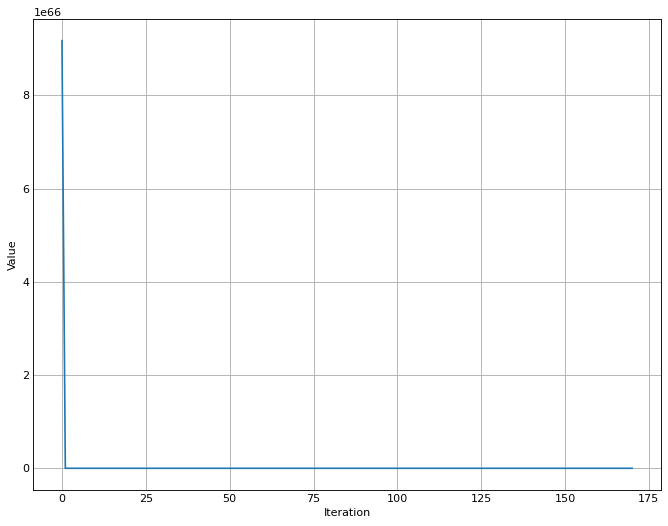

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


Soulution: 
[ 0.49806642 -0.19960106 -0.52882767]


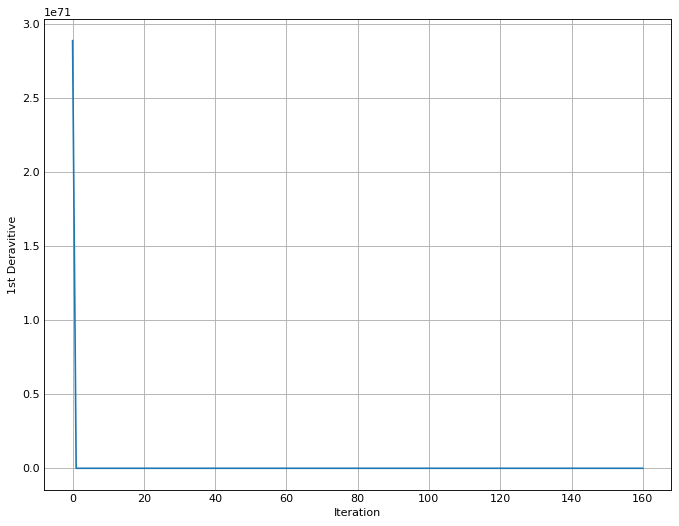

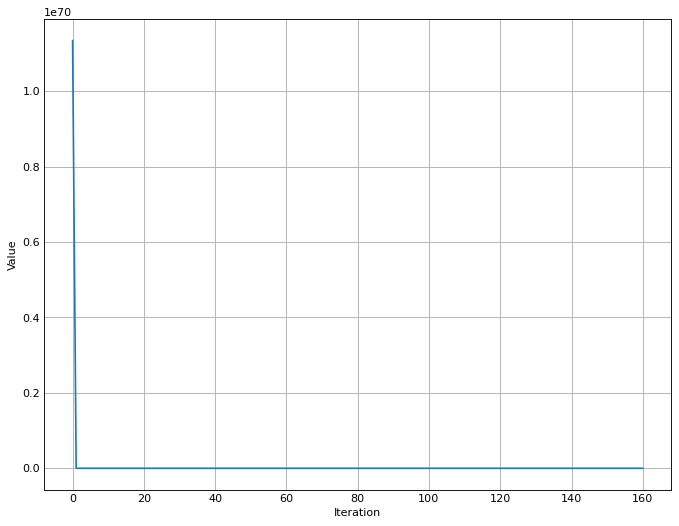

Soulution: 
[ 0.49805927 -0.19960062 -0.52882783]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)


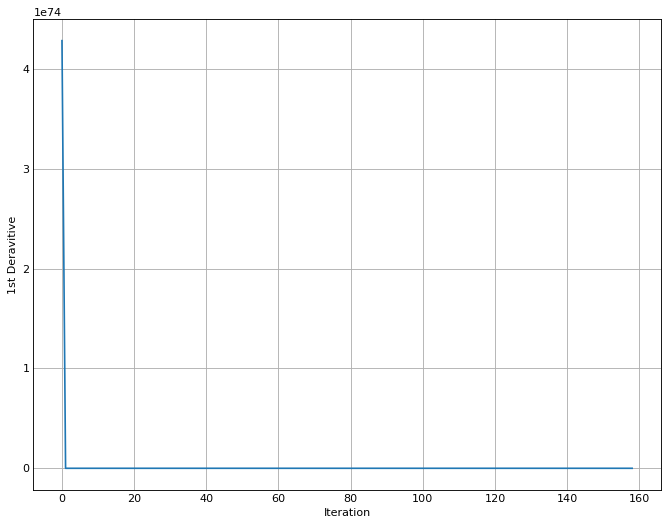

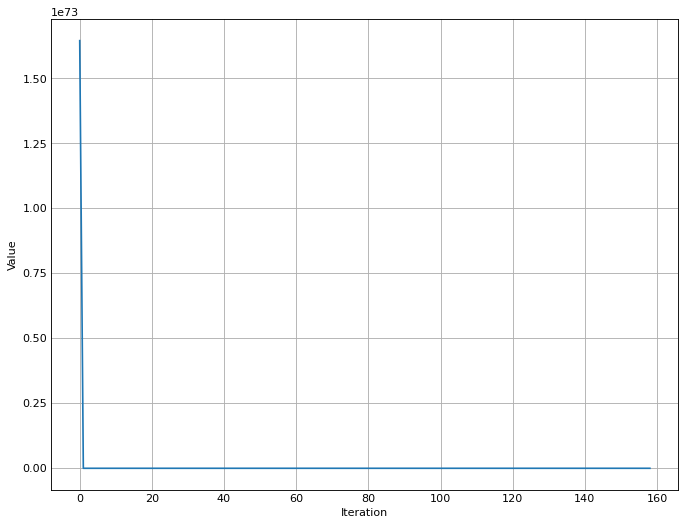

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


Soulution: 
[ 0.49807238 -0.19960141 -0.52882677]


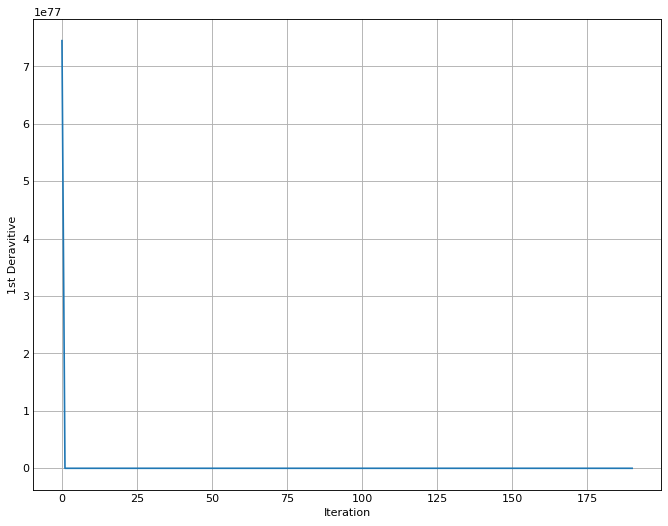

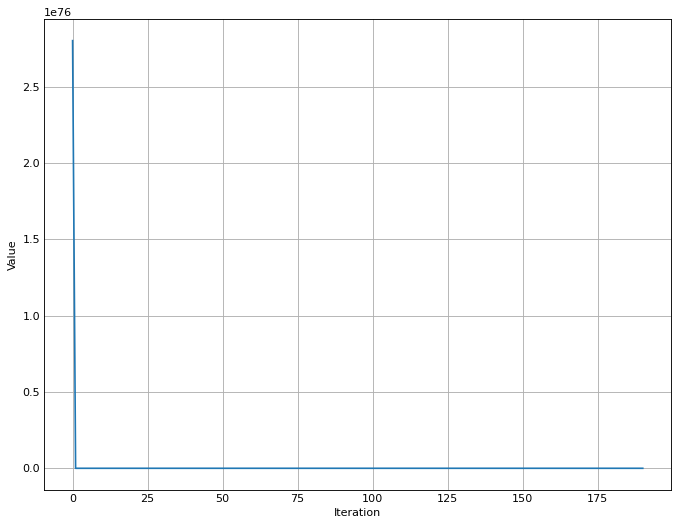

C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


Soulution: 
[ 0.4980682  -0.19960106 -0.52882284]


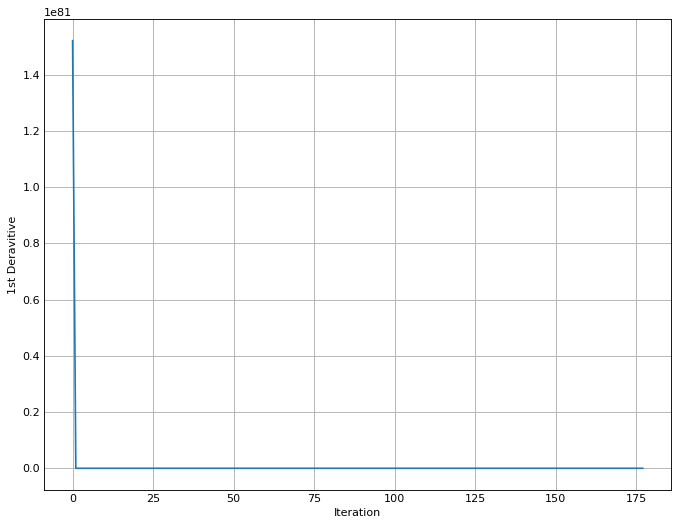

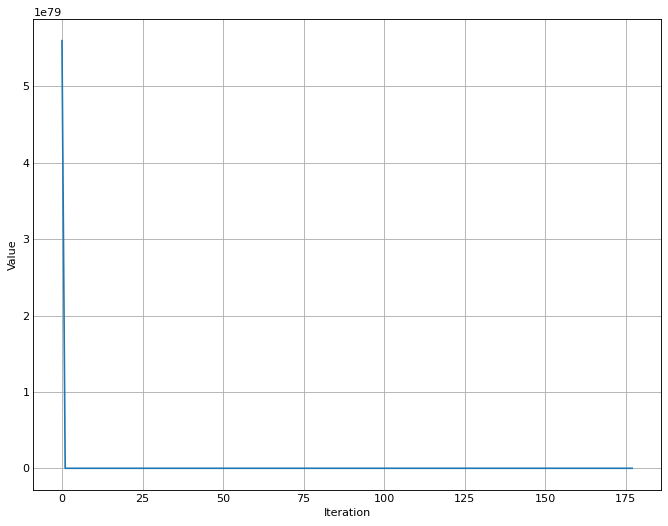

Soulution: 
[ 0.49807083 -0.19960123 -0.52882318]


C:\Users\abdob\AppData\Local\Temp\ipykernel_308\2984802340.py:8: RuntimeWarning: overflow encountered in double_scalars
  return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)
C:\Users\abdob\AppData\Local\Temp\ipykernel_308\3488160807.py:7: RuntimeWarning: overflow encountered in exp
  ans = np.exp(x)


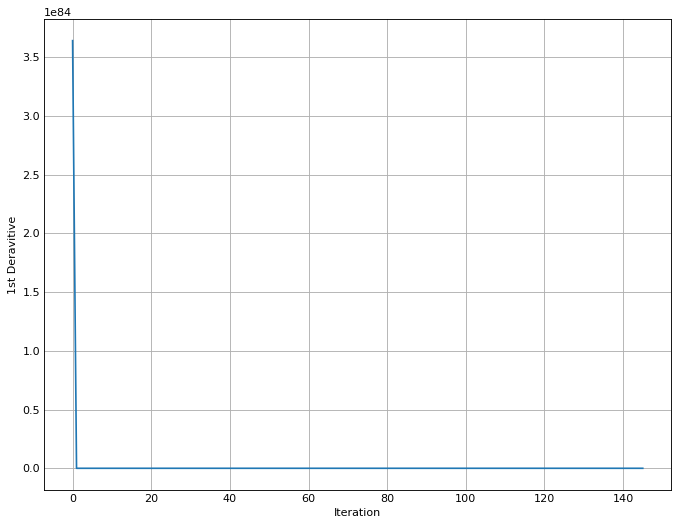

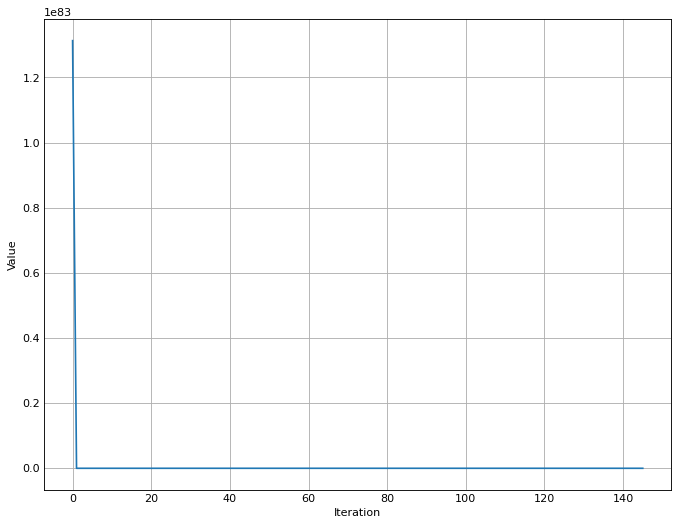

[[ 4.98227407e-01 -1.99610981e-01 -5.28823139e-01]
 [ 5.00081304e-01  5.70816903e-06 -5.23601585e-01]
 [ 5.00084864e-01  6.00407798e-06 -5.23601978e-01]
 [ 5.00081352e-01  5.81765274e-06 -5.23602208e-01]
 [ 5.00077167e-01  5.60610850e-06 -5.23602546e-01]
 [ 5.00080689e-01  5.86818771e-06 -5.23602766e-01]
 [ 5.00080993e-01  5.75854805e-06 -5.23601998e-01]
 [ 4.98227747e-01 -1.99611157e-01 -5.28829755e-01]
 [ 4.99917368e-01 -5.71773738e-06 -5.23596405e-01]
 [ 4.99924028e-01 -5.16006405e-06 -5.23597164e-01]
 [ 5.00087040e-01  4.99599398e-06 -5.23595253e-01]
 [ 4.99925873e-01 -5.04033702e-06 -5.23597170e-01]
 [ 4.98230261e-01 -1.99611170e-01 -5.28823600e-01]
 [ 5.00081682e-01  4.72284522e-06 -5.23595672e-01]
 [ 4.98219144e-01 -1.99610603e-01 -5.28828962e-01]
 [ 4.98220396e-01 -1.99610584e-01 -5.28824810e-01]
 [ 4.98215661e-01 -1.99610299e-01 -5.28825250e-01]
 [ 5.00081616e-01  4.77123622e-06 -5.23595980e-01]
 [ 5.00077446e-01  4.54050415e-06 -5.23596199e-01]
 [ 4.98225745e-01 -1.99611051e-

In [23]:
for i in np.arange(-10,10,0.2):
    sol=np.append(sol,[optimize((-1*i,i,i),0.001)], axis=0)
print(sol)